# NYC Yellow Taxi

## Paso 0: Problema de negocio

### Paso 0.1 Contexto



La Comisión de Taxis y Limusinas de la Ciudad de Nueva York (NYC Taxi & Limousine Commission, TLC) recopila y administra datos de todos sus vehículos de transporte público, los cuales están disponibles gratuitamente para descarga desde su sitio web oficial.

El TLC gestiona datos principalmente para cuatro tipos diferentes de vehículos:

- **Taxi amarillo (Yellow Taxi):**
  Son los famosos taxis amarillos de NYC que ofrecen servicio exclusivamente mediante paradas en la calle (street hails). El número de taxis amarillos está limitado por una cantidad finita de medallones otorgados por el TLC. Los pasajeros acceden a este servicio deteniendo el taxi en la calle; los viajes no son pre-arreglados.

- **Taxi verde (Green Taxi):**
  Vehículos con licencia para operar en zonas específicas (los boroughs) con marca verde. Estos taxis pueden aceptar viajes tanto pre-arreglados como paradas en la calle (street hails).

- **Vehículos de alquiler (For-Hire Vehicles, FHVs):**
  Estos vehículos deben ser solicitados con anticipación a través de un despachador o compañía de limusinas. No pueden recoger pasajeros mediante paradas en la calle, ya que sus viajes deben ser pre-arreglados.


## Puntos importantes sobre este dataset

- En este análisis se considera únicamente la información de los **taxis amarillos** para los meses de enero de 2015 y enero a marzo de 2016.
- En el sitio web del TLC encontrarás formatos de archivo CSV distintos, pues el TLC actualiza periódicamente los datos y agrega nueva información.
- Una de las modificaciones más importantes es que, en versiones recientes, en lugar de proporcionar las coordenadas exactas de recogida y entrega, los datos están organizados en regiones numeradas de la ciudad, lo que cambia la forma en que se interpretan las ubicaciones.
- Por esta razón, el dataset usado en este proyecto está basado en una versión anterior de los CSV, que permite trabajar con coordenadas geográficas exactas.
- Este dataset es útil para practicar técnicas de clustering y análisis de series temporales.
- Si prefieres trabajar solo con datos actualizados sin clustering, puedes descargar directamente los nuevos archivos CSV desde la página oficial del TLC.


### Paso 0.2: Problema

El objetivo de este proyecto es desarrollar un modelo predictivo que permita estimar el total_amount cobrado en cada viaje de taxi en la ciudad de Nueva York, utilizando variables disponibles como la distancia del viaje, duración, cantidad de pasajeros, tipo de pago, y otros cargos adicionales. Este modelo podrá ayudar a las compañías de transporte y plataformas de análisis a anticipar ingresos, detectar anomalías en las tarifas y optimizar la asignación de recursos. Además, al identificar los factores que más influyen en el costo total del viaje, se facilitarán estrategias para mejorar la experiencia del pasajero y la eficiencia operativa del servicio.

### Paso 0.3: Objetivos

#### Objetivo General
Desarrollar un modelo de machine learning que permita predecir con precisión el **total_amount** cobrado en viajes de taxi en la ciudad de Nueva York, utilizando variables relevantes del dataset histórico.

#### Objetivos Específicos
- Analizar y limpiar el conjunto de datos para asegurar la calidad y consistencia de la información.
- Explorar la relación entre el monto total del viaje y variables como la distancia, tiempo de viaje, cantidad de pasajeros y tipo de pago.
- Seleccionar y transformar las variables más relevantes para mejorar el desempeño del modelo predictivo.
- Entrenar y evaluar distintos algoritmos de machine learning (regresión lineal, árboles de decisión, Random Forest, etc.) para identificar el mejor modelo.
- Validar el modelo seleccionado mediante técnicas de validación cruzada y métricas de error (MAE, RMSE).
- Interpretar los resultados para entender los factores que más afectan el monto total cobrado en un viaje.


### Paso 0.4: Diccionario de datos

| Campo               | Descripción                                                                                                                      |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------|
| **VendorID**         | Código que indica el proveedor TPEP que proporcionó el registro. Ejemplos: Creative Mobile Technologies, VeriFone Inc.           |
| **tpep_pickup_datetime** | Fecha y hora en que se activó el taxímetro (inicio del viaje).                                                                 |
| **tpep_dropoff_datetime** | Fecha y hora en que se desactivó el taxímetro (fin del viaje).                                                                 |
| **Passenger_count**  | Número de pasajeros en el vehículo. Valor ingresado por el conductor.                                                            |
| **Trip_distance**    | Distancia recorrida durante el viaje en millas, reportada por el taxímetro.                                                      |
| **Pickup_longitude** | Longitud del lugar donde se activó el taxímetro.                                                                                  |
| **Pickup_latitude**  | Latitud del lugar donde se activó el taxímetro.                                                                                   |
| **RateCodeID**       | Código de tarifa final aplicado al final del viaje. Puede ser tarifa estándar, JFK, Newark, Nassau o Westchester, tarifa negociada o viaje en grupo. |
| **Store_and_fwd_flag** | Indicador que señala si el registro del viaje se almacenó en la memoria del vehículo antes de enviarlo al proveedor (almacenamiento y reenvío). Y = sí, N = no. |
| **Dropoff_longitude** | Longitud del lugar donde se desactivó el taxímetro.                                                                              |
| **Dropoff_latitude** | Latitud del lugar donde se desactivó el taxímetro.                                                                               |
| **Payment_type**     | Código numérico que indica cómo pagó el pasajero el viaje. Ejemplos: tarjeta de crédito, efectivo, sin cargo, disputa, desconocido, viaje anulado. |
| **Fare_amount**      | Tarifa calculada por tiempo y distancia según el taxímetro.                                                                      |
| **Extra**            | Cargos extras y recargos varios. Actualmente incluye cargos de $0.50 y $1 por horas pico y nocturnos.                            |
| **MTA_tax**          | Impuesto MTA de $0.50 aplicado automáticamente según la tarifa metered.                                                          |
| **Improvement_surcharge** | Recargo de $0.30 aplicado en el inicio del viaje desde 2015 para mejoras.                                                     |
| **Tip_amount**       | Monto de la propina. Automáticamente registrado para propinas con tarjeta de crédito. Propinas en efectivo no incluidas.          |
| **Tolls_amount**     | Monto total pagado en peajes durante el viaje.                                                                                   |
| **Total_amount**     | Monto total cobrado al pasajero. No incluye propinas en efectivo.                                                                |


## Paso 1: Importar librerías

In [2]:
!pip install mlxtend


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pyproj geopandas contextily


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import shutil
import os
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from utils.cleaning_data import remove_outliers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression, TweedieRegressor, GammaRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.preprocessing import StandardScaler, FunctionTransformer, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import TransformedTargetRegressor,ColumnTransformer
from sklearn.linear_model import LinearRegression, GammaRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from matplotlib.ticker import FuncFormatter
from scipy.stats import shapiro, kstest, norm
from scipy.stats import probplot

from sklearn.exceptions import ConvergenceWarning
import warnings




## Paso 2: Cargar los datos

In [5]:
# Define the target directory and the expected dataset files
target_dir = os.path.abspath(os.path.join(os.getcwd(), "../data"))
expected_files = ["yellow_tripdata_2015-01.csv", "yellow_tripdata_2016-01.csv", "yellow_tripdata_2016-02.csv", "yellow_tripdata_2016-03.csv"]  # Replace with actual dataset filenames

# Check if the files already exist in the target directory
if all(os.path.exists(os.path.join(target_dir, file)) for file in expected_files):
    print("Files already exist in the target directory. Skipping download.")
else:
    # Download the dataset
    path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")
    print("Path to dataset files:", path)

    # Create the 'data' folder if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Move all files from download path to target_dir, checking if the file already exists
    for file_name in os.listdir(path):
        src = os.path.join(path, file_name)
        dst = os.path.join(target_dir, file_name)

        # Check if the file already exists in the target directory
        if not os.path.exists(dst):
            shutil.move(src, dst)
            print(f"Moved: {file_name}")
        else:
            print(f"File already exists: {file_name}")

print("Files moved to:", target_dir)

Files already exist in the target directory. Skipping download.
Files moved to: C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\data


In [6]:
df = pd.read_csv(f"../data/yellow_tripdata_2016-03.csv")

In [7]:
df.shape

(12210952, 19)

In [8]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05          0.00   
1         11.0    0.5      0.5        3.05          0.00   
2         54.5    0.5      0.5        8.00          0.00   
3         31.5    0.0      0.5        3.78          5.54   
4         98.0    0.0      0.0        0.00         15.50   

   improvement_surcharge  total_amount  
0                    0.3         12.35  
1                    0.3         15.35  
2                    0.3         63.80  
3                    0.3         41.62  
4                    0.3        113.80

In [9]:
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
12210947         1  2016-03-31 16:34:36   2016-03-31 16:34:36   
12210948         1  2016-03-26 03:02:32   2016-06-14 18:47:55   
12210949         1  2016-03-20 08:43:59   2016-06-27 15:05:01   
12210950         1  2016-03-20 08:49:47   2016-06-28 19:11:27   
12210951         1  2016-03-20 08:50:24   2016-06-29 15:58:16   

          passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
12210947                1            0.0          0.000000         0.000000   
12210948                1            0.4        -73.977356        40.774471   
12210949                1           20.2          0.000000         0.000000   
12210950                1           15.4        -73.790077        40.647377   
12210951                1           17.5        -73.798485        40.645096   

          RatecodeID store_and_fwd_flag  dropoff_longitude  dropoff_latitude  \
12210947           1                  Y           0.000000          0.000000   
12210948           1                  N         -73.982536         40.772408   
12210949           2                  N         -74.008614         40.710987   
12210950           1                  N         -73.971756         40.578457   
12210951           2                  N         -73.993111         40.725880   

          payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
12210947             2         19.0    1.0      0.5         0.0          0.00   
12210948             1          4.0    1.0      0.5         1.7          0.00   
12210949             1         52.0    0.0      0.5         6.0          5.54   
12210950             1         42.5    1.0      0.5         5.0          0.00   
12210951             1         52.0    0.0      0.5        13.2          0.00   

          improvement_surcharge  total_amount  
12210947                    0.3         20.80  
12210948                    0.3          7.50  
12210949                    0.3         64.34  
12210950                    0.3         49.30  
12210951                    0.3         66.00

## Paso 3: Análisis de datos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [11]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [12]:
# Select specific numerical columns
selected_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'total_amount']
numerical_columns = [col for col in selected_columns if col in df.columns]

# Compute summary statistics
statistics = df[numerical_columns].agg(
    ['mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurt']
).T.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "std": "Standard Deviation",
    "var": "Variance",
    "min": "Minimum",
    "max": "Maximum",
    "skew": "Skewness",
    "kurt": "Kurtosis"
})

# Display results
print("\nMedidas de tendencia central y dispersión:\n")
statistics


Medidas de tendencia central y dispersión:



Mean  Median  Standard Deviation      Variance  Minimum  \
passenger_count   1.659580    1.00            1.312189  1.721841e+00      0.0   
trip_distance     6.131770    1.70         6156.482645  3.790228e+07      0.0   
fare_amount      12.795078    9.50          134.097923  1.798225e+04   -376.0   
extra             0.345560    0.00            0.456307  2.082160e-01    -58.5   
mta_tax           0.497636    0.50            0.048633  2.365187e-03     -1.0   
tip_amount        1.792582    1.35            2.549124  6.498034e+00    -20.0   
total_amount     16.045820   11.80          134.357773  1.805201e+04   -376.3   

                     Maximum     Skewness      Kurtosis  
passenger_count         9.00     2.139831  3.483240e+00  
trip_distance    19072628.80  2683.600876  7.853886e+06  
fare_amount        429496.72  2838.928250  8.760766e+06  
extra                  80.00     4.084671  2.164568e+02  
mta_tax                79.30   545.525201  7.878662e+05  
tip_amount            850.00    14.834049  2.164655e+03  
total_amount       429562.25  2823.790195  8.698327e+06

**Passenger_count***

La variable 'passenger_count' presenta un sesgo positivo (hacia la derecha) de 2.139831. Esto indica que la mayoría de los viajes se realizan con un número menor de pasajeros, y existen algunos viajes con un número significativamente mayor de pasajeros que "jalan" la media hacia la derecha.

La mediana es de 1.00, lo que significa que la mitad de los viajes tuvieron 1 pasajero o menos. La media, sin embargo, es de 1.659580, que es mayor que la mediana, confirmando el sesgo a la derecha.

La desviación estándar es de 1.312189, que es relativamente pequeña en comparación con la media. Esto sugiere que la mayoría de los valores de 'passenger_count' están relativamente cerca de la media.

El valor de curtosis es de 3.483240. Dado que la curtosis de una distribución normal es 3 (o 0 si se usa la curtosis de exceso), un valor de 3.483240 indica una distribución ligeramente leptocúrtica. Esto significa que la distribución tiene un pico un poco más pronunciado y colas un poco más pesadas que una distribución normal. En otras palabras, hay una concentración un poco mayor de datos alrededor de la media y una probabilidad ligeramente mayor de observar valores extremos en comparación con una distribución normal. No es una leptocurtosis tan extrema como se había interpretado inicialmente.

En resumen, para 'passenger_count' con la curtosis corregida:

- La mayoría de los viajes son realizados por uno o pocos pasajeros, con algunos viajes con un número mayor de pasajeros que influyen en la media.
- La variabilidad en el número de pasajeros por viaje no es alta para la mayoría de los viajes.
- La distribución es ligeramente más picuda y tiene colas un poco más pesadas que una distribución normal, sugiriendo una concentración moderada de datos en el centro y una probabilidad levemente mayor de valores atípicos.

**Trip_distance**

La variable 'Trip_distance' (distancia del viaje) presenta una **asimetría extremadamente alta hacia la derecha (2683.68)**. Esto indica que la mayoría de los viajes son de distancias cortas o moderadas, pero existen unos pocos viajes con distancias extremadamente largas que "jalan" la media drásticamente hacia arriba. La **mediana de 1.70** millas (o unidad de distancia) confirma que el 50% de los viajes son de 1.70 unidades o menos, mientras que la **media de 6.13** es mucho mayor, lo que refuerza la presencia de estas distancias largas atípicas.

La **desviación estándar es extremadamente alta (6156.48)**, y la **varianza (3.79e+07)** es aún mayor. Esto indica una dispersión masiva de los datos, lo cual es coherente con la presencia de valores mínimos de 0.0 y un **valor máximo extraordinariamente alto de 190726.88**. Una desviación estándar tan grande, casi mil veces mayor que la media, sugiere que la media no es una medida representativa de la distancia típica de un viaje. La mayoría de los viajes están muy lejos de la media debido a la influencia de esos valores extremos.

La **curtosis es también extremadamente alta (7.85e+06)**, lo que indica una distribución **sumamente leptocúrtica**. Esto significa que los datos están masivamente concentrados alrededor de la mediana (valores bajos de distancia), formando un pico muy agudo, y que existen **colas extremadamente pesadas** debido a la presencia de valores atípicos (esos viajes de distancias extremadamente largas). En otras palabras, la inmensa mayoría de los viajes son de distancias cortas, y los viajes de larga distancia, aunque pocos, son tan excepcionalmente largos que dominan las estadísticas de dispersión y la forma de la distribución.

**Es crucial señalar que las distancias máximas observadas (hasta 190726.88) son tan extraordinariamente elevadas que podrían deberse a errores en la entrada de datos, fallos en la medición del GPS, o la inclusión de viajes que no corresponden al contexto esperado (por ejemplo, viajes interurbanos o internacionales atípicos si el contexto es urbano local).**

**En resumen, para 'Trip_distance':**

* La inmensa mayoría de los viajes son de **distancia muy corta**.
* Existen **unos pocos viajes con distancias extremadamente largas**, que son atípicos y distorsionan significativamente las medidas de tendencia central y dispersión. **Estos valores extremos son sospechosos y podrían indicar errores en los datos.**
* La distribución está **muy sesgada a la derecha** y es **altamente leptocúrtica**, con un pico agudo en distancias cortas y colas extremadamente pesadas por los valores máximos.
* **Es indispensable investigar y validar los valores extremos de 'Trip_distance' para determinar si son legítimos o si requieren limpieza de datos.**

**Fare_amount**

La variable 'Fare_amount' (cantidad de la tarifa) presenta una **asimetría extremadamente alta hacia la derecha (2838.93)**. Esto indica que la gran mayoría de las tarifas son de montos bajos a moderados, pero existen algunas tarifas excepcionalmente altas que "jalan" la media hacia arriba de manera significativa. La **mediana de 9.50** (unidades monetarias) confirma que el 50% de los viajes tienen una tarifa de 9.50 o menos. En contraste, la **media de 12.795** es notablemente más alta que la mediana, lo que subraya el impacto de esas tarifas elevadas.

La **desviación estándar es muy alta (134.09)** y la **varianza (1.798e+04)** es también muy elevada. Esto revela una enorme dispersión en los valores de las tarifas. La presencia de un **valor mínimo de -376.0** es un punto crítico, ya que **tarifas negativas probablemente no son valores reales y sugieren fuertemente errores en los datos o registros anómalos** (como reembolsos o ajustes). Por otro lado, el **valor máximo de 429496.72** es extraordinariamente alto, lo que también es **muy sospechoso** y podría corresponder a errores de registro o datos atípicos extremos (outliers) que requieren una revisión.

La **curtosis es también extremadamente alta (8.76e+06)**, lo que clasifica la distribución como **sumamente leptocúrtica**. Esto significa que la mayoría de las tarifas se concentran fuertemente alrededor de los valores más bajos (formando un pico muy agudo), mientras que las "colas" de la distribución son extremadamente pesadas debido a la presencia de esas tarifas excepcionalmente altas y, posiblemente, los valores negativos. En otras palabras, la inmensa mayoría de los viajes tienen tarifas típicas y bajas, pero hay un pequeño número de registros con tarifas muy inusuales que afectan drásticamente las estadísticas.

**En resumen, para 'Fare_amount':**

* La mayoría de los viajes tienen **tarifas bajas a moderadas**.
* Existen **valores extremadamente atípicos**, incluyendo **tarifas negativas (que probablemente no son valores reales)** y **tarifas extraordinariamente altas (también muy sospechosas)**, que distorsionan gravemente la media y la dispersión.
* La distribución es **extremadamente asimétrica a la derecha** y **altamente leptocúrtica**, con un pico agudo en tarifas bajas y colas muy pesadas debido a estos valores anómalos.
* **Es indispensable realizar una limpieza y validación de datos para 'Fare_amount'**, prestando especial atención a los valores negativos y a las tarifas extremadamente altas, ya que son inconsistentes con el comportamiento esperado y son muy probablemente errores de registro.

**Extra**
La variable `Extra` representa un monto adicional en la tarifa. Según la definición, **este campo debería incluir únicamente cargos adicionales como los de $0.50, $1 y $1.50 por hora pico y/o nocturna.**

La distribución de `Extra` presenta una **asimetría muy alta hacia la derecha (`4.085`)**. Esto sugiere que la mayoría de los viajes no tienen un cargo extra o tienen un cargo muy pequeño, lo cual es coherente con los valores esperados de $0, $0.50, $1 o $1.50.

- La **mediana es `0.00`**, lo que indica que al menos la mitad de los viajes no tuvo ningún cargo adicional.
- La **media (`0.346`)** es mayor que la mediana, lo cual es consistente con el sesgo positivo.

La **desviación estándar (`0.456`)** y la **varianza (`0.208`)** indican una dispersión considerable, especialmente al compararlos con los valores esperados de esta variable, lo que sugiere la presencia de valores atípicos.

El **valor mínimo (`-58.5`)** es **altamente anómalo**. Un valor negativo en `Extra` contradice por completo la naturaleza de la variable y probablemente se debe a un **error de registro**.
De forma similar, el **valor máximo (`80.00`)** es **extremadamente inconsistente** con los cargos esperados. Ambos casos sugieren la existencia de **errores graves o valores atípicos extremos**.

La **curtosis (`216.46`)** indica que la distribución es **extremadamente leptocúrtica**, es decir, con un pico muy agudo en torno al valor `0.00` y colas muy pesadas, causadas por estos valores atípicos.

En resumen:

- La mayoría de los viajes **no incluyen un cargo extra** o este es **mínimo** (entre 0 dolares y 1.50).
- Existen **valores extremadamente anómalos** (`-58.5` y `80.00`) que contradicen el uso esperado de esta variable.
- La distribución es **muy asimétrica a la derecha** y **altamente leptocúrtica**, con muchos ceros y unos pocos valores extremos.
- Se recomienda **realizar una limpieza y validación exhaustiva de los datos**, especialmente eliminando o corrigiendo los valores que estén fuera del rango esperado ($0.50, $1, $1.50).


**mta_tax**

La variable `mta_tax` se refiere a un impuesto o cargo de la Autoridad Metropolitana de Transporte (MTA). Según la información proporcionada, **el valor de `mta_tax` solo debería ser `0.50`**.

La distribución de `mta_tax` presenta una **asimetría extremadamente alta hacia la derecha (`545.53`)**. Esto es un indicio muy fuerte de que la inmensa mayoría de los valores se concentran en `0.50`, mientras que hay una "cola" de valores muy altos que tiran la media drásticamente hacia la derecha. La **mediana es `0.50`**, lo que confirma que al menos la mitad de los registros tienen un impuesto MTA de 0.50 o menos (dada la naturaleza del dato, esto significa que la gran mayoría es 0.50). La **media de `0.4976`** es extremadamente cercana a la mediana y al valor esperado de `0.50`, lo que refuerza la idea de que `0.50` es el valor predominante.

La **desviación estándar es de `0.0486`** y la **varianza de `0.00237`**. Estos valores son extremadamente pequeños, lo que indica una concentración casi perfecta de los datos alrededor del `0.50`. Esto es consistente con la naturaleza de un impuesto fijo.

El **valor mínimo es `-1.0`**. Este valor es **completamente anómalo y, dado que el impuesto debería ser `0.50`, indica un error de datos irrefutable** (como un registro incorrecto o un valor nulo transformado). Un impuesto negativo carece de sentido en este contexto. Por otro lado, el **valor máximo de `79.30`** es extraordinariamente alto. Considerando que el único valor esperado para el impuesto MTA es `0.50`, un impuesto de `79.30` es **extremadamente inconsistente con la definición del campo y, casi con certeza, representa un error grave en los datos**.

La **curtosis es también extremadamente alta (`787,866.2`)**, lo que clasifica la distribución como **hiper-leptocúrtica o extremadamente leptocúrtica**. Esto significa que una inmensa mayoría de los valores de `mta_tax` se agrupan de manera casi perfecta en `0.50` (formando un pico increíblemente agudo), mientras que las "colas" de la distribución son extremadamente pesadas y largas debido a la presencia de esos valores atípicos (tanto el negativo como el valor máximo extremadamente alto). Esto es una clara indicación de que el impuesto MTA es un cargo estándar de `0.50` para casi todos los viajes, pero hay un número muy pequeño de excepciones que son anómalas y distorsionan fuertemente las estadísticas.

**En resumen, para 'mta_tax':**

* La **inmensa mayoría de los viajes tienen el impuesto MTA correcto de `0.50`**.
* Sin embargo, la presencia de **valores anómalos (mínimo `-1.0` y máximo `79.30`) es altamente problemática, ya que `mta_tax` solo debería ser `0.50`**.
* Estos valores extremos son **claros indicadores de errores de datos o inconsistencias graves** que están distorsionando las estadísticas de la variable.
* La distribución es **extremadamente asimétrica a la derecha** y **altamente leptocúrtica**, con una concentración masiva de datos en `0.50` y colas extremadamente pesadas generadas por estos valores incorrectos.
* **Es CRÍTICO realizar una limpieza y validación exhaustiva de los datos en la variable 'mta_tax'**, eliminando o corrigiendo cualquier valor que no sea `0.50`, ya que estos datos son fundamentalmente inconsistentes con la regla de negocio del impuesto.

**Tip_amount**

La variable 'Tip_amount' representa la cantidad de propina dejada por el pasajero.

La distribución de 'Tip_amount' presenta una **asimetría extremadamente alta hacia la derecha (`14.83`)**. Esto es muy común en datos de propinas y sugiere que, aunque hay un rango de propinas más bajas, un pequeño número de viajes tienen propinas significativamente más altas que "jalan" la media hacia la derecha. La **mediana es `1.35`**, lo que indica que al menos la mitad de los viajes tuvieron una propina de $1.35 o menos. La **media de `1.793`** es superior a la mediana, lo cual es una clara señal del impacto de esas propinas más grandes.

La **desviación estándar es de `2.549`** y la **varianza de `6.498`**. Estos valores son altos en relación con la media, lo que indica una dispersión considerable en las cantidades de propina. Esto es esperado en un conjunto de datos donde la mayoría de los valores son relativamente bajos pero existen algunos valores muy altos.

El **valor mínimo es `-20.0`**. Una propina negativa es **altamente anómala y no es un valor real para una propina**. Esto **sugiere fuertemente errores en los datos, reversiones de cargos o algún tipo de ajuste incorrecto registrado en el campo de propina**. Por otro lado, el **valor máximo de `850.00`** es extraordinariamente alto. Si bien una propina muy generosa es posible, una de $850.00 es **extremadamente inusual y altamente sospechosa de ser un error de registro o un valor atípico extremo que merece una investigación profunda**, ya que excede con creces cualquier porcentaje razonable de una tarifa típica.

La **curtosis es extremadamente alta (`2164.655`)**, lo que clasifica la distribución como **sumamente leptocúrtica**. Esto significa que una inmensa mayoría de los valores de 'Tip_amount' se agrupan en o alrededor de la mediana/media (formando un pico extremadamente agudo), mientras que las "colas" de la distribución son extremadamente pesadas y largas debido a la presencia de esos valores atípicos (tanto el negativo como los positivos extremadamente altos). En otras palabras, la mayoría de los viajes tienen propinas bajas a moderadas, pero hay un número muy pequeño de registros con propinas inusualmente altas o, en el caso del mínimo, un valor anómalo.

**En resumen, para 'Tip_amount':**

* Aunque la mayoría de los viajes tienen propinas bajas a moderadas, la distribución está **extremadamente sesgada a la derecha** debido a la presencia de valores muy altos.
* Existen **valores extremadamente anómalos (mínimo `-20.0` y máximo `850.00`)** que **son altamente problemáticos**. Una propina negativa no tiene sentido, y una de $850.00 es extremadamente inusual.
* Estos valores extremos son **claros indicadores de errores de datos, ajustes incorrectos o inconsistencias graves** que están distorsionando las estadísticas de la variable.
* La **curtosis extraordinariamente alta** subraya la concentración masiva de datos y la existencia de colas extremadamente pesadas generadas por estos valores atípicos.
* **Es CRÍTICO realizar una limpieza y validación exhaustiva de los datos en la variable 'Tip_amount'**, eliminando o corrigiendo los valores negativos y los valores atípicamente altos, ya que estos datos son inconsistentes con el comportamiento esperado de las propinas.

**Total_amount**

La variable 'Total_amount' representa el monto total pagado por el viaje, incluyendo la tarifa, extras, impuestos y propinas.

La distribución de 'Total_amount' presenta una **asimetría extremadamente alta hacia la derecha (`2823.79`)**. Esto indica que la gran mayoría de los viajes tienen un monto total bajo a moderado, pero existe un pequeño número de viajes con montos totales extremadamente altos que "jalan" la media drásticamente hacia la derecha. La **mediana es `11.80`**, lo que significa que la mitad de los viajes tuvieron un monto total de 11.80 o menos. La **media de `16.046`** es considerablemente más alta que la mediana, lo cual es una clara señal del impacto de esos montos totales excepcionalmente altos.

La **desviación estándar es de `134.358`** y la **varianza de `18052.01`**. Estos valores son extraordinariamente altos en relación con la media, lo que indica una dispersión masiva de los datos. Esta gran variabilidad se explica por la enorme diferencia entre el valor mínimo y el máximo.

El **valor mínimo es `-376.3`**. Un monto total negativo es **completamente anómalo e inviable para un viaje de transporte**. Esto **sugiere fuertemente errores en la entrada de datos, registros de transacciones canceladas o revertidas, o algún tipo de ajuste incorrecto** que se haya reflejado en este campo. Por otro lado, el **valor máximo de `429562.25`** es un monto total extraordinariamente alto. Considerando los valores típicos de las tarifas de transporte, un monto de esta magnitud es **altamente sospechoso y casi con certeza representa un error grave en los datos, una entrada errónea o un valor atípico extremo que no se ajusta a la realidad de los viajes.**

La **curtosis es también extremadamente alta (`8698327.0`)**, lo que clasifica la distribución como **hiper-leptocúrtica o extremadamente leptocúrtica**. Esto significa que una inmensa mayoría de los valores de 'Total_amount' se agrupan en o alrededor de la mediana/media (formando un pico increíblemente agudo), mientras que las "colas" de la distribución son extremadamente pesadas y largas debido a la presencia de esos valores atípicos (tanto el negativo como el valor máximo extremadamente alto). En otras palabras, la mayoría de los viajes tienen montos totales esperados, pero hay un número muy pequeño de registros con montos que son fundamentalmente incorrectos o inusualmente altos, y que distorsionan masivamente las estadísticas.

**En resumen, para 'Total_amount':**

* La **mayoría de los viajes tienen un monto total bajo a moderado**, pero la distribución está **extremadamente sesgada a la derecha**.
* Existen **valores extremadamente anómalos (mínimo `-376.3` y máximo `429562.25`)** que son **altamente problemáticos y no representan montos de viaje reales**.
* Estos valores extremos son **claros indicadores de errores de datos o inconsistencias graves** que están distorsionando severamente todas las medidas estadísticas (media, desviación estándar, varianza, sesgo y curtosis).
* La **curtosis extraordinariamente alta** subraya la concentración masiva de datos y la existencia de colas extremadamente pesadas generadas por estos valores anómalos.
* **Es CRÍTICO realizar una limpieza y validación exhaustiva de los datos en la variable 'Total_amount'**, eliminando o corrigiendo cualquier valor que no sea coherente con un monto total de viaje válido, especialmente los negativos y los extremadamente altos.

## Paso 4: Gestión de duplicaciones y valores faltantes

### 4.1 Manejo de duplicaciones

In [13]:
duplicates = df.duplicated().sum()

In [14]:
print(f"Número de registros duplicados: {duplicates}")

Número de registros duplicados: 1


In [15]:
df = df.drop_duplicates()

### 4.2 Manejo de valores faltantes

In [16]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0]

In [17]:
missing_data

Series([], dtype: int64)

## Paso 5:  Reducción de Datos

In [18]:
data = df.drop(columns=["VendorID", "store_and_fwd_flag", "mta_tax", "dropoff_longitude", "dropoff_latitude", "pickup_longitude", "pickup_latitude"])

## Paso 6: Ingeniería de Características (Feature Engineering)

### Paso 6.1: Crear Caracteristicas

In [19]:
data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2016-03-01 00:00:00   2016-03-01 00:07:55                1           2.50   
1  2016-03-01 00:00:00   2016-03-01 00:11:06                1           2.90   
2  2016-03-01 00:00:00   2016-03-01 00:31:06                2          19.98   
3  2016-03-01 00:00:00   2016-03-01 00:00:00                3          10.78   
4  2016-03-01 00:00:00   2016-03-01 00:00:00                5          30.43   

   RatecodeID  payment_type  fare_amount  extra  tip_amount  tolls_amount  \
0           1             1          9.0    0.5        2.05          0.00   
1           1             1         11.0    0.5        3.05          0.00   
2           1             1         54.5    0.5        8.00          0.00   
3           1             1         31.5    0.0        3.78          5.54   
4           3             1         98.0    0.0        0.00         15.50   

   improvement_surcharge  total_amount  
0                    0.3         12.35  
1                    0.3         15.35  
2                    0.3         63.80  
3                    0.3         41.62  
4                    0.3        113.80

In [20]:
# Ensure the columns are in datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Calculate trip duration
data['trip_duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

# Optional: Get duration in minutes (or seconds, etc.)
data['trip_duration_minutes'] = data['trip_duration'].dt.total_seconds() / 60

In [21]:
data.loc[data['trip_duration_minutes'] <= 0, 'trip_duration_minutes'] = 0

In [22]:
len(data[0 >= data['trip_duration_minutes']]) / len(data)

0.001027684084556559

In [23]:
# Create 5 quantile-based bins with clear labels
labels = ['very short', 'short', 'medium', 'long', 'very long']
data['trip_distance_quantile'] = pd.qcut(data['trip_distance'], q=5, labels=labels)

# Check how trips are distributed across bins
print(data['trip_distance_quantile'].value_counts().sort_index())

trip_distance_quantile
very short    2628804
short         2413478
medium        2319142
long          2427648
very long     2421879
Name: count, dtype: int64


In [24]:
data['trip_distance_quantile'] = data['trip_distance_quantile'].astype(object)

In [25]:
# Define the bin edges
bins = [0, 5, 10, 15, 20, 25, np.inf]
labels = ['less than 5 min', '5-10 min', '10-15 min', '15-20 min', '20-25 min', 'more than 25 min']

# Apply the binning
data['trip_duration_minutes_interval'] = pd.cut(data['trip_duration_minutes'], bins=bins, labels=labels, right=False)

# Optional: check distribution
print(data['trip_duration_minutes'].value_counts().sort_index())

trip_duration_minutes
0.000000         12549
0.016667           697
0.033333          3545
0.050000          5544
0.066667          4535
                 ...  
50680.916667         1
116145.383333        1
142941.033333        1
144621.666667        1
145867.866667        1
Name: count, Length: 13012, dtype: int64


In [26]:
data['trip_duration_minutes_interval'] = data['trip_duration_minutes_interval'].astype(object)

In [27]:
data["speed"] = data["trip_distance"] / data["trip_duration_minutes"]

In [28]:
data["fare_per_minute"] = data["total_amount"] / data["trip_duration_minutes"]

In [29]:
data["dollar_per_distance"] =  data["total_amount"] / data["trip_distance"]

In [30]:
data = data[data["improvement_surcharge"].isin([0, 0.3])]

In [31]:
# Map values to strings and convert to categorical
data['improvement_surcharge_cat'] = data['improvement_surcharge'].apply(lambda x: '0.3' if x == 0.3 else '0')
data['improvement_surcharge_cat'] = data['improvement_surcharge_cat'].astype(object)

In [32]:
bins = [0, 5, 10, 15, 20, 25, 30, np.inf]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

data['amount_range'] = pd.cut(data['total_amount'], bins=bins, labels=labels, include_lowest=True)

In [33]:
bins = [0, 1, 2, 3, 4, 5, np.inf]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']

# Crear columna con intervalos
data['tip_amount_categories'] = pd.cut(data['tip_amount'], bins=bins, labels=labels, right=False)
data['tip_amount_categories'] = data['tip_amount_categories'].astype(object)

In [34]:
# Mapping of RateCodeID to descriptive labels
rate_code_labels = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare',
    6: 'Group ride'
}

# Create a new column with the labels
data['RatecodeID'] = data['RatecodeID'].map(rate_code_labels)
data['RatecodeID'] = data['RatecodeID'].astype(object)

## Paso 7: Limpieza y Manipulación de Datos

In [35]:
data = data.drop("tpep_pickup_datetime", axis=1)

In [36]:
data = data.drop("tpep_dropoff_datetime", axis=1)

In [37]:
data = data.drop("trip_duration", axis=1)

In [38]:
data = data.drop("improvement_surcharge", axis=1)

In [39]:
data = data[data['total_amount'] > 0]

In [40]:
valid_extras = [0.0, 0.5, 1.0]
data = data[data['extra'].isin(valid_extras)]

In [41]:
extra_labels = {
    0.0: 'No Extra',
    0.5: 'Rush Hour',
    1.0: 'Overnight',
    1.5: 'Rush + Overnight'
}

data['extra_categories'] = data['extra'].map(extra_labels)
data['extra_categories'] = data['extra'].astype(object)

In [42]:
data_cleaned = data.copy()

In [43]:
data_cleaned = data_cleaned[data_cleaned["total_amount"] >= 0.5]

In [44]:
data_cleaned = data_cleaned[data_cleaned["trip_distance"] > 0]

In [45]:
data_cleaned = data_cleaned[data_cleaned["trip_duration_minutes"] > 0]

In [46]:
data_cleaned = data_cleaned[(data_cleaned["passenger_count"] > 0) & (data_cleaned["passenger_count"] < 7)]

In [47]:
data_cleaned = remove_outliers(data_cleaned, ["total_amount", "trip_distance", "tip_amount", "trip_duration_minutes"])

In [48]:
data_cleaned = data_cleaned[data_cleaned["total_amount"] >= (0.5 + data_cleaned["extra"] + data_cleaned["tolls_amount"] + data_cleaned["tip_amount"])]

## Paso 8: Agrupar las variables según el tipo

### Paso 8.1: Guardar la variable objetivo

In [49]:
target_var_num = "total_amount"

In [50]:
# target_var_num_log = "total_amount_log"

In [51]:
target_var_cat = "amount_range"

### Paso 8.2: Guardar las variables categorias

In [52]:
vars_cat = [var for var in data.columns if (data[var].dtype == "O"
            or var == "payment_type")
            and var != target_var_cat]

In [53]:
vars_cat

['RatecodeID',
 'payment_type',
 'trip_distance_quantile',
 'trip_duration_minutes_interval',
 'improvement_surcharge_cat',
 'tip_amount_categories',
 'extra_categories']

### Paso 8.3 Guardar las variables númericas

In [54]:
vars_nums = [var for var in data.columns if data[var].dtype != "O"
            and var != target_var_num
            and var != target_var_cat
            and  var  != 'pickup_longitude'
            and var != 'pickup_latitude'
            and var != 'dropoff_longitude'
            and var != 'dropoff_latitude'
            and var not in vars_cat]

In [55]:
vars_nums

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'trip_duration_minutes',
 'speed',
 'fare_per_minute',
 'dollar_per_distance']

### Paso 8.4 Variables discretas

In [56]:
# Initialize lists
vars_disc = []
vars_con = []

# Loop through each numeric variable
for col in vars_nums:
    if pd.api.types.is_integer_dtype(data[col]):
        vars_disc.append(col)
    else:
        vars_con.append(col)

In [57]:
vars_disc

['passenger_count']

In [58]:
vars_con

['trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'trip_duration_minutes',
 'speed',
 'fare_per_minute',
 'dollar_per_distance']

## Paso 9: Análisis Univariado

In [59]:
def human_format(x, pos):
    if x >= 1e9:
        return f'{x * 1e-9:.1f}B'
    elif x >= 1e6:
        return f'{x * 1e-6:.1f}M'
    elif x >= 1e3:
        return f'{x * 1e-3:.1f}K'
    else:
        return f'{int(x)}'

formatter = FuncFormatter(human_format)

In [60]:
def annotate_bars(ax):
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(human_format(height, None),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

### Paso 9.1: Análisis Univeriado de Variables Categorías

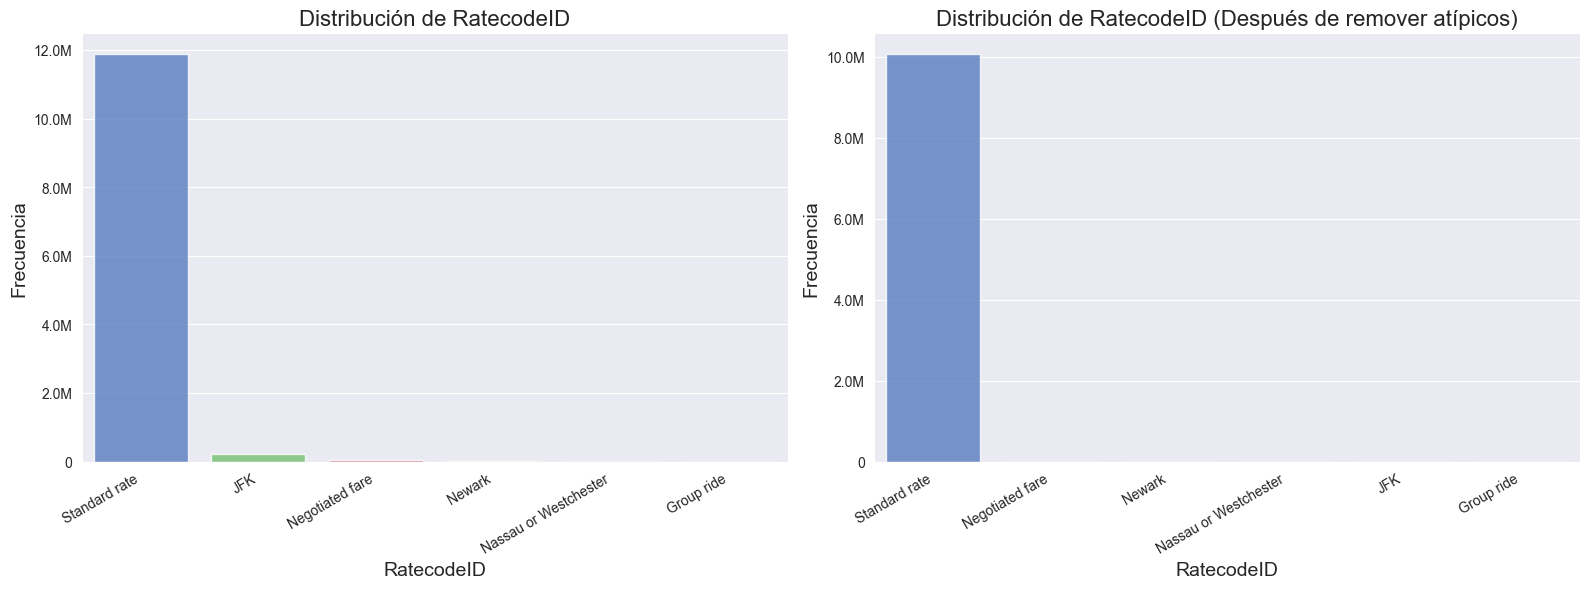

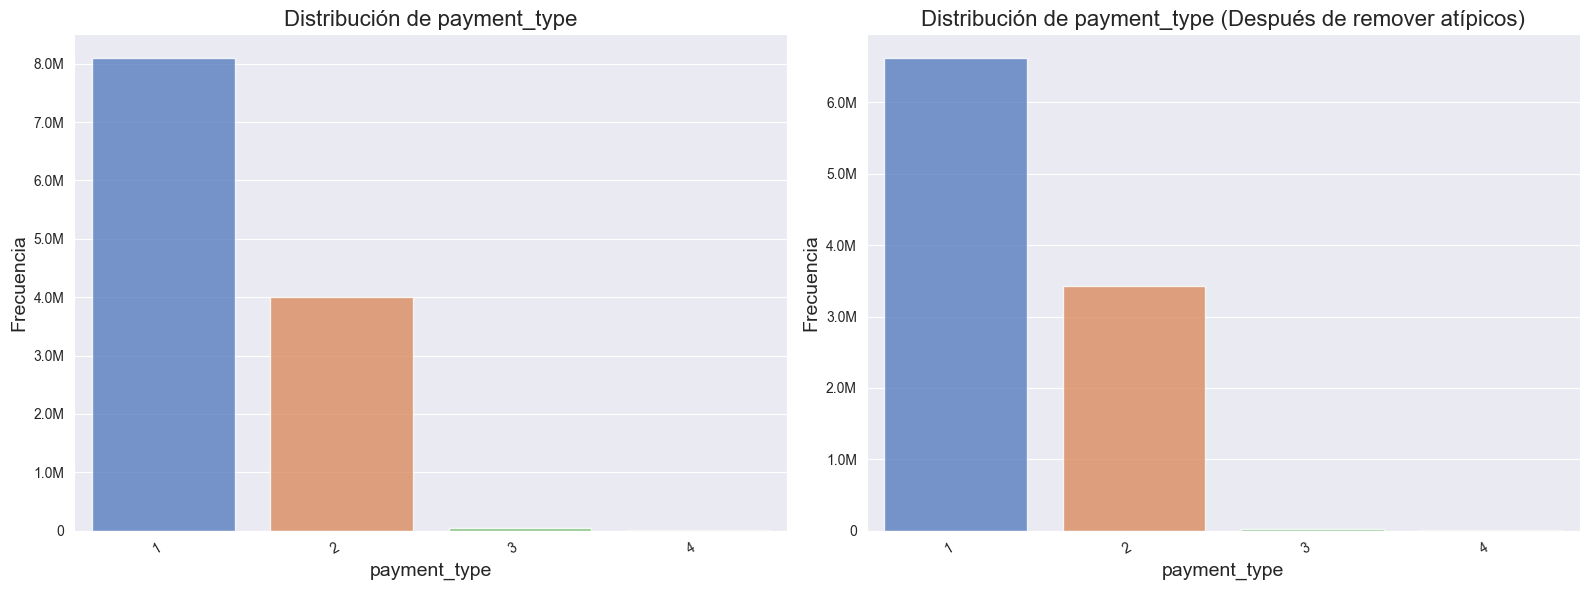

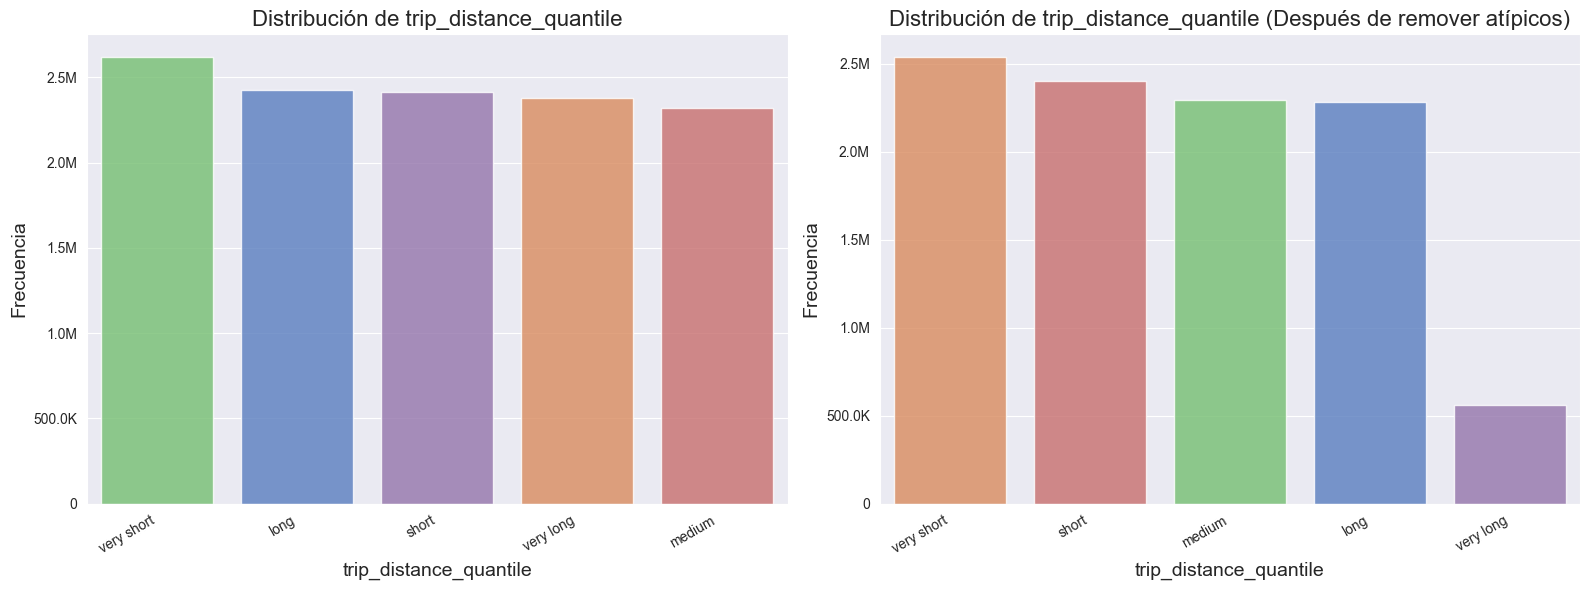

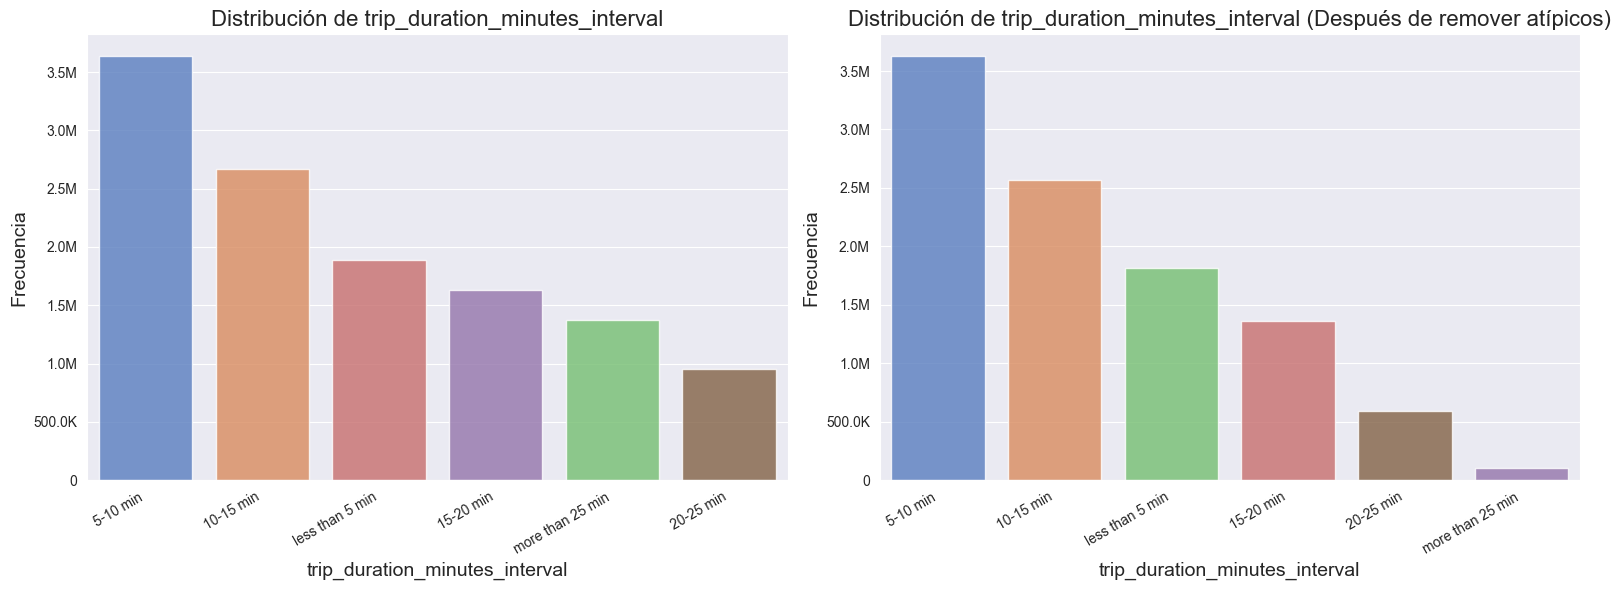

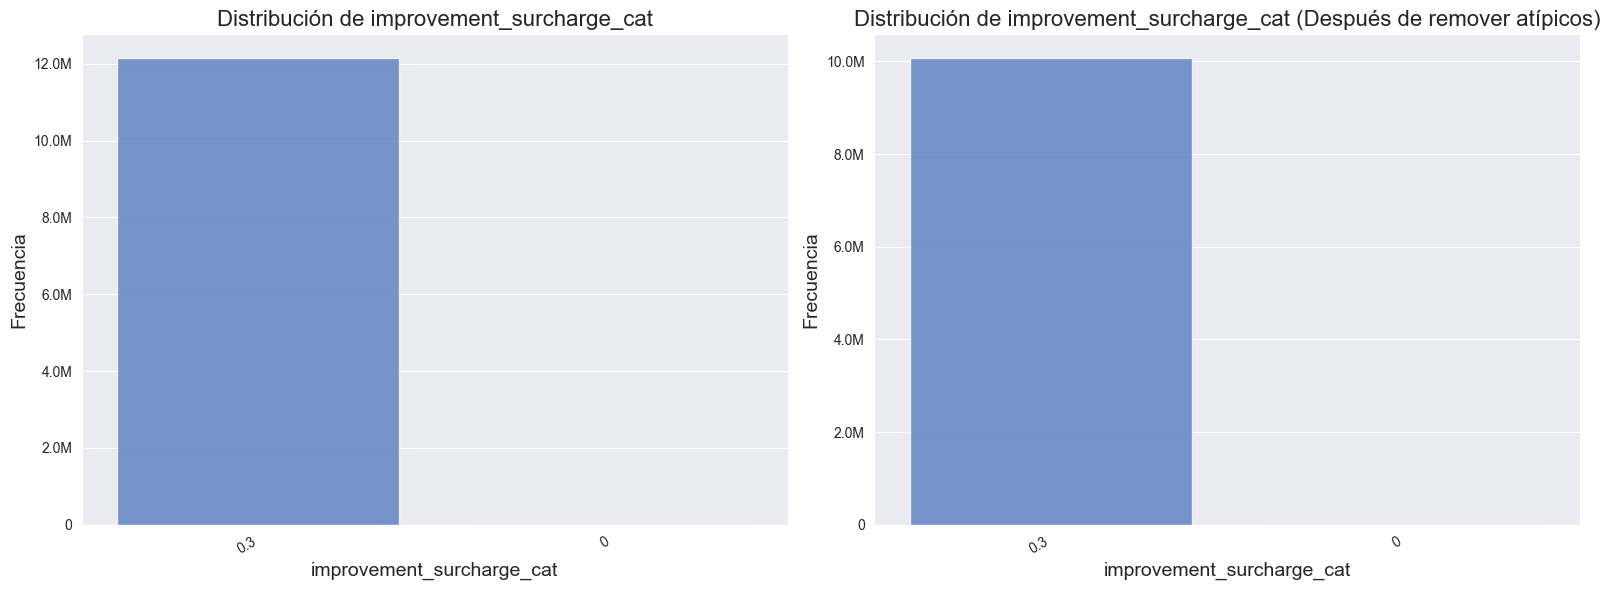

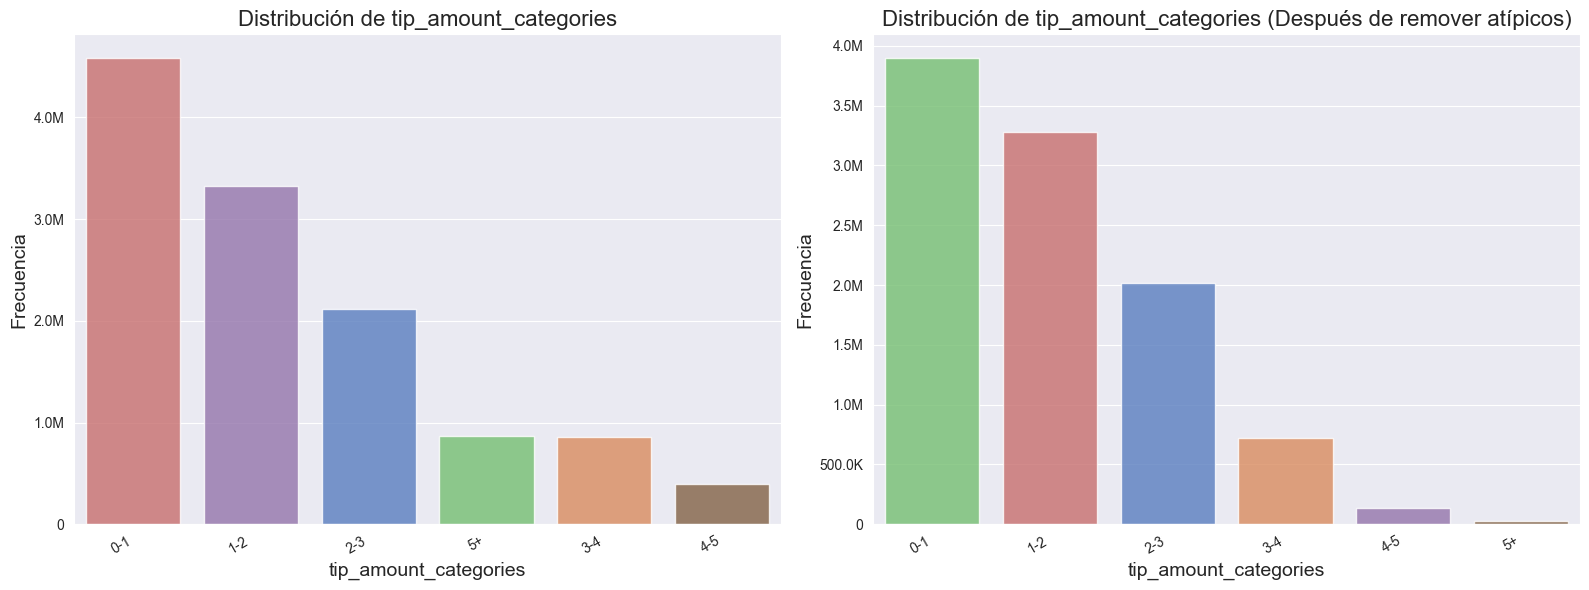

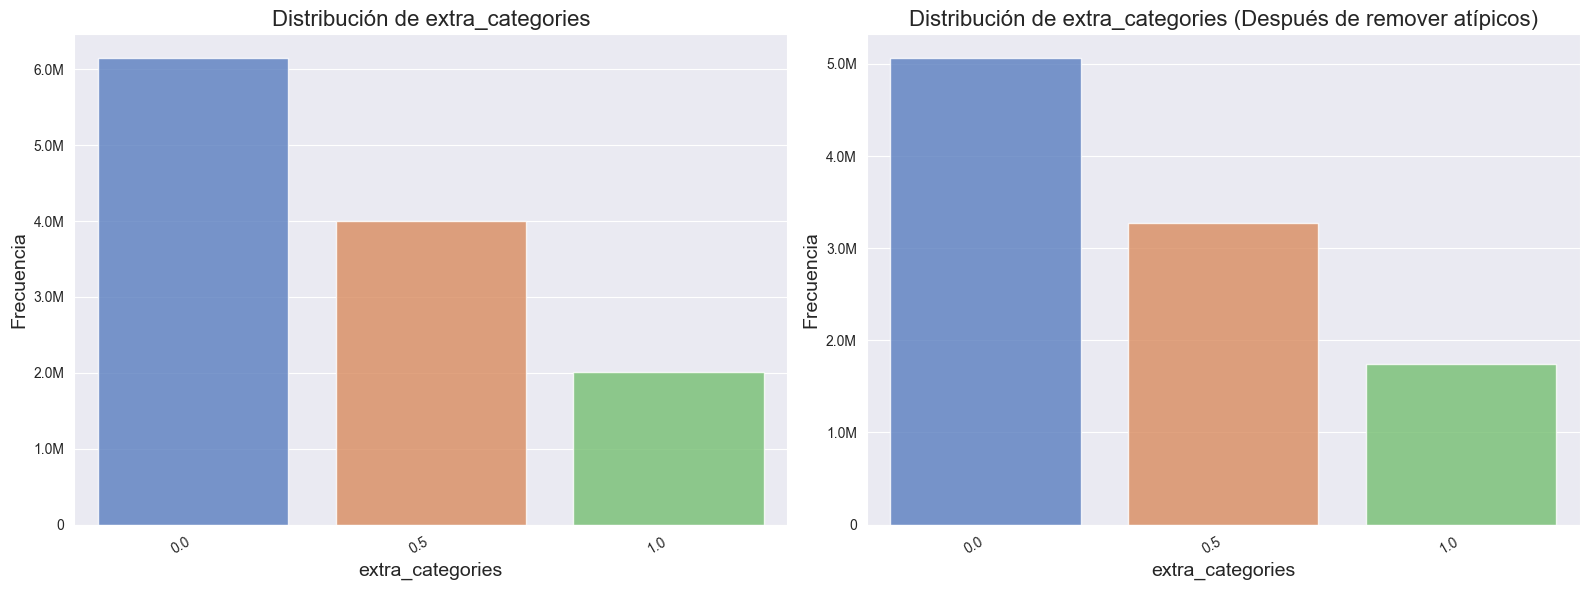

In [122]:
for var in vars_cat:
    if var != target_var_cat:
        order = data[var].value_counts().index
        plt.figure(figsize=(16, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(data=data, x=var, hue=var, order=order, palette="muted", alpha=0.8, legend=False)
        plt.gca().yaxis.set_major_formatter(formatter)  # Apply smart formatting
        plt.title(f'Distribución de {var}', fontsize=16)
        plt.xlabel(var, fontsize=14)
        plt.ylabel('Frecuencia', fontsize=14)
        plt.xticks(rotation=30, ha='right')
        plt.tight_layout()

        order_clean = data_cleaned[var].value_counts().index
        plt.subplot(1, 2, 2)
        sns.countplot(data=data_cleaned, x=var, hue=var, order=order_clean, palette="muted", alpha=0.8, legend=False)
        plt.gca().yaxis.set_major_formatter(formatter)  # Apply smart formatting
        plt.title(f'Distribución de {var} (Después de remover atípicos)', fontsize=16)
        plt.xlabel(var, fontsize=14)
        plt.ylabel('Frecuencia', fontsize=14)
        plt.xticks(rotation=30, ha='right')
        plt.tight_layout()
        plt.show()

**Distribución de RatecodeID**

En ambos gráficos se observa una clara predominancia de la tarifa estándar ("Standard rate") como el tipo de tarifa más utilizada en los viajes de taxi, con una frecuencia significativamente superior al resto de las categorías. Las demás tarifas, como "JFK", "Negotiated fare", "Newark", "Nassau or Westchester" y "Group ride", tienen una presencia muy baja en comparación, lo que indica que son utilizadas en situaciones muy específicas o excepcionales. Esta distribución sugiere que la mayoría de los viajes siguen tarifas regulares, mientras que las tarifas especiales se aplican con poca frecuencia.


**Distribución de payment\_type**

Los gráficos presentan la distribución de la variable `payment_type` antes y después de eliminar los valores atípicos. Se observa que dos categorías dominan claramente la distribución, mientras que las demás tienen una frecuencia muy baja. Aunque no se cuenta con la descripción exacta de lo que representa cada valor de `payment_type`, es evidente que los tipos 1 y 2 son los más comunes en el conjunto de datos, lo que podría reflejar los métodos de pago más utilizados. La eliminación de atípicos reduce la cantidad total de registros, pero no altera significativamente la distribución relativa entre las categorías principales.


**Distribución de trip_distance_quantile:**

El gráfico muestra la distribución de la variable `trip_distance_quantile` antes y después de remover valores atípicos. En su estado original, la distribución presenta una alta frecuencia de viajes (aproximadamente 800K) en un rango específico, con una cola larga que indica la presencia de valores extremos. Tras la eliminación de estos atípicos, la distribución se vuelve más compacta y equilibrada, manteniendo un pico cercano a los 2M de frecuencia en el rango principal, pero sin las colas extensas. Esto sugiere que los datos limpios reflejan mejor el comportamiento típico de las distancias de viaje, lo que podría mejorar la estabilidad y precisión de los modelos predictivos al reducir la influencia de observaciones anómalas.

**Distribución de trip_duration_minutes_interval:**

El gráfico compara la distribución de la duración de viajes antes y después de eliminar valores atípicos. En la versión original, se observa una frecuencia elevada (hasta 1.5M) en intervalos cortos (ej. 10-15 minutos), con una dispersión significativa hacia duraciones mayores. Tras la limpieza, la distribución se concentra en los rangos típicos (5-30 minutos), mostrando:
1. **Picos prominentes** en intervalos frecuentes (ej. 10-15 min)
2. **Reducción drástica** de frecuencias en duraciones extremas
3. **Estructura más definida** en los rangos centrales (20-25 min)

Esta transformación indica que el proceso de limpieza preservó los patrones principales de duración mientras eliminó distorsiones por valores anómalos, mejorando la calidad del dato para análisis. Se destaca la **sobrerrepresentación de viajes cortos** (5-15 min), que podrían corresponder a trayectos urbanos típicos.

**Interpretación mejorada de la distribución de propinas (tip_amount_categories):**

La interpretación mejorada de la distribución de propinas (tip_amount_categories) revela un patrón claro de comportamiento, en el que la mayoría de los viajes (~4 millones) se concentran en la categoría más baja (probablemente $0 o montos mínimos), lo que evidencia que una gran parte de los usuarios no da propina o aporta montos simbólicos. A medida que el monto de la propina aumenta, la frecuencia disminuye drásticamente (de 4 millones a menos de 1 millón), lo que muestra una relación inversa entre el valor de la propina y su ocurrencia. Esto sugiere que los montos altos son excepcionales, posiblemente asociados a viajes largos o clientes particularmente generosos, y que existe un umbral psicológico que lleva a los usuarios a preferir propinas bajas o nulas. Es importante destacar que la limpieza de datos atípicos no alteró este patrón, lo que confirma que la distribución observada refleja un comportamiento real de los usuarios y no distorsiones estadísticas. Desde una perspectiva de negocio, sería valioso estudiar los factores que motivan las propinas elevadas, como el tipo de cliente o la duración del viaje.

### Paso 9.2: Análisis Univeriado de Variables Númericas

#### Paso 9.2.1: Análisis Univeriado de Variables Discretas

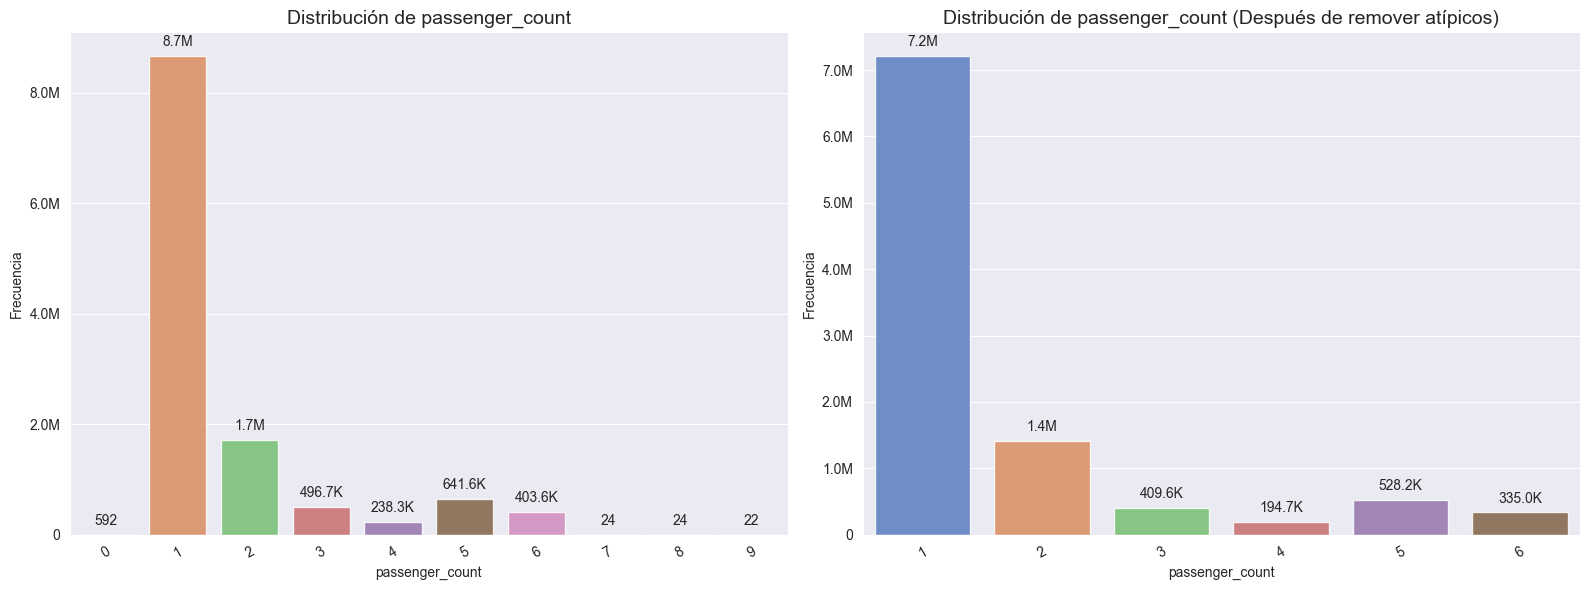

In [123]:
for var in vars_disc:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Original data
    sns.countplot(data=data, x=var, hue=var, palette="muted", alpha=0.85, ax=axs[0], legend=False)
    axs[0].yaxis.set_major_formatter(formatter)
    axs[0].set_title(f'Distribución de {var}', fontsize=14)
    axs[0].set_xlabel(var)
    axs[0].set_ylabel('Frecuencia')
    axs[0].tick_params(axis='x', rotation=30)
    annotate_bars(axs[0])

    # Cleaned data
    sns.countplot(data=data_cleaned, x=var, hue=var, palette="muted", alpha=0.85, ax=axs[1], legend=False)
    axs[1].yaxis.set_major_formatter(formatter)
    axs[1].set_title(f'Distribución de {var} (Después de remover atípicos)', fontsize=14)
    axs[1].set_xlabel(var)
    axs[1].set_ylabel('Frecuencia')
    axs[1].tick_params(axis='x', rotation=30)
    annotate_bars(axs[1])

    plt.tight_layout()
    plt.show()

**Nombre de la Gráfica:** Distribución de Pasajeros en Taxis (Distribución de passenger_count)

**Interpretación Rápida:**

Estos gráficos muestran que:

1.  La **gran mayoría** de los viajes en taxi amarillo son con **un solo pasajero** (8.7 millones antes, 7.2 millones después de limpiar los datos).
2.  La cantidad de viajes disminuye **drásticamente** a medida que aumenta el número de pasajeros.
3.  Los viajes con **muchos pasajeros** (más de 6) son **extremadamente raros** y, en su mayoría, considerados datos "atípicos" o "inusuales" que fueron eliminados.
4.  La categoría de "0 pasajeros" es marginal o un error y también fue eliminada.

En esencia, los taxis amarillos son utilizados predominantemente para **viajes individuales**.

#### Paso 9.2.2: Análisis Univeriado de Variables Continuas

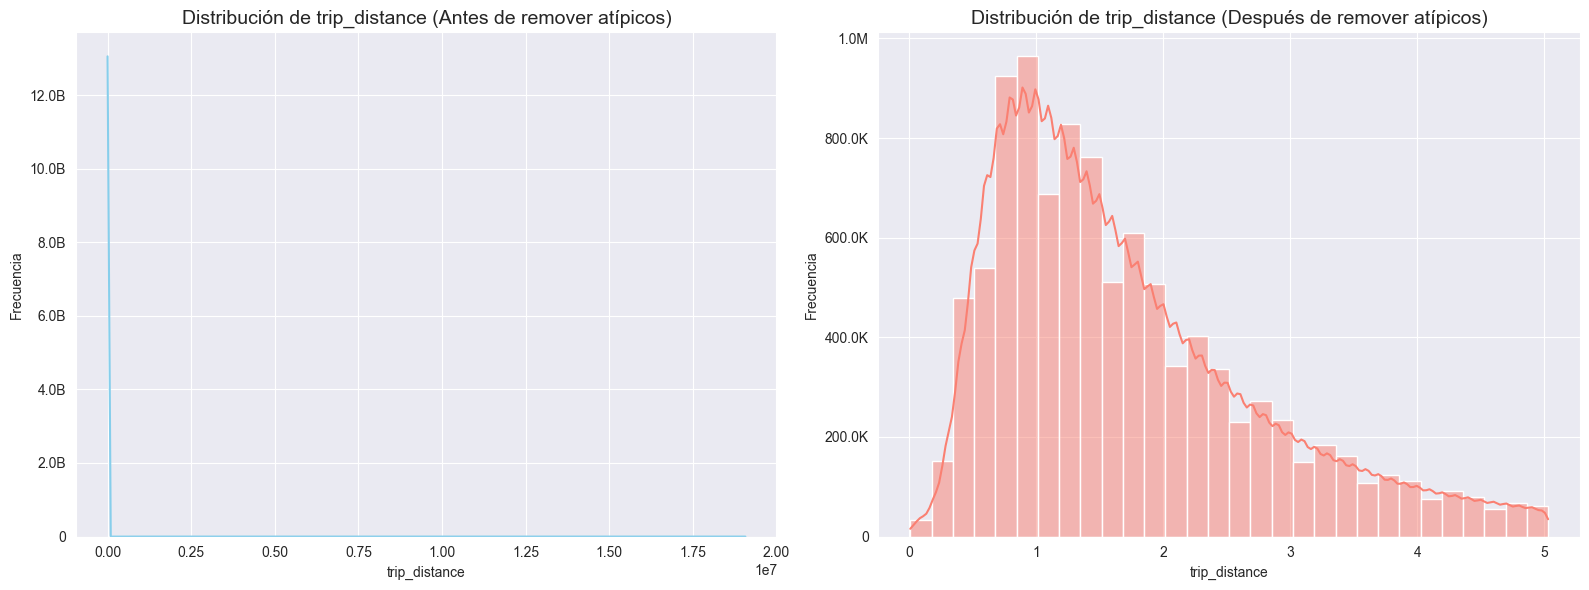

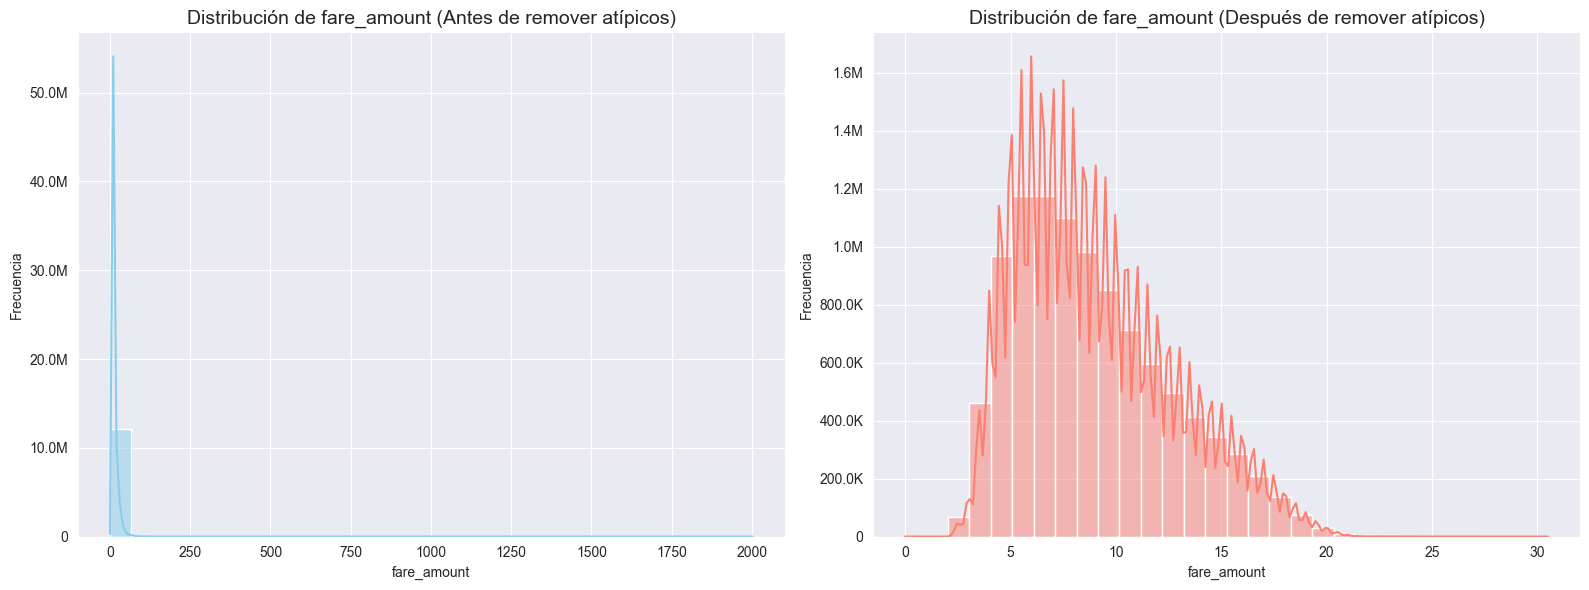

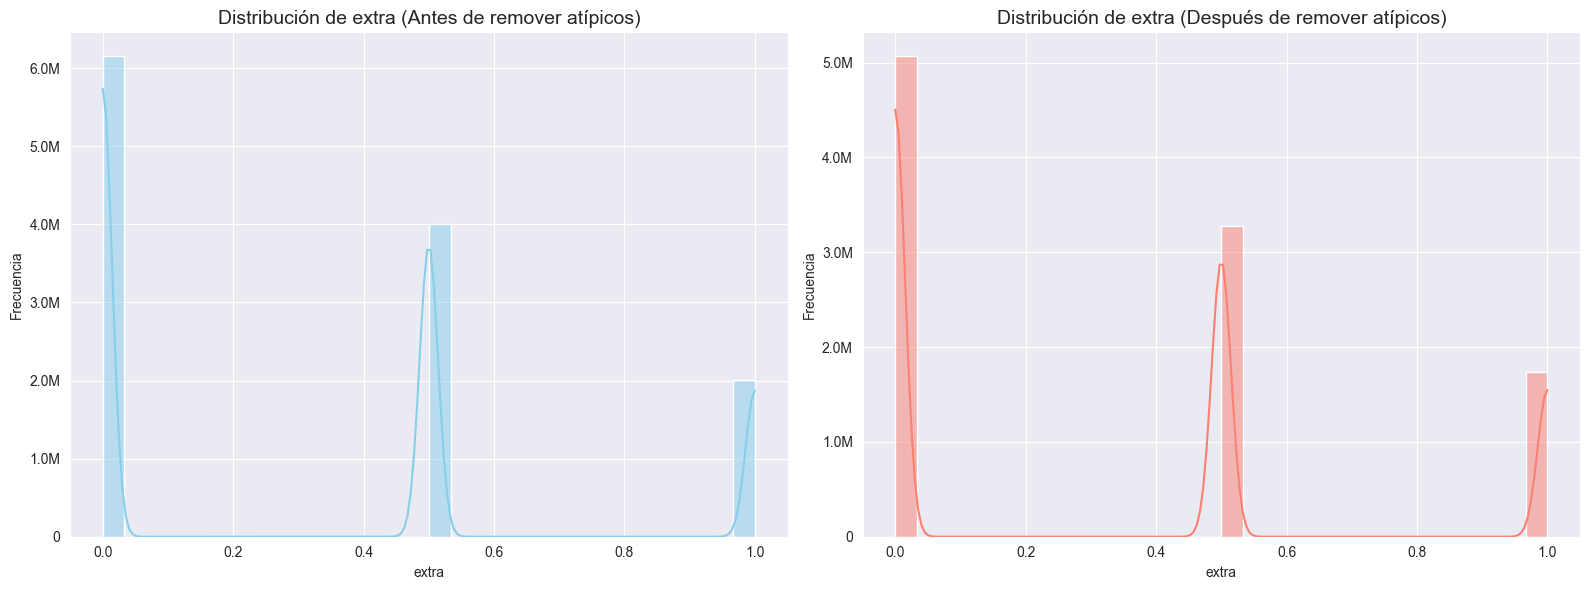

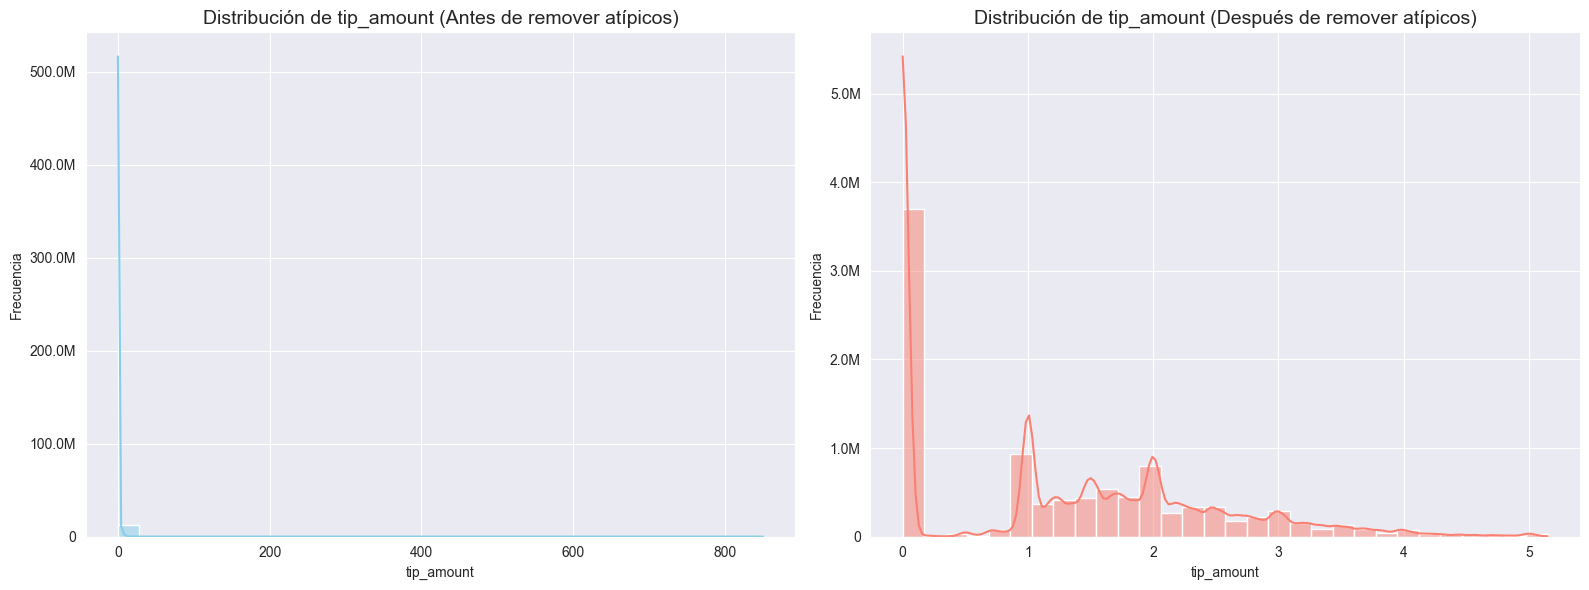

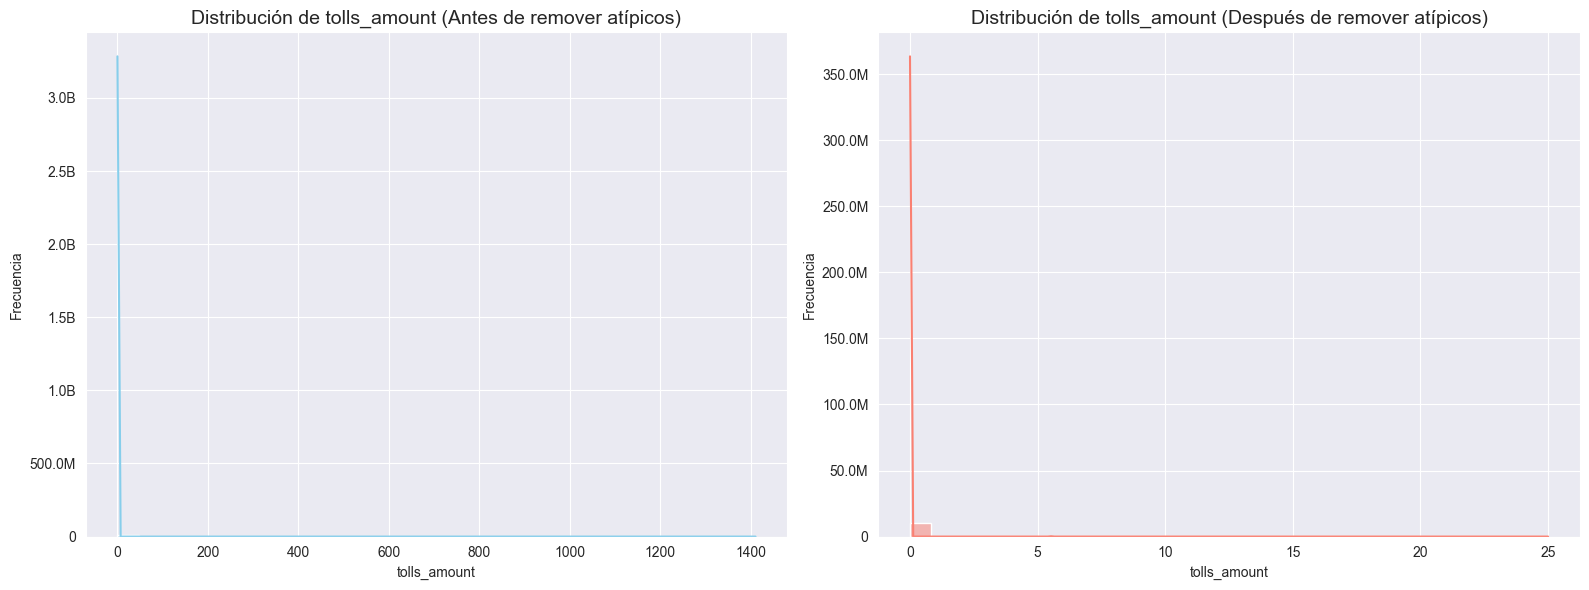

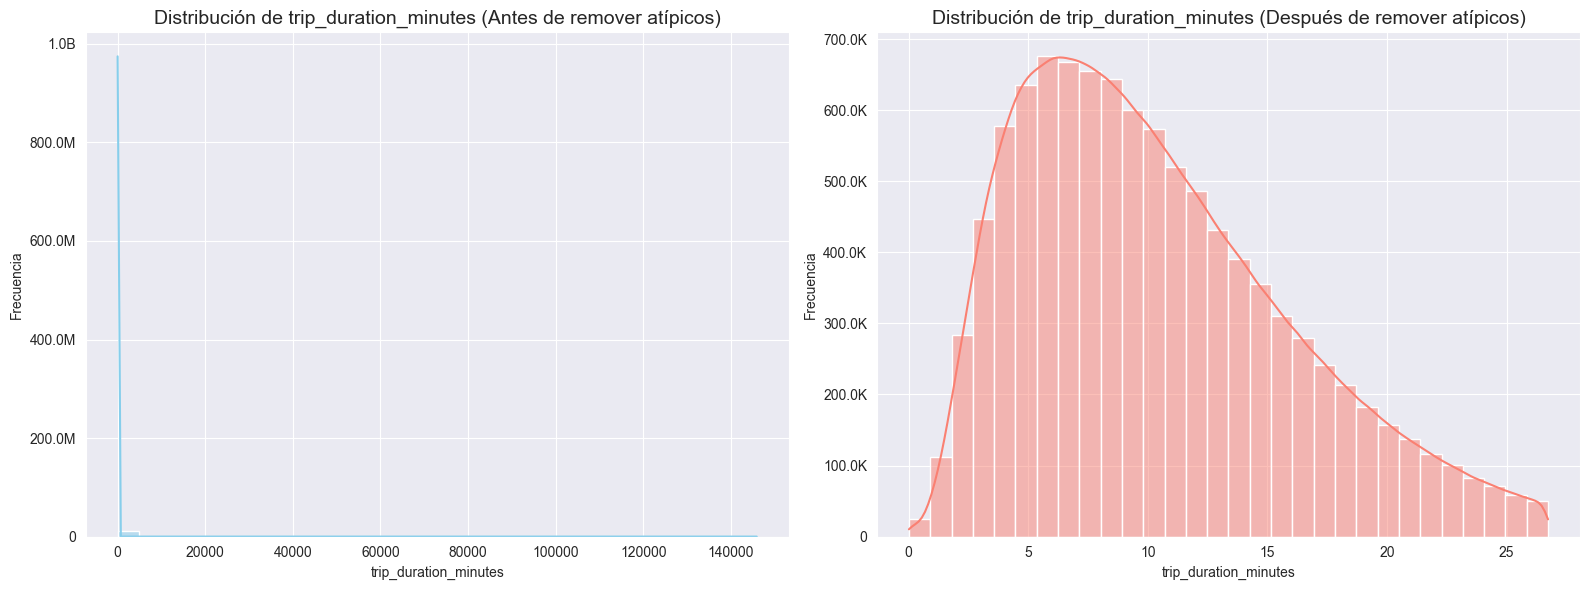

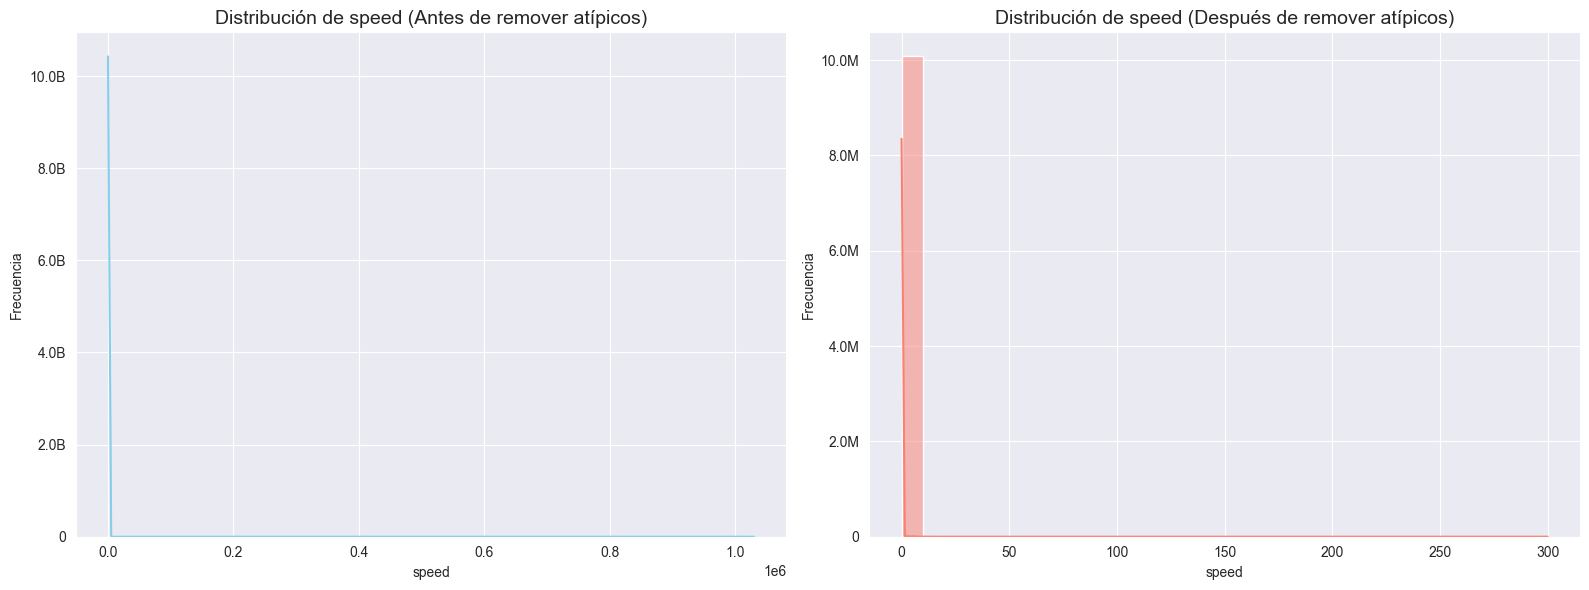

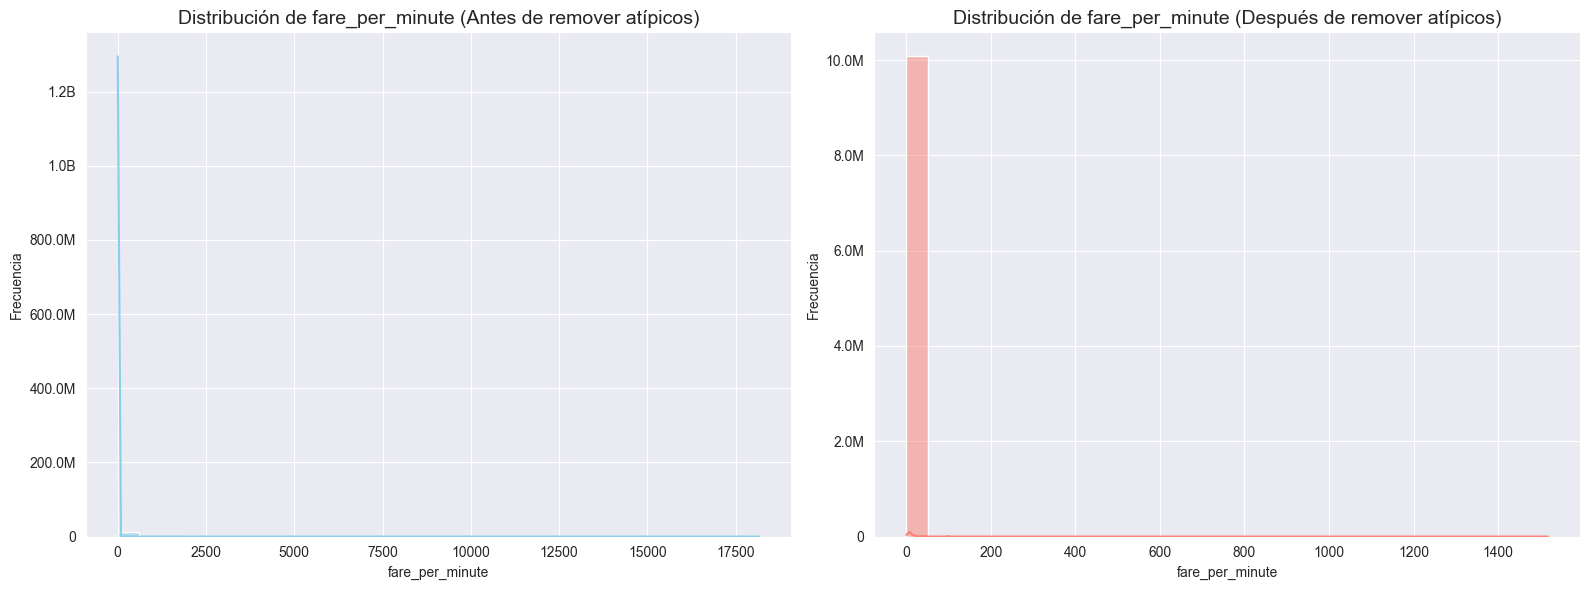

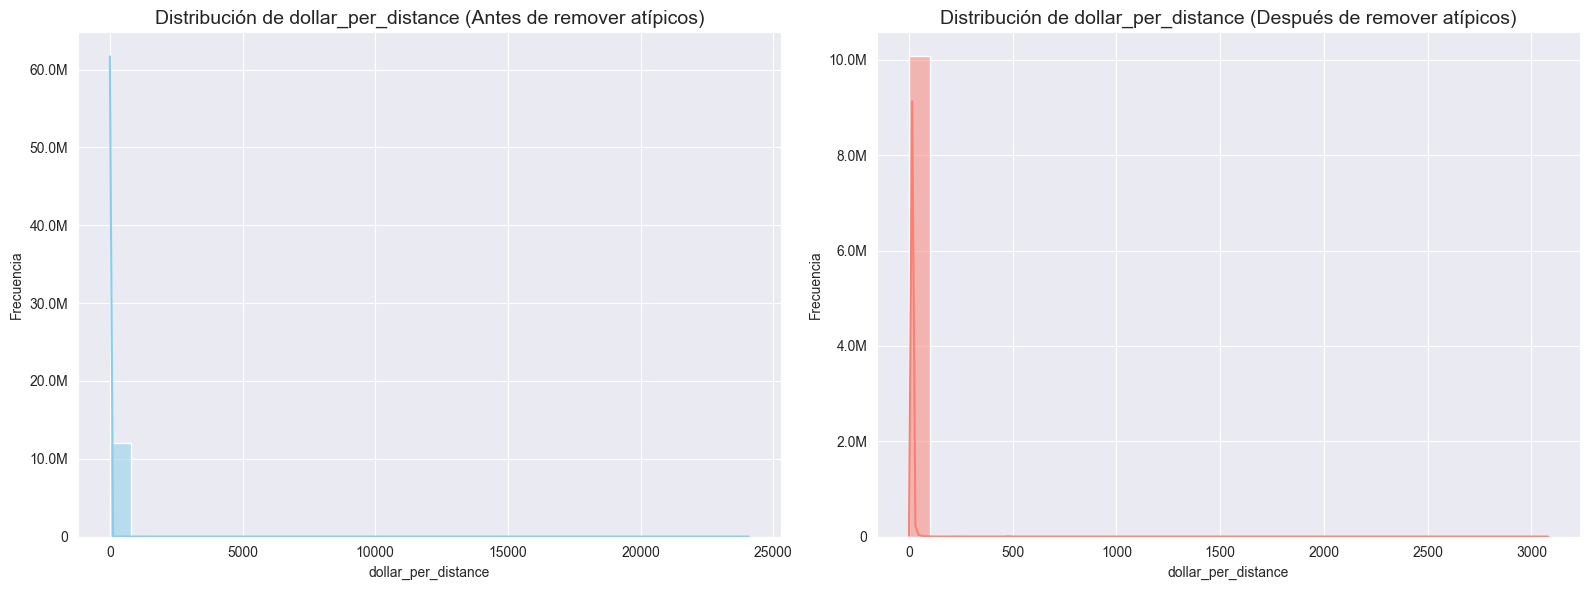

In [124]:
for var in vars_con:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Before outlier removal
    sns.histplot(data[var], kde=True, bins=30, ax=axs[0], color="skyblue")
    axs[0].yaxis.set_major_formatter(formatter)
    axs[0].set_title(f'Distribución de {var} (Antes de remover atípicos)', fontsize=14)
    axs[0].set_xlabel(var)
    axs[0].set_ylabel('Frecuencia')

    # After outlier removal
    sns.histplot(data_cleaned[var], kde=True, bins=30, ax=axs[1], color="salmon")
    axs[1].yaxis.set_major_formatter(formatter)
    axs[1].set_title(f'Distribución de {var} (Después de remover atípicos)', fontsize=14)
    axs[1].set_xlabel(var)
    axs[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

**Distribución de Distancia de trip_distance**

**Nombre de la Gráfica:** Distribución de Distancia de Viaje en Taxis (en Millas)

**Sesgo de la Distribución:**
La distribución de la distancia de viaje (trip_distance), especialmente después de remover los atípicos (gráfico derecho), presenta un **sesgo positivo** o **sesgo a la derecha**. Esto se debe a que la cola de la distribución se extiende hacia los valores más altos de distancia, mientras que la mayor parte de los datos se concentran en los valores más bajos (cerca de 0 a 2 millas).

**Resumen de la Interpretación:**

Estos gráficos muestran la distribución de la distancia de los viajes en taxi (en millas):

1.  **Antes de la limpieza:** Datos muy distorsionados por unos pocos viajes extremadamente largos (millones de millas, probable error), impidiendo ver el patrón real.
2.  **Después de la limpieza:** Se observa claramente que la **gran mayoría de los viajes son de corta distancia**, concentrándose principalmente entre **0 y 2 millas**. La distribución tiene un **sesgo positivo (a la derecha)**, lo que indica que, aunque la mayoría de los viajes son cortos, hay un número menor de viajes que cubren distancias progresivamente mayores.

En conclusión, los taxis amarillos se utilizan abrumadoramente para **trayectos cortos (principalmente menos de dos millas)**, con una tendencia decreciente para distancias más largas.

**Nombre de la Gráfica:** Distribución de fare_amount (Antes y Después de remover atípicos)

**Sesgo de la Distribución:**
La distribución de `fare_amount` (monto de la tarifa) presenta un claro **sesgo positivo** o **sesgo a la derecha**. Esto significa que la gran mayoría de los montos de tarifa se agrupan en el extremo inferior de la escala, y la frecuencia disminuye a medida que el monto de la tarifa aumenta, creando una "cola" más larga hacia los valores más altos.

**Resumen de la Interpretación:**

1.  **Gráfico Izquierdo (Antes de remover atípicos):** Imposible de interpretar debido a la presencia de valores atípicos extremos (tarifas muy altas, posiblemente errores) que distorsionan completamente la escala, comprimiendo la mayoría de los datos en un pico ilegible cercano a cero.
2.  **Gráfico Derecho (Después de remover atípicos):**
    * Muestra claramente que la **mayoría de los viajes tienen tarifas bajas**.
    * Hay una notable **concentración de tarifas entre 5 y 10 unidades de moneda**, siendo el rango más frecuente.
    * La distribución tiene un **sesgo positivo (a la derecha)**: la frecuencia de los viajes disminuye gradualmente a medida que la tarifa supera las 10 unidades.

**Conclusión:** La mayoría de los ingresos por taxi provienen de viajes con **tarifas entre 5 y 10 unidades monetarias**, y las tarifas más altas son considerablemente menos frecuentes. La limpieza de datos es esencial para poder apreciar este patrón.

**Nombre de la Gráfica:** Distribución de extra

**Resumen de la Interpretación:**

Estos gráficos muestran la distribución de los cargos adicionales (`extra`) aplicados a los viajes de taxi, tanto antes como después de la eliminación de datos atípicos.

La descripción proporcionada (`extra` incluye solo cargos de **\$0.50** y **\$1** por hora pico y nocturna) encaja perfectamente con la visualización:

1.  **Distribución Clara y Discreta (Multimodal):** Ambos gráficos revelan una distribución **claramente multimodal y discreta**. Esto significa que los cargos `extra` no son continuos, sino que toman valores específicos y bien definidos, lo que es coherente con la aplicación de recargos fijos.
2.  **Picos Directamente Explicados:** Los tres picos dominantes observados corresponden exactamente a las categorías lógicas de cargos adicionales:
    * **Pico en `extra = 0`:** Representa la **mayoría de los viajes que no incurren en ningún cargo adicional** (ni por hora pico ni nocturno).
    * **Pico en `extra = 0.5`:** Representa los viajes a los que se les aplica el cargo estándar de **\$0.50** (probablemente por hora pico o nocturna). Es el segundo cargo más frecuente.
    * **Pico en `extra = 1.0`:** Representa los viajes a los que se les aplica el cargo de **\$1.00** (posiblemente por la combinación de un cargo de \$0.50 \+ \$0.50, o un único recargo de \$1.00 si aplica). Es el tercer cargo más frecuente.
3.  **Consistencia Post-Limpieza:** La eliminación de atípicos (del gráfico izquierdo al derecho) no altera la forma fundamental de la distribución ni las ubicaciones de los picos, solo ajusta ligeramente las frecuencias absolutas, confirmando la robustez de estos patrones.

**Nombre de la Gráfica:** Distribución de tip_amount (Antes y Después de remover atípicos)

**Descripción:**

El gráfico inicial es **incomprensible** debido a la presencia de **propinas atípicas extremadamente altas** que distorsionan la escala.

Una vez eliminados estos valores anómalos, el gráfico revela que la distribución de las propinas es:
1.  **Dominada por viajes sin propina**, con un **pico masivo en 0**.
2.  **Multimodal**, lo que significa que las propinas, cuando se dan, tienden a agruparse en **montos discretos y fijos** (como $0.50, $1.00, $1.50, $2.00, etc.), en lugar de variar continuamente.
3.  Presenta un **sesgo positivo (a la derecha)**, ya que la mayor concentración de datos está en los valores más bajos, con una cola que se extiende hacia montos de propina más altos, pero con menor frecuencia.

En síntesis, la mayoría de los viajes no generan propina, y cuando sí lo hacen, la gente tiende a dar cantidades específicas y redondas.

**Nombre de la Gráfica:** Distribución de trip_duration_minutes (Antes y Después de remover atípicos)

**Descripción:**

El gráfico de la izquierda es **inútil para cualquier análisis significativo**, ya que la presencia de **valores atípicos de duración extremadamente largos** (probablemente errores en los datos que extienden el viaje a miles o incluso decenas de miles de minutos) comprime de forma drástica la visualización, haciendo que la inmensa mayoría de las duraciones de viaje sean invisibles en un pico minúsculo cerca de cero.

Una vez que estos datos erróneos o anómalos son removidos (gráfico de la derecha), se revela un patrón claro y muy informativo:
* La **mayoría de los viajes en taxi son de corta duración**, con la mayor concentración de frecuencia ocurriendo entre los **5 y 10 minutos**. Este es el rango más común para los viajes.
* La distribución presenta un **marcado sesgo positivo (o sesgo a la derecha)**. Esto indica que, aunque la mayoría de los viajes son breves, a medida que la duración aumenta, la frecuencia de los viajes disminuye progresivamente. Los viajes que superan los 20-25 minutos son considerablemente menos frecuentes.

En síntesis, la información limpia nos muestra que los taxis son un servicio utilizado predominantemente para **trayectos cortos y eficientes**, y la fase de limpieza de datos es crucial para descubrir esta característica fundamental.

### Paso 9.3: Análisis Univeriado del Variable Objetivo Continua

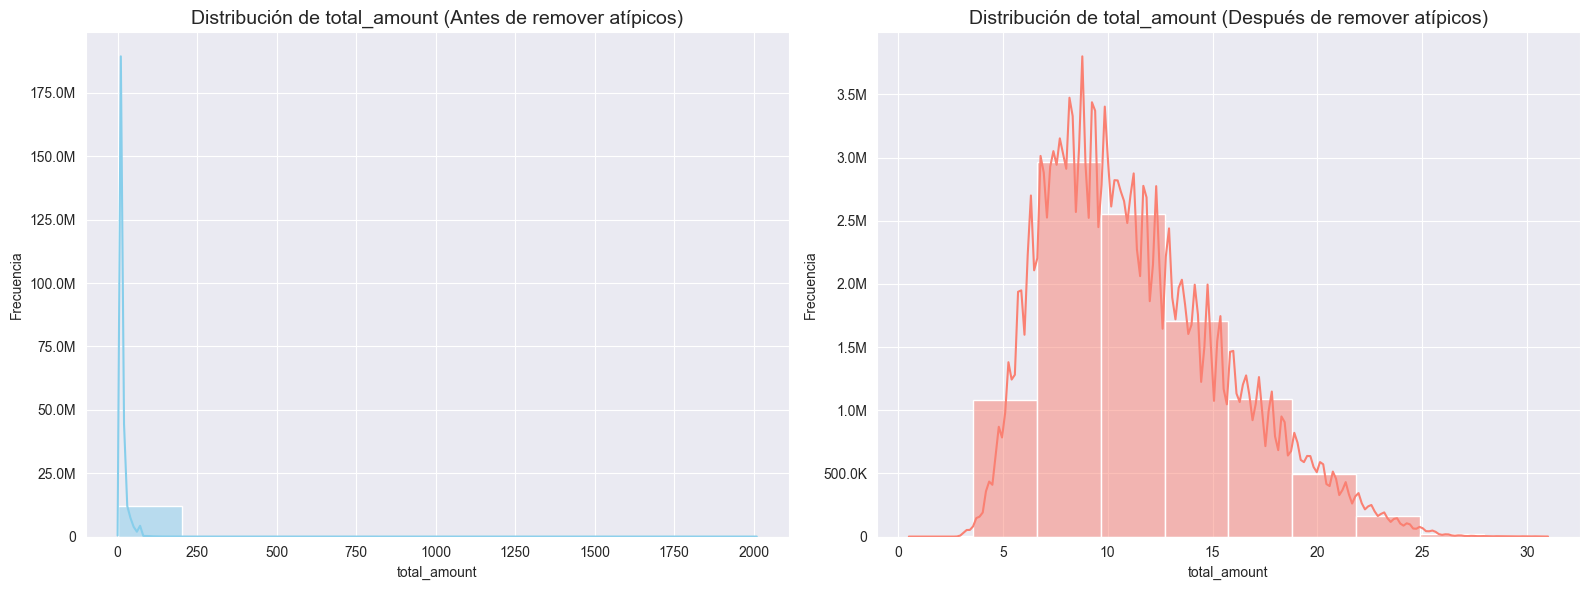

In [125]:
# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Before removing outliers
sns.histplot(data[target_var_num], kde=True, bins=10, ax=axs[0], color='skyblue')
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_title(f'Distribución de {target_var_num} (Antes de remover atípicos)', fontsize=14)
axs[0].set_xlabel(target_var_num)
axs[0].set_ylabel('Frecuencia')

# After removing outliers
sns.histplot(data_cleaned[target_var_num], kde=True, bins=10, ax=axs[1], color='salmon')
axs[1].yaxis.set_major_formatter(formatter)
axs[1].set_title(f'Distribución de {target_var_num} (Después de remover atípicos)', fontsize=14)
axs[1].set_xlabel(target_var_num)
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


**Nombre de la Gráfica:** Distribución de total_amount (Antes y Después de remover atípicos)

**Descripción:**

El gráfico de la izquierda es **prácticamente inútil para la interpretación**. La presencia de **valores atípicos de `total_amount` extremadamente altos** (probablemente errores o transacciones anómalas que llegan a miles de unidades monetarias) distorsiona masivamente la escala del eje, comprimiendo la inmensa mayoría de los datos reales en un pico minúsculo e invisible cerca de cero. Esto hace imposible discernir el patrón de los costos de viaje típicos.

Una vez que estos valores atípicos son eliminados (gráfico de la derecha), la distribución del `total_amount` se vuelve clara y reveladora:
* La **mayoría de los viajes tienen un costo total relativamente bajo**, con la mayor concentración de frecuencia ocurriendo entre **5 y 15 unidades monetarias**. Este es el rango más común para los viajes.
* La distribución presenta un **marcado sesgo positivo (o sesgo a la derecha)**. Esto indica que la gran mayoría de los viajes son de bajo costo, y a medida que el monto total aumenta, la frecuencia de los viajes disminuye progresivamente. Los viajes con un costo total superior a las 20-25 unidades son considerablemente menos comunes.

En resumen, los datos limpios muestran que los taxis son utilizados predominantemente para **viajes con un costo total moderado a bajo**, siendo los trayectos más económicos los más frecuentes. La limpieza de datos fue fundamental para observar este patrón real.

### Paso 9.4: Análisis Univeriado del Variable Objetivo Categórica

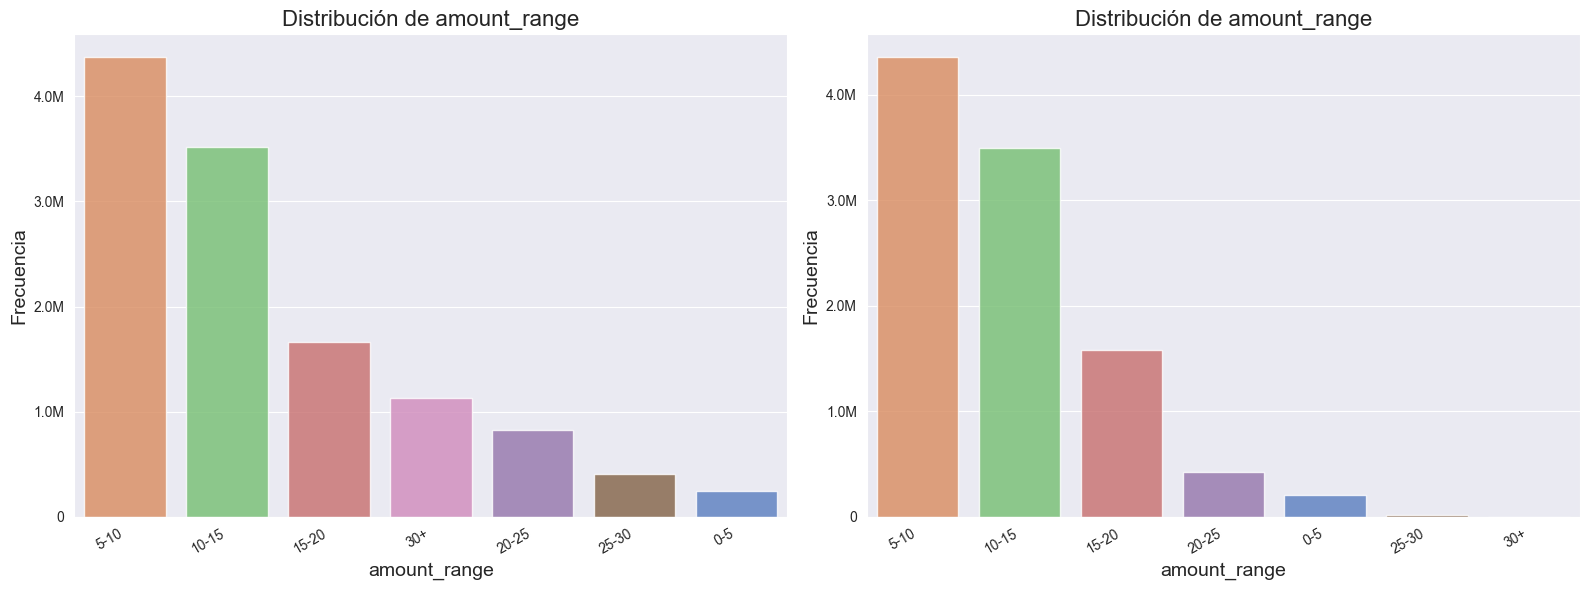

In [120]:
order = data[target_var_cat].value_counts().index
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x=target_var_cat, hue=target_var_cat, order=order, palette="muted", alpha=0.8, legend=False)
plt.gca().yaxis.set_major_formatter(formatter)  # Apply smart formatting
plt.title(f'Distribución de {target_var_cat}', fontsize=16)
plt.xlabel(target_var_cat, fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

order_clean = data_cleaned[target_var_cat].value_counts().index
plt.subplot(1, 2, 2)
sns.countplot(data=data_cleaned, x=target_var_cat, hue=target_var_cat, order=order_clean, palette="muted", alpha=0.8, legend=False)
plt.gca().yaxis.set_major_formatter(formatter)  # Apply smart formatting
plt.title(f'Distribución de {target_var_cat}', fontsize=16)
plt.xlabel(target_var_cat, fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

La variable objetivo `categoria` clasifica las observaciones en diferentes grupos, y los gráficos muestran la distribución de los valores de `amount_range`, que representa rangos del valor total de los costos de taxis. Al comparar ambos gráficos, se observa que la mayoría de los viajes tienen costos entre 5 y 15 unidades monetarias, tanto en la distribución general como en la de una clase específica de `categoria`. Los valores más altos, como los rangos `25-30` o `30+`, tienen una frecuencia menor, lo cual es esperable, ya que representan trayectos más largos o tarifas más elevadas que no son tan comunes. En resumen, los datos muestran una concentración en los montos medios, reflejando un comportamiento típico en el uso del servicio.


## Paso 10: Análisis Bivariado

### Paso 10.1: Análisis Bivariado: Relación con el Precio

#### Paso 10.1.1: Análisis Bivariado: Relación con el Precio Total y Variables Categorías

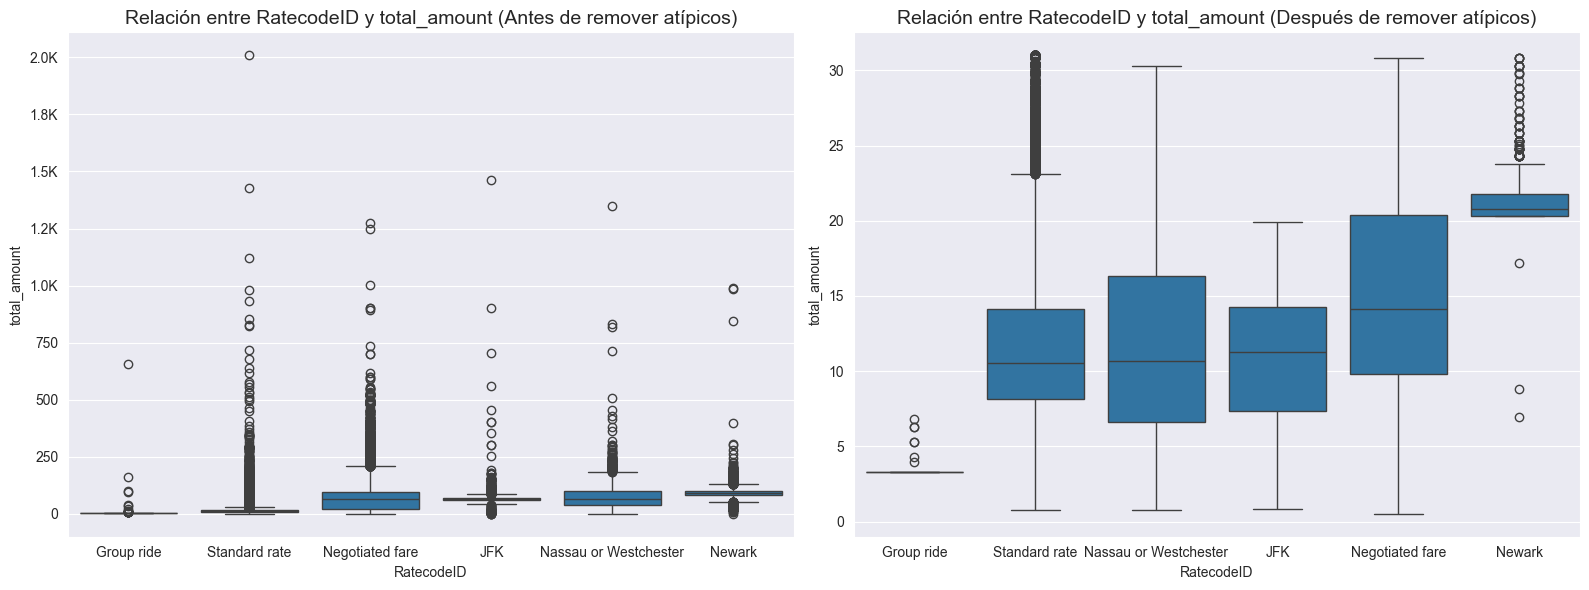

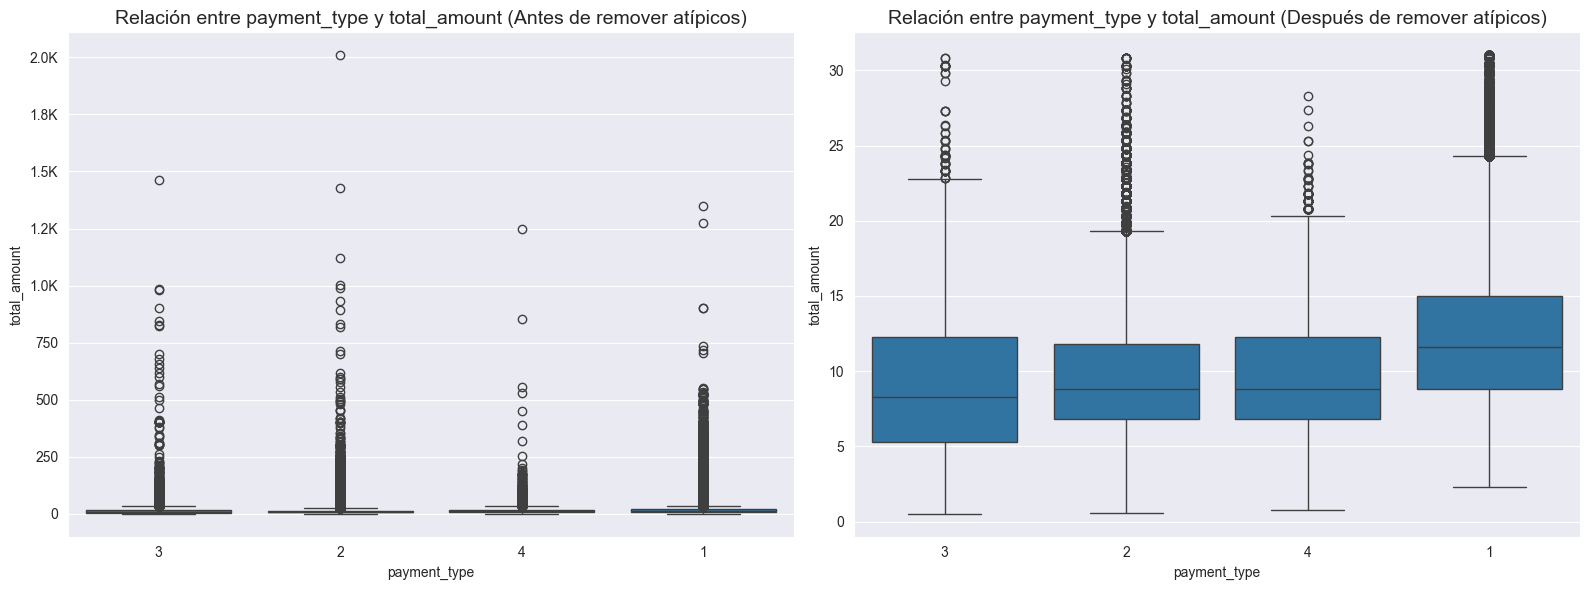

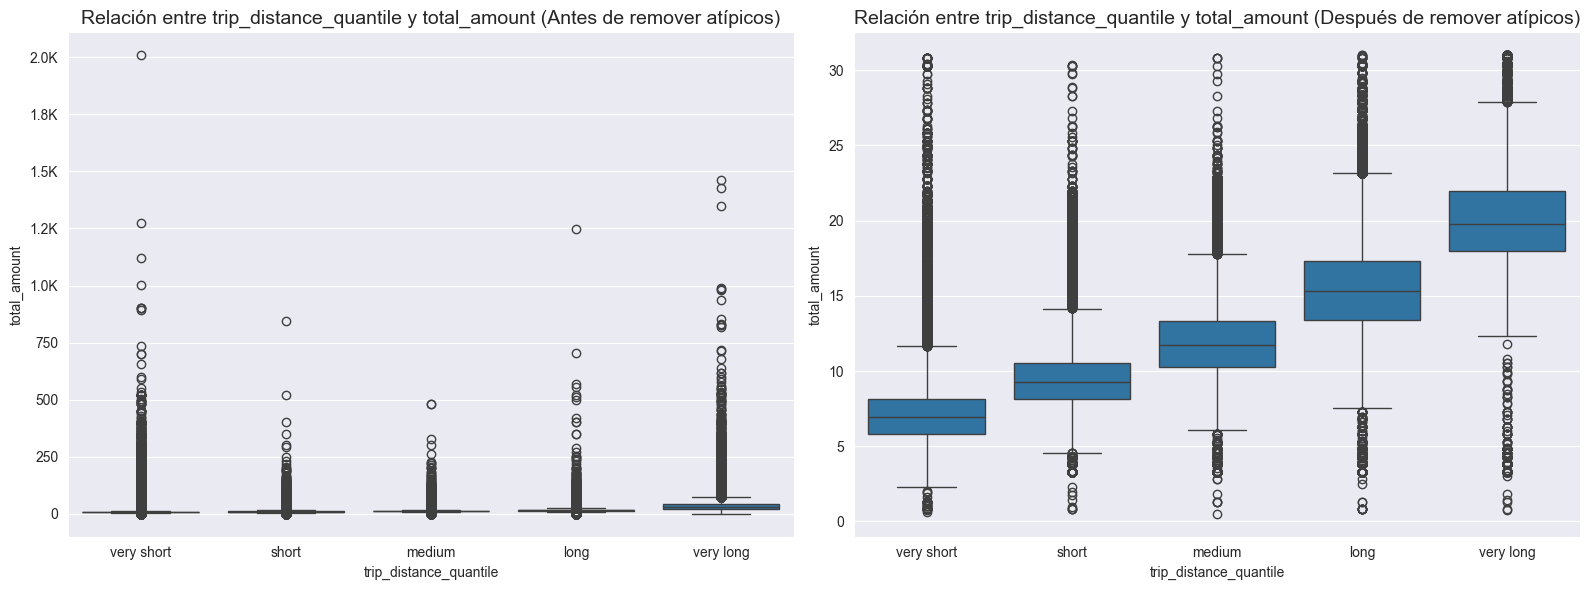

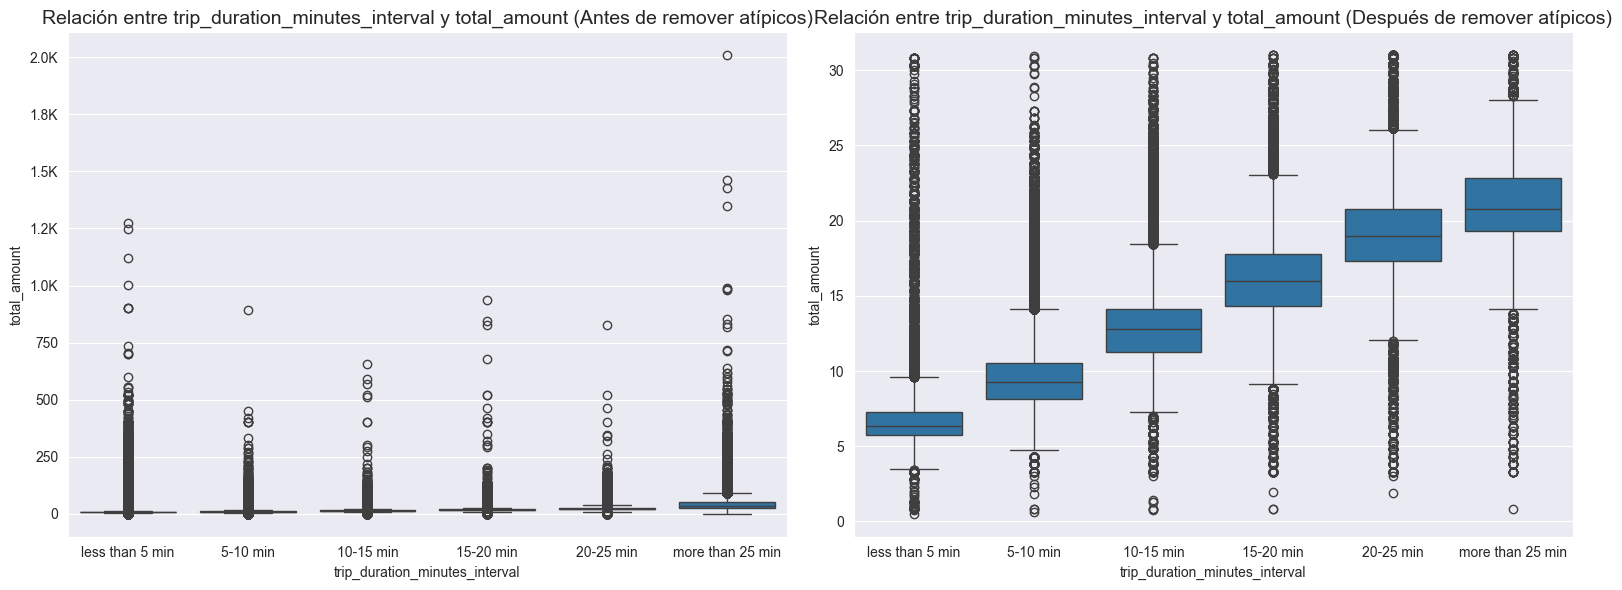

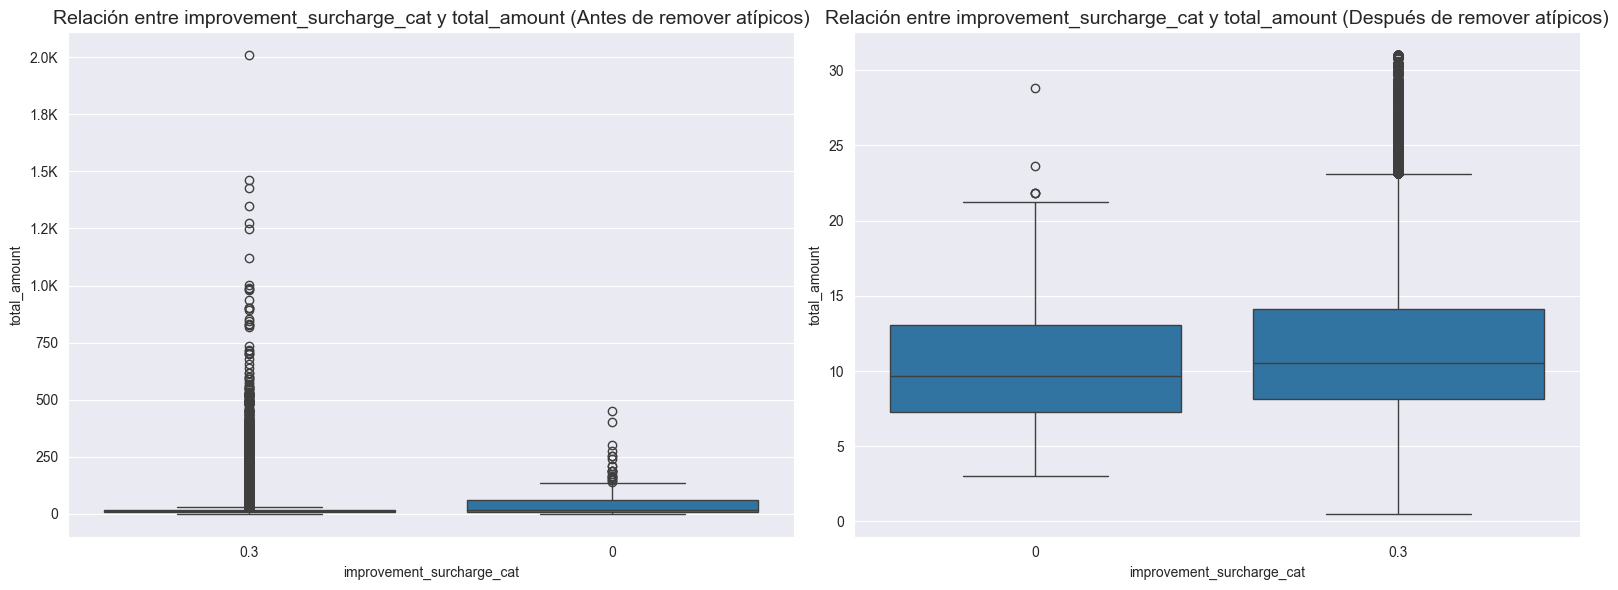

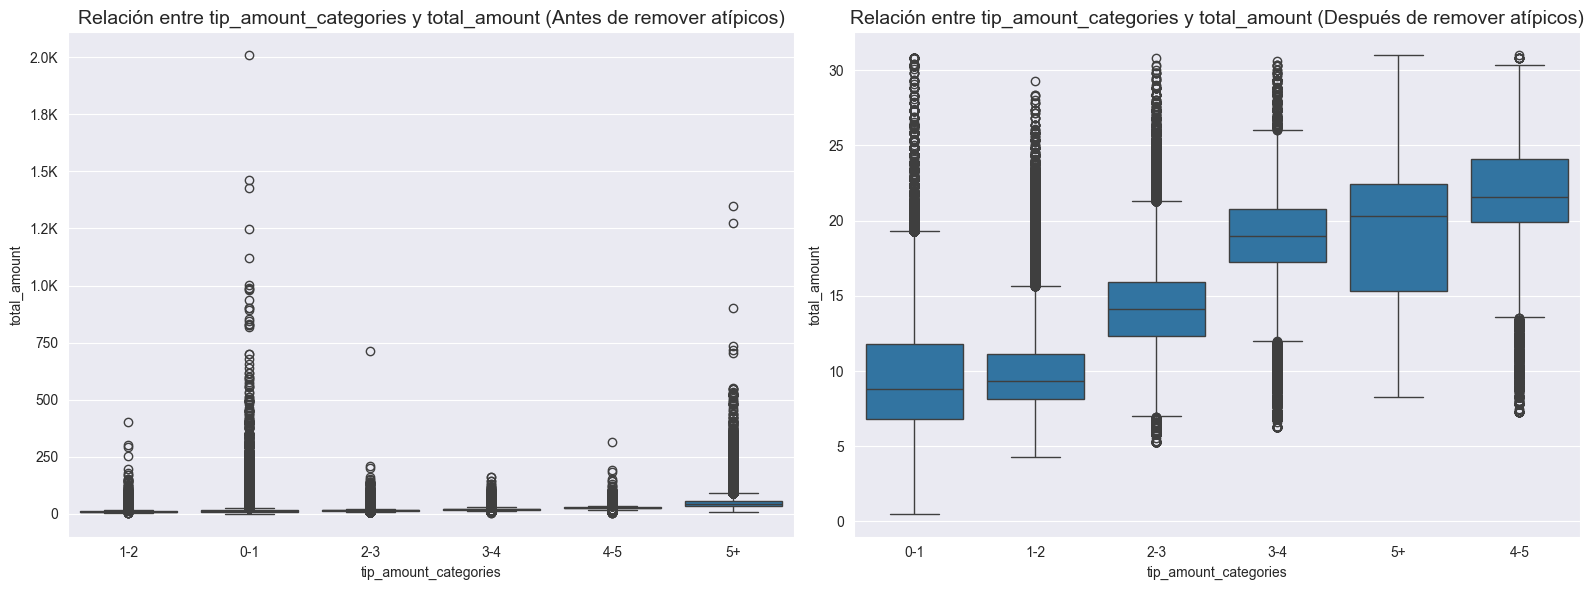

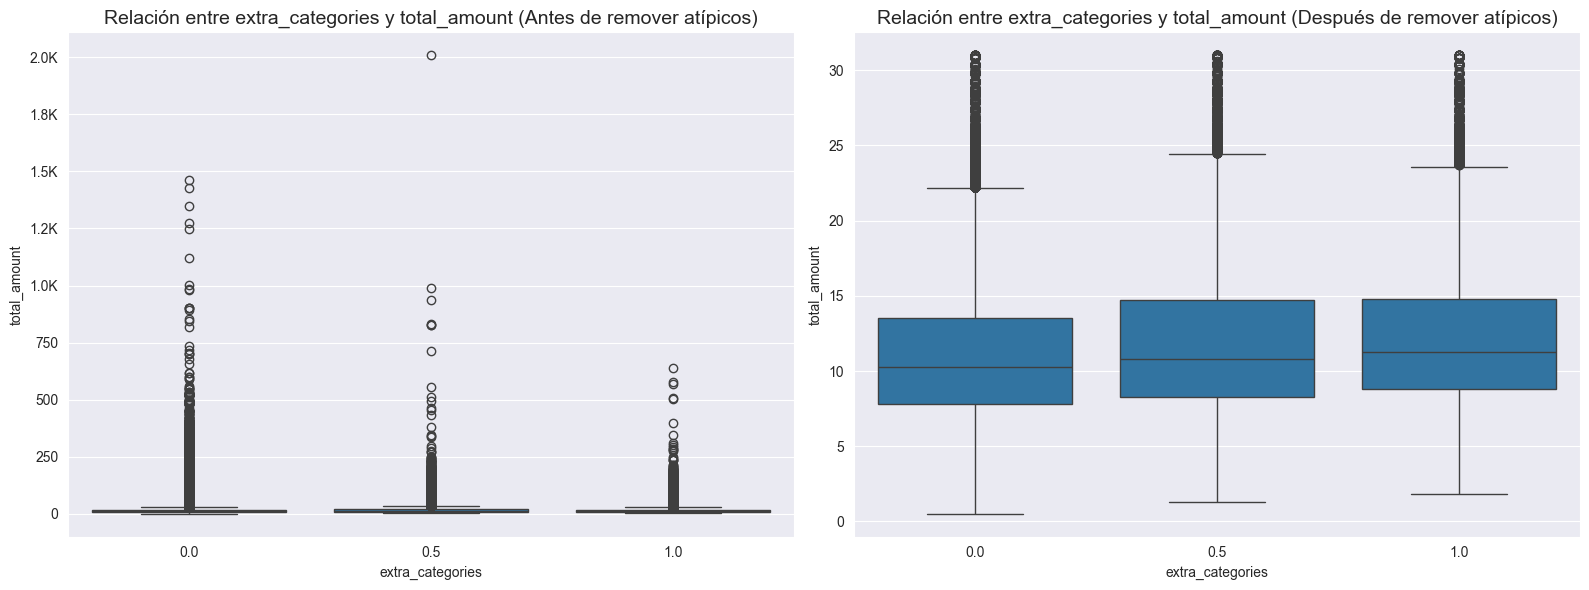

In [126]:
# Boxplot with formatted y-axis and ordered categories
for col in vars_cat:
    # Calcular el orden de las categorías según la mediana de target_var_num
    order_before = data.groupby(col)[target_var_num].median().sort_values().index
    order_after = data_cleaned.groupby(col)[target_var_num].median().sort_values().index

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Before outlier removal
    sns.boxplot(data=data, x=col, y=target_var_num, ax=axs[0], order=order_before)
    axs[0].yaxis.set_major_formatter(formatter)
    axs[0].set_title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel(target_var_num)

    # After outlier removal
    sns.boxplot(data=data_cleaned, x=col, y=target_var_num, ax=axs[1], order=order_after)
    axs[1].yaxis.set_major_formatter(formatter)
    axs[1].set_title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(target_var_num)

    plt.tight_layout()
    plt.show()


**Nombre de la Gráfica:** Relación entre RatecodeID y total_amount (Antes y Después de remover atípicos)

**Descripción:**

El gráfico inicial es **inútil para cualquier análisis**, ya que la presencia de **valores atípicos extremos en el monto total** distorsiona completamente la escala, impidiendo ver la distribución real de los precios por tipo de tarifa. Sin embargo, tras la eliminación de estos datos anómalos, el gráfico se vuelve claro y revelador:

* Los viajes a **"Newark" son consistentemente los más caros**, con la mediana más alta.
* Los de **"Group ride" son los más económicos**, con la mediana más baja.
* Las tarifas **"Standard rate", "JFK" y "Nassau or Westchester"** muestran montos totales promedio (medianas) similares y una dispersión intermedia.

Un punto crucial es que la **"Negotiated fare" (tarifa negociada) se posiciona como el segundo tipo de tarifa más cara, después de Newark**. Su mediana es **claramente superior a la de las tarifas "Standard rate", "JFK" y "Nassau or Westchester"**. Aunque su caja (rango intercuartílico) es más estrecha que la de Newark, lo que sugiere una mayor consistencia en sus precios dentro de ese segmento más alto, su costo total típico es notablemente elevado en comparación con los tipos de tarifas más comunes. Esta limpieza de datos fue fundamental para discernir cómo el tipo de tarifa impacta de manera distintiva el costo total del viaje, revelando que las tarifas negociadas tienden a ser de un valor total elevado.

**Relación entre tipo de pago y monto total antes y después de eliminar valores atípicos**

La gráfica muestra la relación entre el tipo de pago (`payment_type`) y el monto total (`total_amount`) antes y después de eliminar los valores atípicos. En la imagen de la izquierda, se observa que todos los tipos de pago presentan múltiples valores extremos que elevan considerablemente los montos, dificultando la visualización de la distribución real de los datos, ya que la mayoría de los valores quedan aplastados en la base del gráfico. En contraste, la imagen de la derecha muestra la misma relación tras haber removido los valores atípicos, lo que permite apreciar con mayor claridad la mediana, la dispersión y la variabilidad real de los montos por tipo de pago. Esta limpieza de datos facilita la comparación entre categorías, mostrando que, aunque existen diferencias leves, el tipo de pago 1 tiende a presentar montos ligeramente más altos. Es posible que las personas que utilizan este tipo de pago tengan mayor capacidad económica o disponibilidad de recursos, lo que les permite realizar pagos de mayor valor. En general, la eliminación de valores atípicos resulta fundamental para obtener análisis más precisos y visualmente interpretables.


**Relación entre la distancia del viaje y el monto total antes y después de remover atípicos**

La imagen muestra cómo varía el monto total (`total_amount`) en función del cuantil de la distancia del viaje (`trip_distance_quantile`) antes (izquierda) y después (derecha) de eliminar valores atípicos. En el gráfico de la izquierda, los valores extremos dominan la visualización, impidiendo una interpretación clara de las tendencias centrales y la variabilidad de los datos. Esto genera una compresión de los valores más frecuentes en la parte inferior del gráfico. En cambio, tras eliminar los valores atípicos, el gráfico de la derecha permite observar una relación más clara entre la distancia del viaje y el monto total: a medida que la distancia aumenta, también lo hace el monto pagado. Esto refleja una relación positiva esperada, ya que los viajes más largos tienden a tener un costo mayor. La limpieza de los datos mejora significativamente la visibilidad de esta tendencia y permite comparaciones más precisas entre las distintas categorías de distancia.


**Relación entre `trip_duration_minutes_interval` y `total_amount` (Antes y Después de remover atípicos)**

* **Antes de remover atípicos (gráfico izquierdo):**
  La visualización está fuertemente influenciada por valores extremos (`outliers`) en `total_amount`, especialmente en viajes de más de 25 minutos. Esto comprime las cajas del diagrama de caja y hace difícil identificar patrones claros entre la duración del viaje y el monto total.

* **Después de remover atípicos (gráfico derecho):**
  Se evidencia una **relación positiva más clara** entre `trip_duration_minutes_interval` y `total_amount`. A medida que aumenta la duración del viaje, también se incrementa el monto total pagado. Las medianas de cada grupo muestran una tendencia ascendente, y los datos están distribuidos de forma más uniforme y comprensible.

**Relación entre `improvement_surcharge_cat` y `total_amount` (Antes y Después de remover atípicos)**

* **Antes de remover atípicos (izquierda):**
  El gráfico muestra una gran cantidad de valores atípicos extremos en el `total_amount`, especialmente en la categoría con recargo (`0.3`). Esto distorsiona la escala del eje Y y dificulta la visualización de las diferencias reales entre categorías.

* **Después de remover atípicos (derecha):**
  Se aprecia una mejor distribución de los datos. La categoría con `improvement_surcharge_cat = 0.3` tiende a tener un `total_amount` ligeramente más alto en comparación con la categoría sin recargo (`0`). Además, las medianas están más definidas y los rangos intercuartílicos permiten una comparación más clara y justa.

**Relación entre `tip_amount_categories` y `total_amount` (Antes y Después de remover atípicos)**

* **Antes de remover atípicos (izquierda):**
  Se observa una gran cantidad de valores extremos en `total_amount`, especialmente en las categorías `0-1` y `5+`. Esto afecta la visualización al comprimir la escala y ocultar la estructura general de los datos. La presencia de outliers dificulta una comparación clara entre las categorías de propina.

* **Después de remover atípicos (derecha):**
  Al eliminar los valores atípicos, los boxplots muestran una relación más clara entre el monto de la propina y el total pagado. Se aprecia una tendencia creciente en `total_amount` conforme aumenta la categoría de propina, sugiriendo que los viajes con propinas mayores tienden a tener montos totales más altos. Además, la dispersión se vuelve más manejable, y las diferencias entre grupos son más evidentes.


**Relación entre `extra_categories` y `total_amount` (Antes y Después de remover atípicos)**

* **Antes de remover atípicos (izquierda):**
  La gráfica muestra una gran cantidad de valores extremos en `total_amount` que afectan severamente la visualización. Esto impide identificar patrones claros entre las categorías de `extra_categories`. Los boxplots están comprimidos en la parte inferior debido a valores desproporcionados, lo cual distorsiona la escala y oculta la variabilidad real de los datos centrales.

* **Después de remover atípicos (derecha):**
  Una vez eliminados los valores atípicos, los boxplots permiten observar con mayor claridad la relación entre las categorías de `extra_categories` y el monto total. Se nota que los montos medianos y la dispersión aumentan ligeramente de la categoría `0.0` a `1.0`. Esto sugiere que los pagos de cargos adicionales (`extra`) están asociados con montos totales ligeramente mayores. La limpieza mejora notablemente la capacidad de análisis y comparación entre grupos.


#### Paso 10.1.2: Análisis Bivariado: Relación con el Precio Total y Variables Discretas

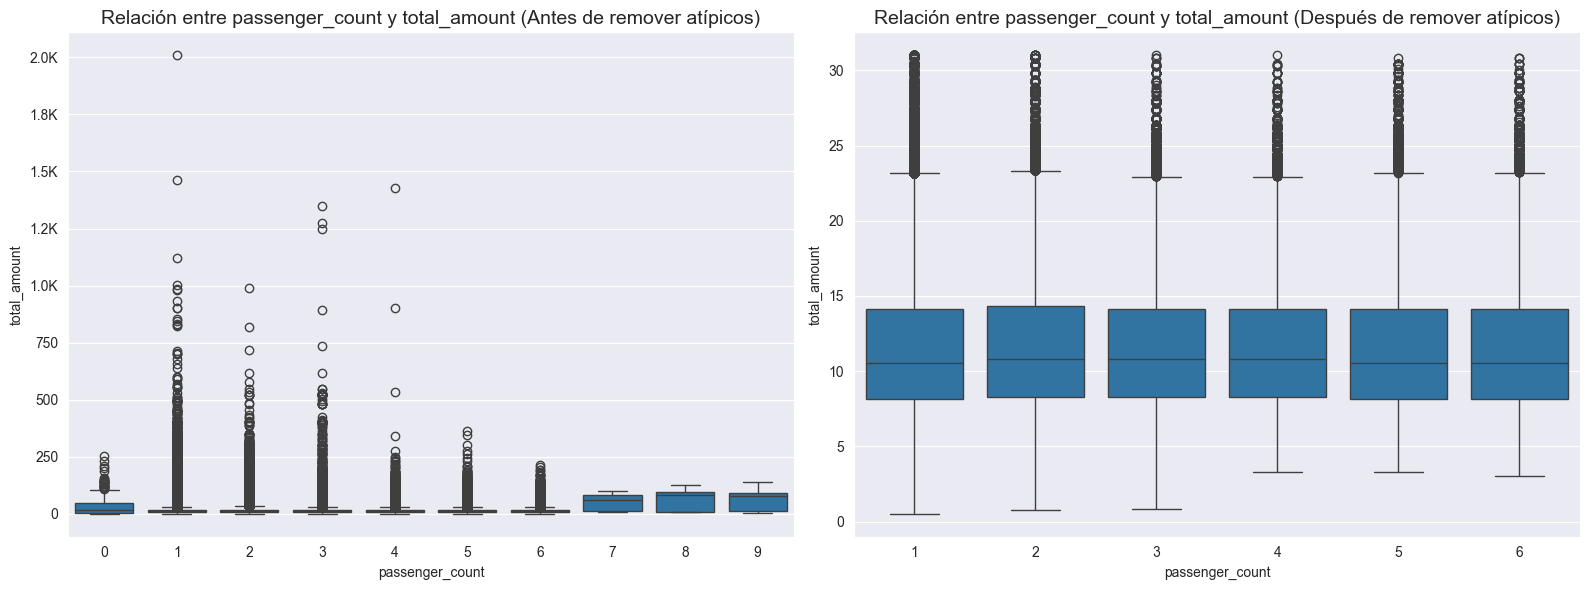

In [62]:
for col in vars_disc:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Before removing outliers
    sns.boxplot(data=data, x=col, y=target_var_num, ax=axs[0])
    axs[0].yaxis.set_major_formatter(formatter)
    axs[0].set_title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel(target_var_num)

    # After removing outliers
    sns.boxplot(data=data_cleaned, x=col, y=target_var_num, ax=axs[1])
    axs[1].yaxis.set_major_formatter(formatter)
    axs[1].set_title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(target_var_num)

    plt.tight_layout()
    plt.show()

**Relación entre `passenger_count` y `total_amount` (Antes y Después de remover atípicos)**

* **Antes de remover atípicos (izquierda):**
  Se observa una gran cantidad de valores extremos (outliers), especialmente en los conteos de pasajeros entre 1 y 6. Estos valores extremos (por encima de 1000 unidades monetarias) distorsionan la escala, dificultando el análisis de la distribución real del total pagado por número de pasajeros. Además, se observan categorías atípicas como `0` y `9`, que podrían indicar errores o datos mal registrados.

* **Después de remover atípicos (derecha):**
  La visualización mejora notablemente: los valores de `total_amount` se encuentran entre aproximadamente 1 y 30. Esto permite observar una distribución más clara y homogénea entre los distintos niveles de `passenger_count`. Las medianas y los rangos intercuartílicos son bastante similares entre categorías, lo que indica que el número de pasajeros no tiene una relación fuerte con el monto total pagado. También se han eliminado las categorías no válidas (como `0` y `9`), lo que mejora la calidad del análisis.


#### Paso 10.1.3: Análisis Bivariado: Relación con el Precio Total y Variables Continuas

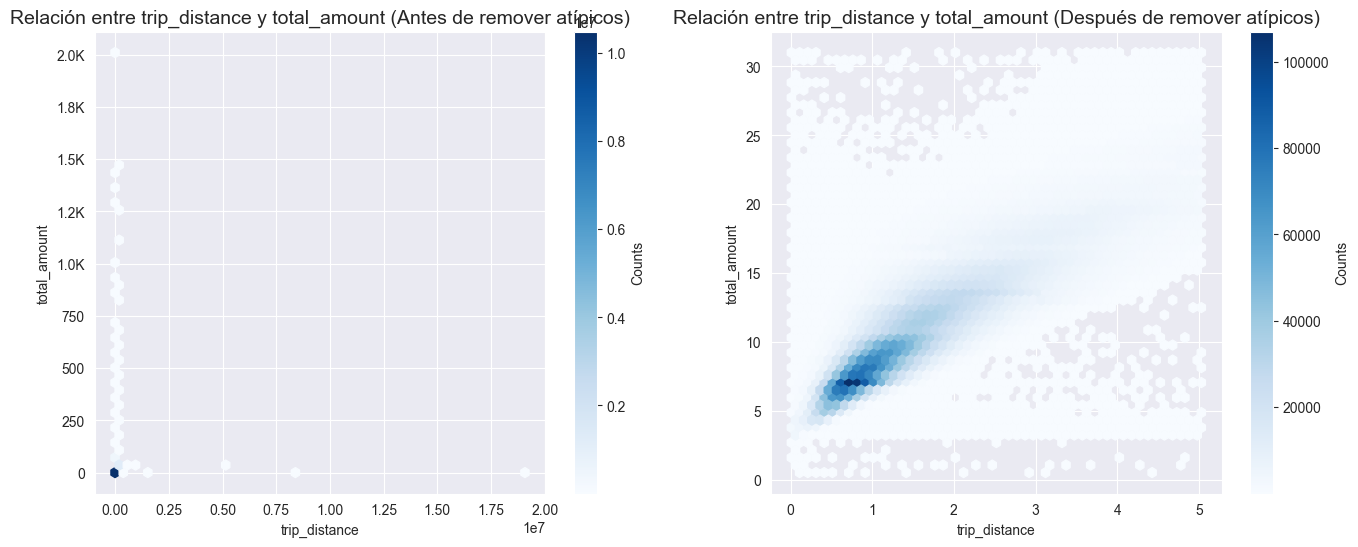

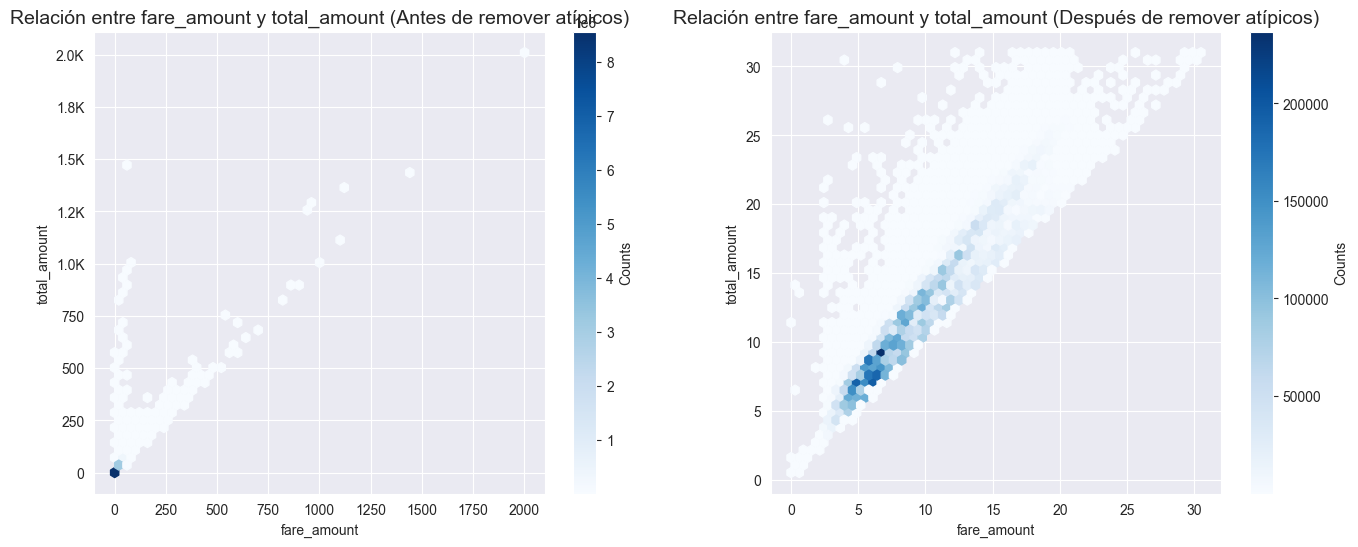

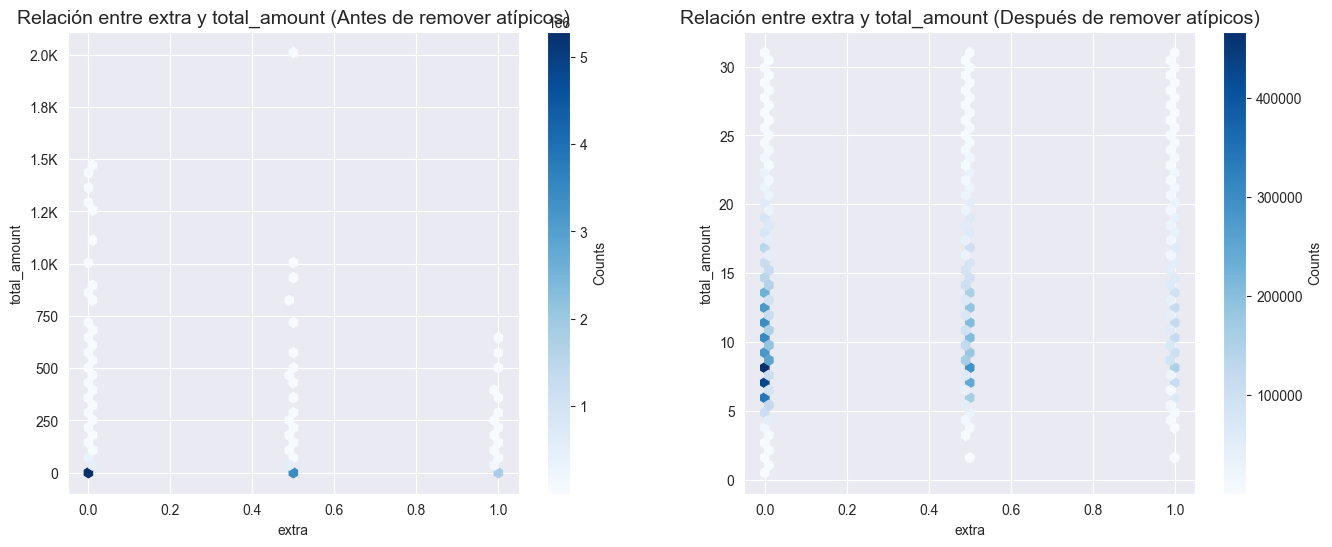

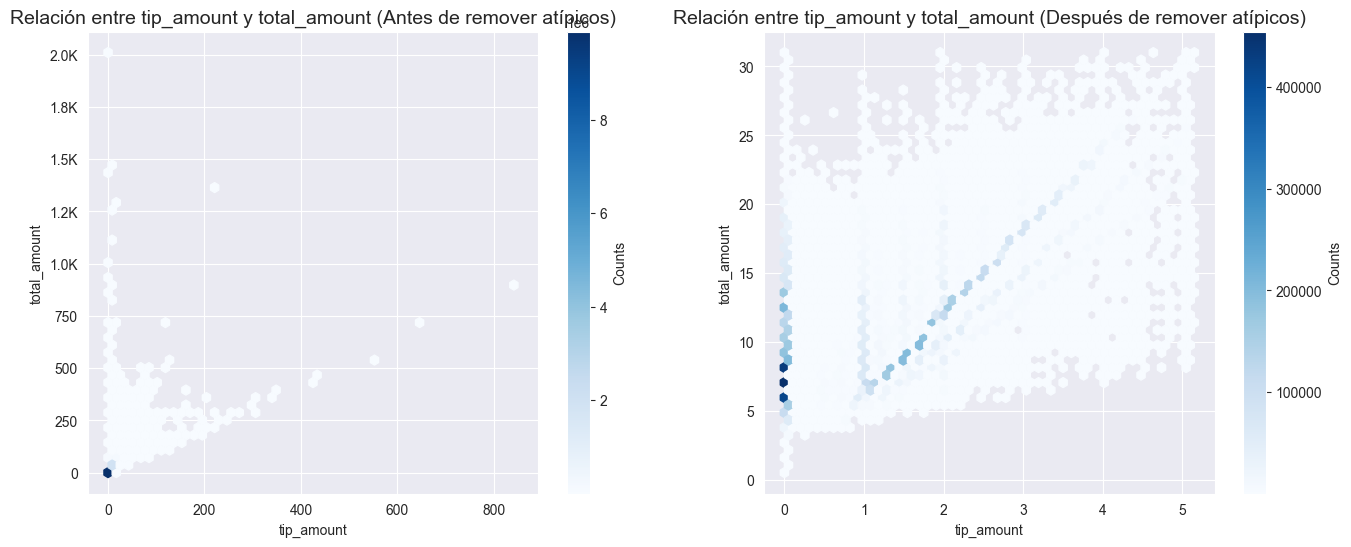

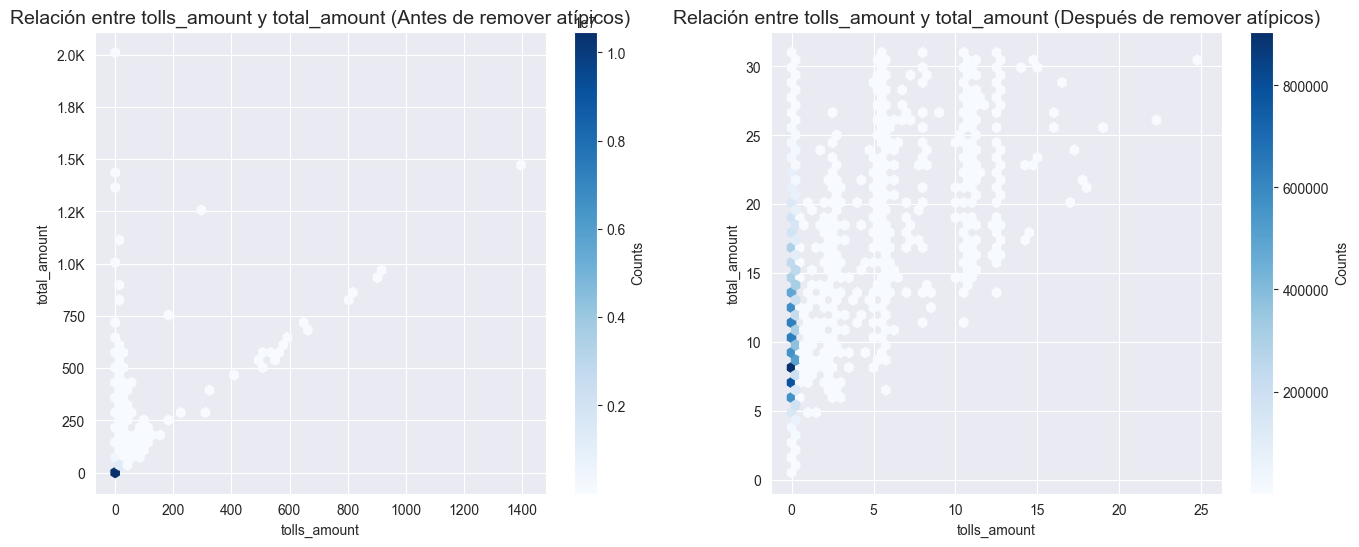

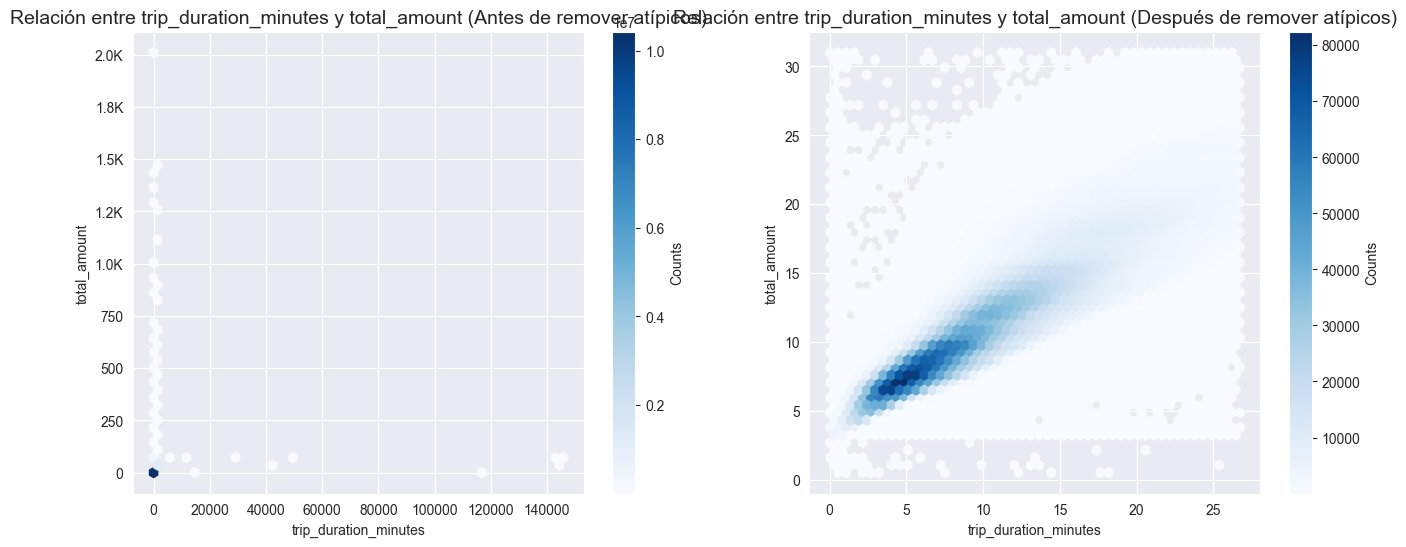

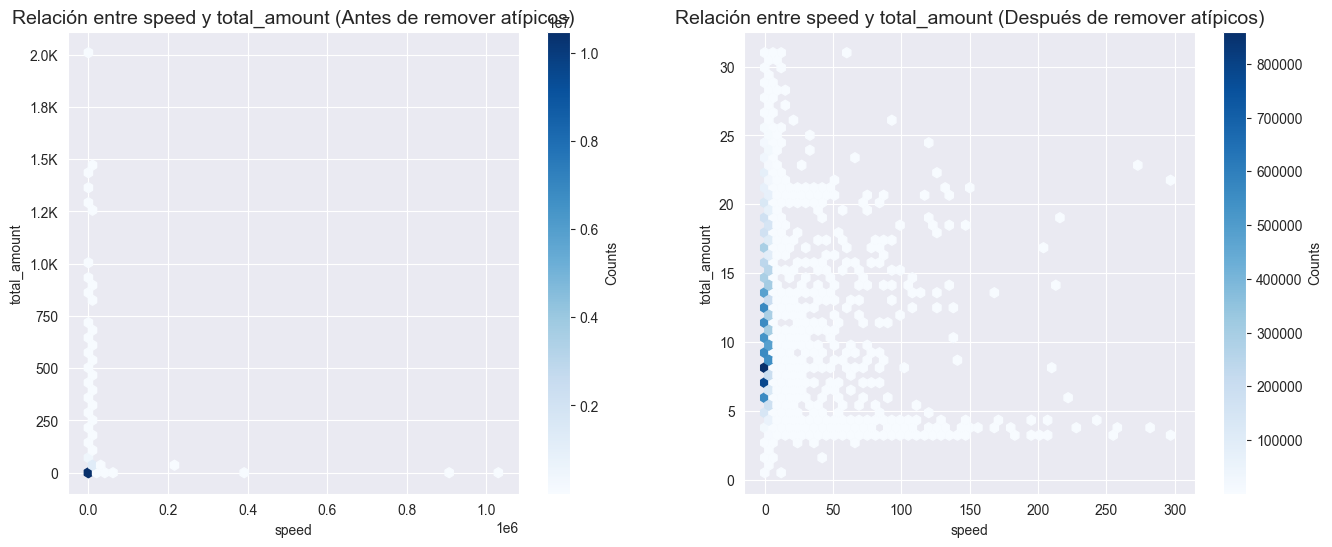

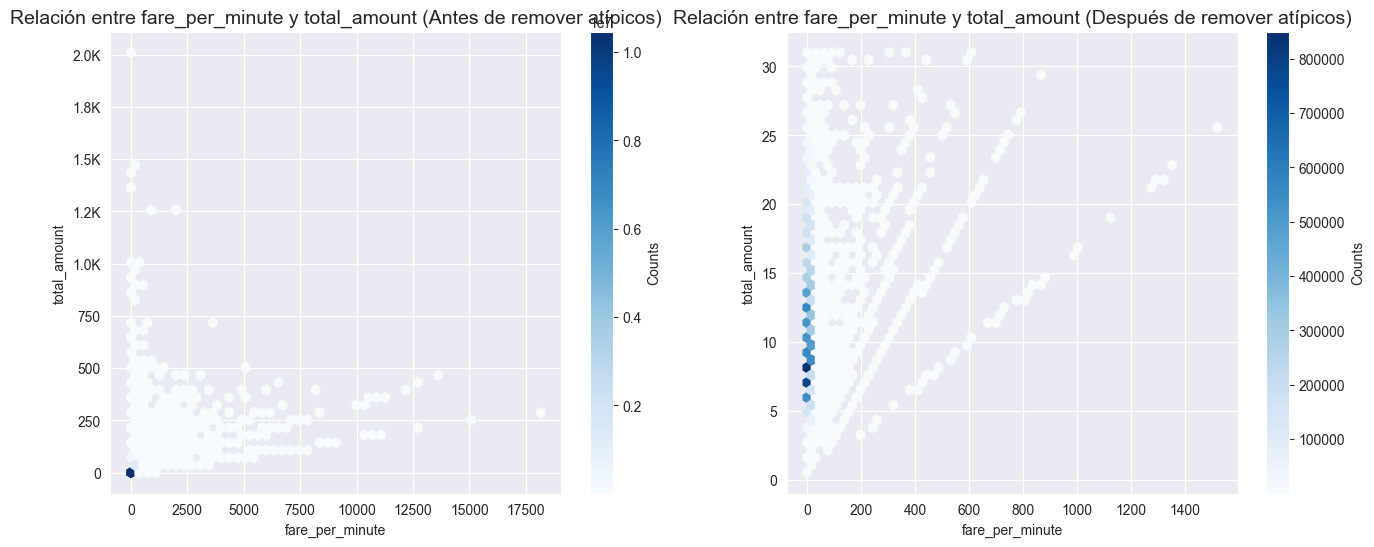

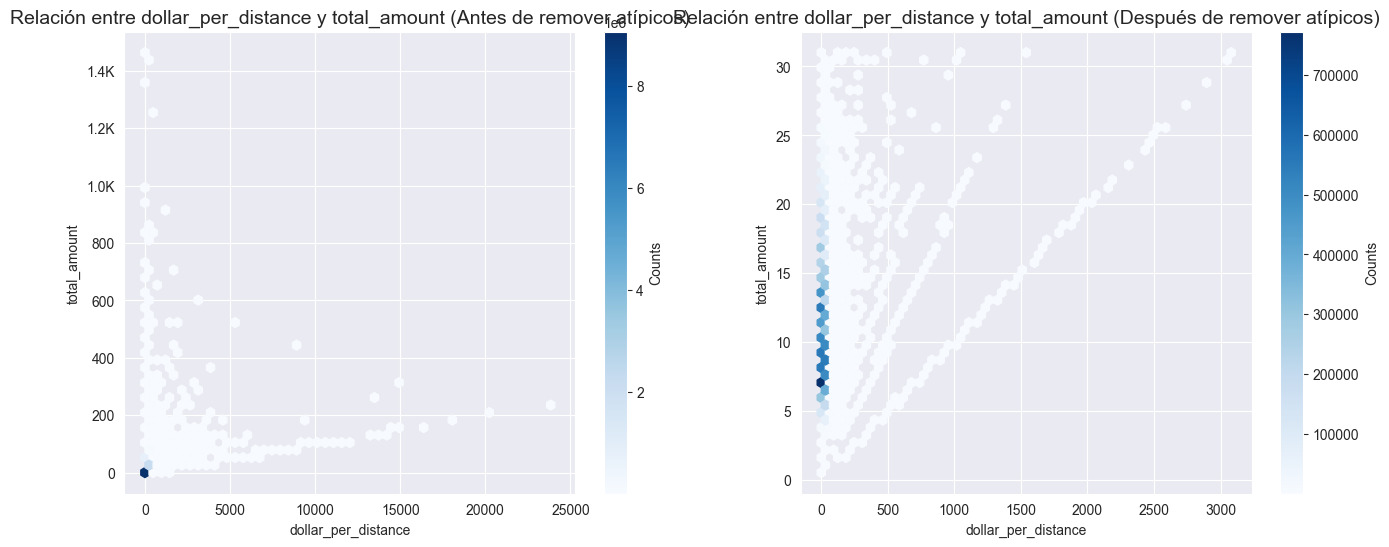

In [141]:
for col in vars_con:
    plt.figure(figsize=(16, 6))

    # Before removing outliers
    plt.subplot(1, 2, 1)
    plt.hexbin(data[col], data[target_var_num], gridsize=50, cmap='Blues', mincnt=1)
    plt.colorbar(label='Counts')
    plt.title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)
    plt.gca().yaxis.set_major_formatter(formatter)  # set formatter here

    # After removing outliers
    plt.subplot(1, 2, 2)
    plt.hexbin(data_cleaned[col], data_cleaned[target_var_num], gridsize=50, cmap='Blues', mincnt=1)
    plt.colorbar(label='Counts')
    plt.title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)
    plt.gca().yaxis.set_major_formatter(formatter)  # and here

    plt.show()


**Relación entre trip\_distance y total\_amount (Antes y Después de remover atípicos)**

La gráfica muestra una comparación visual entre los datos originales y los datos depurados en relación con la distancia del viaje (`trip_distance`) y el monto total cobrado (`total_amount`). En el gráfico de la izquierda, correspondiente a los datos **antes de remover atípicos**, se observa una dispersión caótica con valores extremos tanto en la distancia como en el monto, lo cual dificulta identificar una tendencia clara debido a la presencia de outliers que distorsionan la escala. Por otro lado, el gráfico de la derecha, que representa los datos **después de remover atípicos**, revela una relación más definida y coherente: a mayor distancia del viaje, mayor es el monto total cobrado, con la mayoría de los datos concentrados en viajes cortos y tarifas moderadas. Esta limpieza de datos permite visualizar una correlación positiva entre ambas variables y mejora significativamente la calidad del análisis.


**Relación entre extra y total_amount (Antes y Después de remover atípicos)**

La gráfica compara la relación entre la tarifa adicional (extra) y el monto total cobrado (total_amount) antes y después de eliminar valores atípicos. En el gráfico de la izquierda, que muestra los datos antes de remover atípicos, se observa una gran dispersión de valores de total_amount, incluso por encima de los 2000, para cada valor discreto de extra (0.0, 0.5, 1.0). Esta dispersión es causada por valores extremos que distorsionan la escala y dificultan el análisis. En contraste, el gráfico de la derecha, que presenta los datos después de remover atípicos, revela una distribución mucho más limpia y concentrada, donde los valores de extra siguen siendo discretos pero los montos se mantienen en rangos razonables. Se observa que, aunque el valor de extra puede influir ligeramente en el total_amount, su impacto es relativamente menor comparado con otras variables. La eliminación de atípicos permite una interpretación más precisa y realista del efecto de este cargo adicional en el monto total.

**Relación entre tip\_amount y total\_amount (Antes y Después de remover atípicos)**

La gráfica ilustra la relación entre el monto de propina (`tip_amount`) y el monto total cobrado (`total_amount`), comparando los datos **antes y después de eliminar valores atípicos**. En el panel izquierdo, los datos sin depurar muestran una alta dispersión, con valores extremos de propina que superan los 800 y montos totales superiores a 2000. Estos valores atípicos dificultan la identificación de una relación clara y distorsionan la escala del gráfico. En cambio, en el panel derecho, tras remover los atípicos, se revela una **relación positiva clara y lineal** entre la propina y el total cobrado: a medida que aumenta el monto de propina, también lo hace el monto total. La mayoría de los datos se concentran en propinas entre 0 y 5, lo que sugiere que los valores extremos eran poco representativos. Esta limpieza permite una visualización mucho más precisa y útil para el análisis de la relación entre estas variables.


**Relación entre tolls\_amount y total\_amount (Antes y Después de remover atípicos)**

Esta visualización muestra cómo se relacionan los montos de peajes (`tolls_amount`) con el monto total (`total_amount`) antes y después de eliminar los valores atípicos. En el gráfico de la izquierda, se observan valores extremos de peajes que superan los 1400, lo cual introduce gran dispersión y dificulta apreciar patrones. La densidad es muy baja en estos puntos, indicando que son casos excepcionales. Tras la eliminación de atípicos (gráfico de la derecha), se revela un comportamiento más natural y estructurado: la mayoría de los peajes se sitúan entre 0 y 15 dólares, con una relación positiva clara con el monto total. Es decir, a mayor `tolls_amount`, mayor suele ser el `total_amount`. La depuración permitió exponer esta relación lineal y concentrada, haciendo más fiable y representativa la visualización de los datos.


**Relación entre trip\_duration\_minutes y total\_amount (Antes y Después de remover atípicos)**

La relación entre la duración del viaje en minutos (`trip_duration_minutes`) y el monto total (`total_amount`) muestra diferencias drásticas antes y después de eliminar los valores atípicos. En el gráfico de la izquierda, se observan valores extremadamente altos de duración (hasta más de 140,000 minutos, es decir, más de 97 días), lo cual distorsiona completamente la visualización. Estos puntos dispersos y poco frecuentes ocultan la estructura real del conjunto de datos.

Una vez eliminados los atípicos (gráfico de la derecha), emerge una relación más clara y lógica: a mayor duración del viaje, mayor suele ser el monto total pagado, siguiendo una tendencia positiva con forma de abanico. La mayoría de los viajes tienen una duración entre 0 y 25 minutos, y los montos totales oscilan en su mayoría entre 5 y 20 dólares. Este comportamiento más denso y concentrado refleja mejor la distribución real del fenómeno, facilitando el análisis y la modelación de los datos.


**Relación entre la velocidad (en millas por hora) y el total\_amount**

Antes de remover los valores atípicos, la relación entre la velocidad y el total\_amount estaba completamente distorsionada por registros erróneos que mostraban velocidades absurdamente altas, superiores al millón de millas por hora, lo cual es físicamente imposible y evidencia errores en los datos, probablemente causados por divisiones entre duraciones de viaje muy pequeñas. Tras la limpieza de datos, la velocidad se distribuye en un rango más realista, concentrándose entre 0 y 60 mph, con algunos valores extremos hasta 300 mph que aún podrían ser revisados. En este nuevo escenario, aunque no se observa una relación lineal clara entre velocidad y el costo total del viaje, se revela un patrón más confiable donde la mayoría de los viajes urbanos tienen velocidades moderadas y montos totales coherentes, permitiendo una interpretación más precisa y útil del comportamiento del sistema de transporte.


## Paso 11: Análisis multivariado

### Paso 11.1: Análisis de Correlación

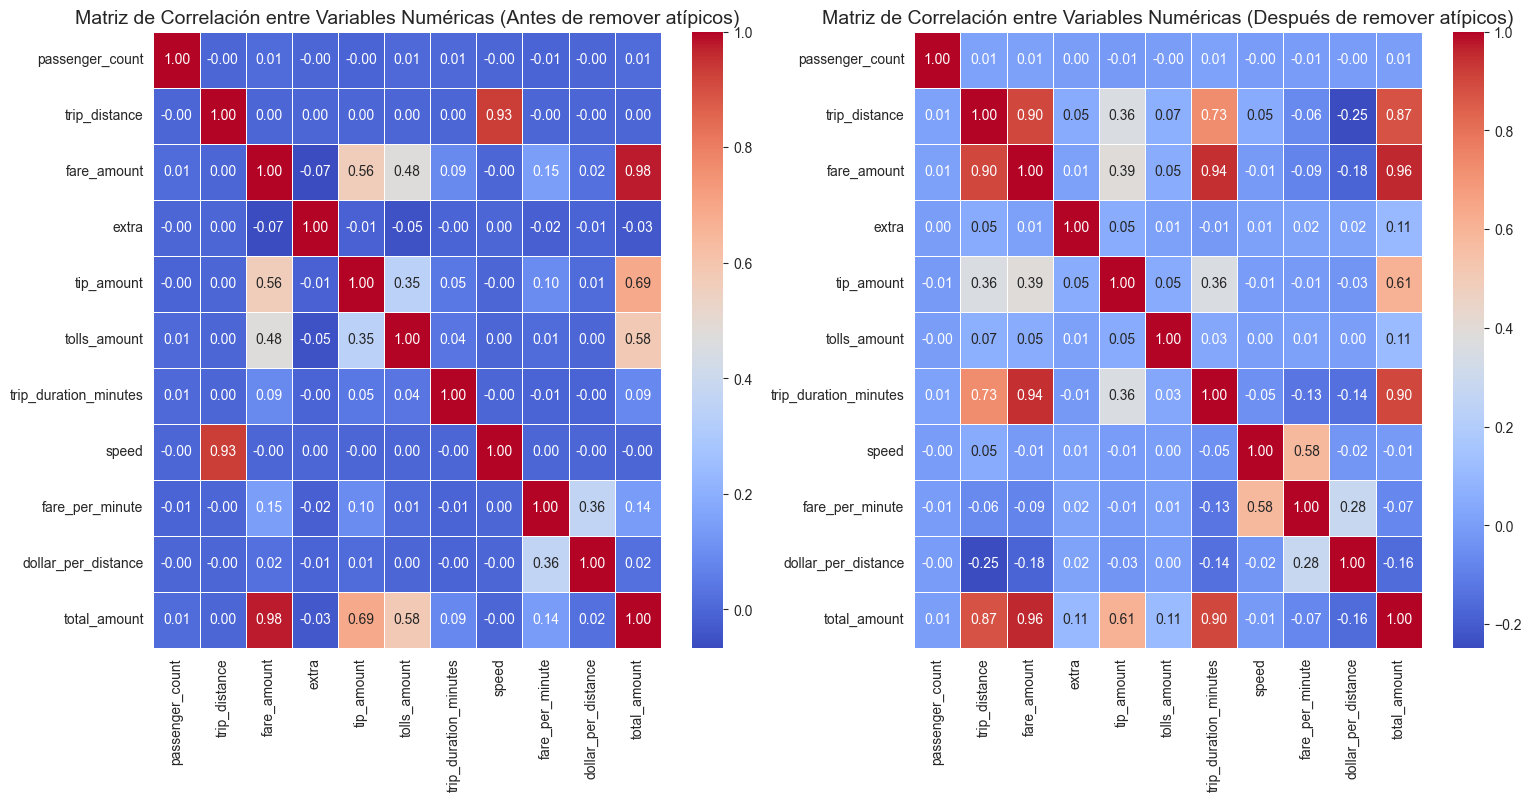

In [129]:
correlation_matrix = data[vars_nums + [target_var_num]].corr()
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas (Antes de remover atípicos)", fontsize=14)

correlation_matrix_cleaned = data_cleaned[vars_nums + [target_var_num]].corr()
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas (Después de remover atípicos)", fontsize=14)
plt.show()

**Matriz de Correlación entre Variables Numéricas: Interpretación centrada en `total_amount`**

Al observar la variable `total_amount` y su relación con las demás variables numéricas, se nota una mejora sustancial en la claridad y fuerza de las correlaciones tras remover los valores atípicos. Antes de la limpieza, la correlación entre `total_amount` y otras variables clave como `fare_amount` (0.98), `tip_amount` (0.69) y `tolls_amount` (0.58) ya era considerable, pero otras relaciones relevantes estaban debilitadas por datos extremos y erróneos, como con `trip_duration_minutes` (0.09) y `trip_distance` (0.14).

Después de eliminar los atípicos, las correlaciones se vuelven más coherentes y significativas. `total_amount` muestra una correlación muy fuerte con `fare_amount` (0.96), lo que tiene sentido, ya que el total pagado depende en gran medida de la tarifa base. También se fortalecen las correlaciones con `trip_distance` (0.87) y `trip_duration_minutes` (0.90), indicando que, al eliminar viajes anómalos, el total pagado se alinea mucho mejor con la distancia recorrida y el tiempo del viaje. La relación con `tip_amount` (0.61) se mantiene moderada, lo cual es lógico ya que las propinas pueden variar según el cliente, y con `tolls_amount` (0.11) se vuelve más débil pero razonable, dado que no todos los viajes incurren en peajes.

En resumen, tras la limpieza de datos, `total_amount` refleja de manera más precisa su dependencia con las variables que lo componen o afectan directamente, permitiendo análisis más fiables y modelos más precisos.


## Paso 12: Pruebas de Hipótesis

## Paso 12: Modelamiento

### Paso 12.1: Modelo de regresión lineal múltiple

#### Paso 12.1.1: Preparación de los datos

In [66]:
data.head()

passenger_count  trip_distance     RatecodeID  payment_type  fare_amount  \
0                1           2.50  Standard rate             1          9.0   
1                1           2.90  Standard rate             1         11.0   
2                2          19.98  Standard rate             1         54.5   
3                3          10.78  Standard rate             1         31.5   
4                5          30.43         Newark             1         98.0   

   extra  tip_amount  tolls_amount  total_amount  trip_duration_minutes  \
0    0.5        2.05          0.00         12.35               7.916667   
1    0.5        3.05          0.00         15.35              11.100000   
2    0.5        8.00          0.00         63.80              31.100000   
3    0.0        3.78          5.54         41.62               0.000000   
4    0.0        0.00         15.50        113.80               0.000000   

  trip_distance_quantile trip_duration_minutes_interval     speed  \
0                   long                       5-10 min  0.315789   
1                   long                      10-15 min  0.261261   
2              very long               more than 25 min  0.642444   
3              very long                less than 5 min       inf   
4              very long                less than 5 min       inf   

   fare_per_minute  dollar_per_distance improvement_surcharge_cat  \
0         1.560000             4.940000                       0.3   
1         1.382883             5.293103                       0.3   
2         2.051447             3.193193                       0.3   
3              inf             3.860853                       0.3   
4              inf             3.739731                       0.3   

  amount_range tip_amount_categories extra_categories  
0        10-15                   2-3              0.5  
1        15-20                   3-4              0.5  
2          30+                    5+              0.5  
3          30+                   3-4              0.0  
4          30+                   0-1              0.0

In [67]:
data_cleaned.head()

passenger_count  trip_distance     RatecodeID  payment_type  fare_amount  \
0                 1           2.50  Standard rate             1          9.0   
1                 1           2.90  Standard rate             1         11.0   
8                 1           0.70  Standard rate             1          5.5   
10                2           0.54  Standard rate             2          4.0   
11                1           1.70  Standard rate             2          8.0   

    extra  tip_amount  tolls_amount  total_amount  trip_duration_minutes  \
0     0.5        2.05           0.0         12.35               7.916667   
1     0.5        3.05           0.0         15.35              11.100000   
8     0.5        2.00           0.0          8.80               4.983333   
10    0.5        0.00           0.0          5.30               2.033333   
11    0.5        0.00           0.0          9.30               7.783333   

   trip_distance_quantile trip_duration_minutes_interval     speed  \
0                    long                       5-10 min  0.315789   
1                    long                      10-15 min  0.261261   
8              very short                less than 5 min  0.140468   
10             very short                less than 5 min  0.265574   
11                 medium                       5-10 min  0.218415   

    fare_per_minute  dollar_per_distance improvement_surcharge_cat  \
0          1.560000             4.940000                       0.3   
1          1.382883             5.293103                       0.3   
8          1.765886            12.571429                       0.3   
10         2.606557             9.814815                       0.3   
11         1.194861             5.470588                       0.3   

   amount_range tip_amount_categories extra_categories  
0         10-15                   2-3              0.5  
1         15-20                   3-4              0.5  
8          5-10                   2-3              0.5  
10         5-10                   0-1              0.5  
11         5-10                   0-1              0.5

In [68]:
data_encoded = data.copy()

In [70]:
# Replace common missing value markers with NaN
missing_markers = ["NA", "?", "", "N/A", "null", -999, "NaN", "inf", "-inf"]
data_encoded = data_encoded.replace(missing_markers, np.nan)
data_encoded = data_encoded.replace([np.inf, -np.inf], np.nan)

# Now drop NaN
data_encoded = data_encoded.dropna()

C:\Users\guill\AppData\Local\Temp\ipykernel_33748\662064107.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace(missing_markers, np.nan)


In [71]:
# Check NaN/null in X
print("NaN/null in X:", data_encoded.isnull().sum().sum())

NaN/null in X: 0


In [72]:
print("Remaining inf values:", np.isinf(data_encoded.select_dtypes(include=np.number)).sum().sum())

Remaining inf values: 0


In [73]:
data_cleaned_encoded = data_cleaned.copy()

In [74]:
data_encoded = pd.get_dummies(data_encoded, columns=vars_cat, drop_first=True)

In [75]:
data_cleaned_encoded = pd.get_dummies(data_cleaned_encoded, columns=vars_cat, drop_first=True)

In [76]:
data_encoded.head()

passenger_count  trip_distance  fare_amount  extra  tip_amount  \
0                1           2.50          9.0    0.5        2.05   
1                1           2.90         11.0    0.5        3.05   
2                2          19.98         54.5    0.5        8.00   
7                1           6.20         20.5    0.5        0.00   
8                1           0.70          5.5    0.5        2.00   

   tolls_amount  total_amount  trip_duration_minutes     speed  \
0           0.0         12.35               7.916667  0.315789   
1           0.0         15.35              11.100000  0.261261   
2           0.0         63.80              31.100000  0.642444   
7           0.0         21.80              16.050000  0.386293   
8           0.0          8.80               4.983333  0.140468   

   fare_per_minute  ...  trip_duration_minutes_interval_less than 5 min  \
0         1.560000  ...                                           False   
1         1.382883  ...                                           False   
2         2.051447  ...                                           False   
7         1.358255  ...                                           False   
8         1.765886  ...                                            True   

  trip_duration_minutes_interval_more than 25 min  \
0                                           False   
1                                           False   
2                                            True   
7                                           False   
8                                           False   

   improvement_surcharge_cat_0.3  tip_amount_categories_1-2  \
0                           True                      False   
1                           True                      False   
2                           True                      False   
7                           True                      False   
8                           True                      False   

   tip_amount_categories_2-3  tip_amount_categories_3-4  \
0                       True                      False   
1                      False                       True   
2                      False                      False   
7                      False                      False   
8                       True                      False   

   tip_amount_categories_4-5  tip_amount_categories_5+  extra_categories_0.5  \
0                      False                     False                  True   
1                      False                     False                  True   
2                      False                      True                  True   
7                      False                     False                  True   
8                      False                     False                  True   

   extra_categories_1.0  
0                 False  
1                 False  
2                 False  
7                 False  
8                 False  

[5 rows x 37 columns]

In [77]:
data_cleaned_encoded.head()

passenger_count  trip_distance  fare_amount  extra  tip_amount  \
0                 1           2.50          9.0    0.5        2.05   
1                 1           2.90         11.0    0.5        3.05   
8                 1           0.70          5.5    0.5        2.00   
10                2           0.54          4.0    0.5        0.00   
11                1           1.70          8.0    0.5        0.00   

    tolls_amount  total_amount  trip_duration_minutes     speed  \
0            0.0         12.35               7.916667  0.315789   
1            0.0         15.35              11.100000  0.261261   
8            0.0          8.80               4.983333  0.140468   
10           0.0          5.30               2.033333  0.265574   
11           0.0          9.30               7.783333  0.218415   

    fare_per_minute  ...  trip_duration_minutes_interval_less than 5 min  \
0          1.560000  ...                                           False   
1          1.382883  ...                                           False   
8          1.765886  ...                                            True   
10         2.606557  ...                                            True   
11         1.194861  ...                                           False   

   trip_duration_minutes_interval_more than 25 min  \
0                                            False   
1                                            False   
8                                            False   
10                                           False   
11                                           False   

    improvement_surcharge_cat_0.3  tip_amount_categories_1-2  \
0                            True                      False   
1                            True                      False   
8                            True                      False   
10                           True                      False   
11                           True                      False   

    tip_amount_categories_2-3  tip_amount_categories_3-4  \
0                        True                      False   
1                       False                       True   
8                        True                      False   
10                      False                      False   
11                      False                      False   

    tip_amount_categories_4-5  tip_amount_categories_5+  extra_categories_0.5  \
0                       False                     False                  True   
1                       False                     False                  True   
8                       False                     False                  True   
10                      False                     False                  True   
11                      False                     False                  True   

    extra_categories_1.0  
0                  False  
1                  False  
8                  False  
10                 False  
11                 False  

[5 rows x 37 columns]

#### Paso 12.1.2: Regresión Lineal Múltiple

##### Paso 12.1.2.1: Entrenamiento

In [78]:
log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1, validate=True)

In [79]:
X = data_encoded.drop(columns=[target_var_num, "fare_amount", target_var_cat])
y = data_encoded[target_var_num]

In [80]:
# Check NaN/null in X
print("NaN/null in X:", X.isnull().sum().sum())

# Check NaN/null in y
print("NaN/null in y:", y.isnull().sum())

NaN/null in X: 0
NaN/null in y: 0


In [81]:
X_cleaned_complete = data_cleaned_encoded.drop(columns=[target_var_num, "fare_amount", target_var_cat])
y_cleaned_complete = data_cleaned_encoded[target_var_num]

In [82]:
sample_size = 100000
np.random.seed(42)
sample_indices = np.random.choice(X_cleaned_complete.shape[0], sample_size, replace=False)

X_sample = X_cleaned_complete.iloc[sample_indices]
y_sample = y_cleaned_complete.iloc[sample_indices]

# Linear model
reg = LinearRegression()

# Build and fit SFS
sfs = SFS(
    reg,
    k_features='best',  # select the best subset
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5
)

sfs = sfs.fit(X_sample, y_sample)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    5.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    5.4s finished

[2025-05-30 05:35:05] Features: 1/34 -- score: 0.8100495603612966[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    3.5s finished

[2025-05-30 05:35:08] Features: 2/34 -- score: 0.9135331286251238[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  32 | elapsed:    3.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    3.5s finished

[2025-05-30 05:35:12] Features: 3/34 -- score: 0.9812935686624623[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of

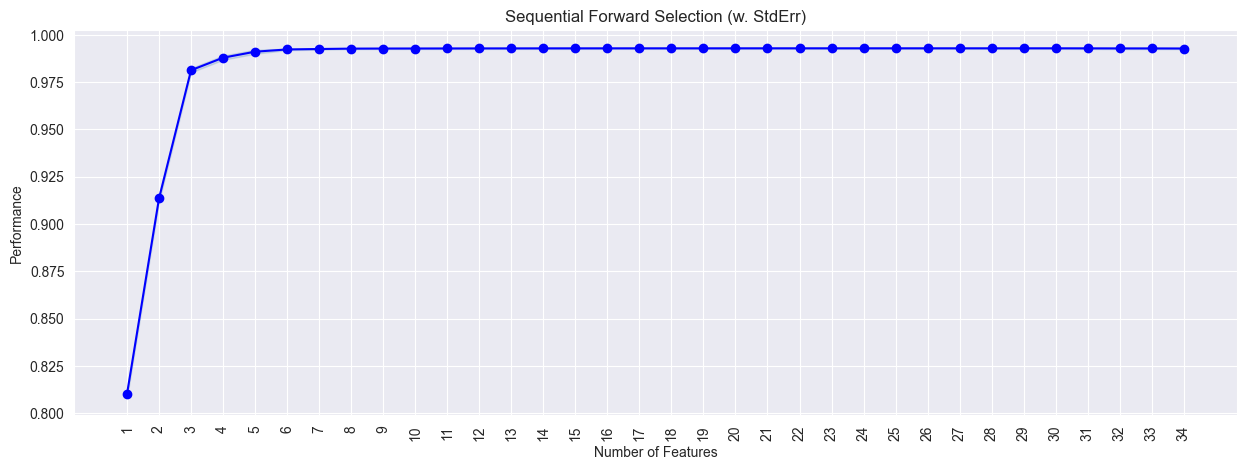

In [83]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

In [84]:
# Observar las varaibles importantes de stepforward
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 7, 8, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 31]


In [85]:
# Show names of the selected features
selected_features = list(sfs.k_feature_names_)
print("Selected features:")
for feature in selected_features:
    print(f"- {feature}")


Selected features:
- passenger_count
- trip_distance
- extra
- tip_amount
- tolls_amount
- trip_duration_minutes
- fare_per_minute
- dollar_per_distance
- RatecodeID_Newark
- RatecodeID_Standard rate
- payment_type_3
- trip_distance_quantile_medium
- trip_distance_quantile_short
- trip_distance_quantile_very long
- trip_distance_quantile_very short
- trip_duration_minutes_interval_15-20 min
- trip_duration_minutes_interval_20-25 min
- trip_duration_minutes_interval_5-10 min
- trip_duration_minutes_interval_less than 5 min
- trip_duration_minutes_interval_more than 25 min
- tip_amount_categories_1-2
- tip_amount_categories_3-4
- tip_amount_categories_5+


In [86]:
X_cleaned_complete.columns[feat_cols]

Index(['passenger_count', 'trip_distance', 'extra', 'tip_amount',
       'tolls_amount', 'trip_duration_minutes', 'fare_per_minute',
       'dollar_per_distance', 'RatecodeID_Newark', 'RatecodeID_Standard rate',
       'payment_type_3', 'trip_distance_quantile_medium',
       'trip_distance_quantile_short', 'trip_distance_quantile_very long',
       'trip_distance_quantile_very short',
       'trip_duration_minutes_interval_15-20 min',
       'trip_duration_minutes_interval_20-25 min',
       'trip_duration_minutes_interval_5-10 min',
       'trip_duration_minutes_interval_less than 5 min',
       'trip_duration_minutes_interval_more than 25 min',
       'tip_amount_categories_1-2', 'tip_amount_categories_3-4',
       'tip_amount_categories_5+'],
      dtype='object')

In [87]:
X_cleaned = data_cleaned_encoded[selected_features]

y_cleaned = data_cleaned_encoded[target_var_num]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [90]:
X_train_cleaned_complete, X_test_cleaned_complete, y_train_cleaned_complete, y_test_cleaned_complete = train_test_split(X_cleaned_complete, y_cleaned_complete, test_size=0.2, random_state=42)

In [93]:
X_cleaned_complete_logistic =  data_cleaned_encoded.drop(columns=[target_var_num, "fare_amount", target_var_cat])
y_cleaned_complete_logistic = data_cleaned_encoded[target_var_cat]
X_train_cleaned_complete_logistic, X_test_cleaned_complete_logistic, y_train_cleaned_complete_logistic, y_test_cleaned_complete_logistic = train_test_split(X_cleaned_complete_logistic, y_cleaned_complete_logistic, test_size=0.2, random_state=42)

In [94]:
from sklearn.model_selection import RandomizedSearchCV
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, title, param_dist=None, n_iter=50):
    """
    Train and evaluate a model with optional hyperparameter tuning using RandomizedSearchCV

    Args:
        model: sklearn model or pipeline
        X_train, X_test, y_train, y_test: training and test data
        title: model name for identification
        param_dist: dictionary of parameter distributions to sample
        n_iter: number of parameter settings to sample

    Returns:
        y_pred_train, y_pred_test, title, metrics, best_params
    """
    best_params = None

    # Hyperparameter tuning if param_dist is provided
    if param_dist is not None:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)

            search = RandomizedSearchCV(
                model,
                param_dist,
                cv=5,
                scoring='r2',
                n_iter=n_iter,
                random_state=42,
                error_score='raise'
            )
            search.fit(X_train, y_train)
            model = search.best_estimator_
            best_params = search.best_params_
            print(f"Best parameters for {title}: {best_params}")

    # Training (or using the best estimator from search)
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics calculation
    metrics = {
        "MAE_Train": mean_absolute_error(y_train, y_pred_train),
        "RMSE_Train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "R2_Train": r2_score(y_train, y_pred_train),
        "MAE_Test": mean_absolute_error(y_test, y_pred_test),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "R2_Test": r2_score(y_test, y_pred_test)
    }

    return y_pred_train, y_pred_test, title, metrics, best_params

In [95]:
# Define hyperparameter grids
param_distributions = {

}


In [110]:
from sklearn.ensemble import RandomForestRegressor
# Base models
# A helper function for log transformation of features
def log1p_transform(X):
    return np.log1p(X)

# A helper function for power transformation (e.g., for Box-Cox like effects on features)
# Note: For optimal Box-Cox on features, you'd fit it per feature.
# Here, we're just showing a general power function, which can be experimented with.
# For example, square root transform on features
def sqrt_transform(X):
    return np.sqrt(X)
from sklearn.preprocessing import PolynomialFeatures
# Features to transform
selected_features = ["trip_distance", "trip_duration_minutes"]

# Base models
base_models = {
    # Linear Regression
    "Regresión Lineal Múltiple": make_pipeline(StandardScaler(), LinearRegression()),

    # New Random Forest model with optimized settings
    #"Random Forest": make_pipeline(
    #    RandomForestRegressor(
    #        n_estimators=100,
    #        max_depth=10,
    #        min_samples_split=5,
    #        random_state=42,
    #        n_jobs=-1  # Use all available cores
    #    )
    #),

    "Regresión Lineal (Features Transformados con Cuantiles - Normal)": make_pipeline(
        QuantileTransformer(output_distribution='normal', random_state=42),
        StandardScaler(),
        LinearRegression()
    ),

    "Regresión Lineal (Target Transformado con Logaritmo)": make_pipeline(
        StandardScaler(),
        TransformedTargetRegressor(
            regressor=LinearRegression(),
            func=np.log1p,
            inverse_func=np.expm1
        )
    ),

    #"Regresión Lineal (Target Transformado con Raíz Cuadrada)": make_pipeline(
    #    StandardScaler(),
    #    TransformedTargetRegressor(
    #        regressor=LinearRegression(),
    #        func=np.sqrt,
    #        inverse_func=lambda x: x**2
    #   )
    #),

    # Gamma Regressor
    # "Regresor Gamma": make_pipeline(StandardScaler(), GammaRegressor()),

    #"Regresor Gamma (Features Transformados con Logaritmo)": make_pipeline(
    #    FunctionTransformer(log1p_transform, validate=True),
    #    StandardScaler(),
    #    GammaRegressor()
    #),

    #"Regresor Gamma (Features Transformados con Cuantiles - Normal)": make_pipeline(
    #    QuantileTransformer(output_distribution='normal', random_state=42),
    #    StandardScaler(),
    #    GammaRegressor()
    #),
}

results = []

In [112]:
model_outputs = {}
best_params_all = {}

for name, model in base_models.items():
    print(f"\nTraining model: {name}")
    params = param_distributions.get(name, None)  # Get params if they exist

    # Store results for all dataset versions
    model_results = {}

    # Define datasets to evaluate (original, cleaned_3var, cleaned_full)
    datasets = {
        "Original": (X_train, X_test, y_train, y_test),
        "Processed": (X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned),
        "Processed_Full": (X_train_cleaned_complete, X_test_cleaned_complete,
                          y_train_cleaned_complete, y_test_cleaned_complete)
    }

    for dataset_name, (X_tr, X_te, y_tr, y_te) in datasets.items():
        # Train & evaluate WITH tuning (if params exist)
        y_train_pred, y_pred_test, title, metrics, best_params = train_and_evaluate_model(
            model, X_tr, X_te, y_tr, y_te,
            f"{name} - {dataset_name}",
            param_dist=params,  # RandomizedSearchCV runs only if params is not None
            n_iter=30
        )

        # Save results
        results.append({"Model": f"{name} - {dataset_name}", **metrics})
        model_results[dataset_name] = (y_te, y_pred_test, y_te - y_pred_test, title)

        # Store best params (if tuning was done)
        if best_params:
            best_params_all[f"{name}_{dataset_name}"] = best_params

    # Save outputs for analysis
    model_outputs[name] = model_results


Training model: Regresión Lineal Múltiple

Training model: Regresión Lineal (Features Transformados con Cuantiles - Normal)

Training model: Regresión Lineal (Target Transformado con Logaritmo)


##### Paso 12.1.2.2: Prueba de Supuestos

###### Paso 12.1.2.2.1: Prueba de Linealidad


📈 Pruebas de Linealidad para modelo: Regresión Lineal Múltiple

• Regresión Lineal Múltiple - Original:
  Correlación Spearman pred-resid: -0.0825 (p=0.0000)
    ❌ Posible no-linealidad
  Test Rainbow (R² mitad/R² total): 1.0019
    ✅ Linealidad adecuada


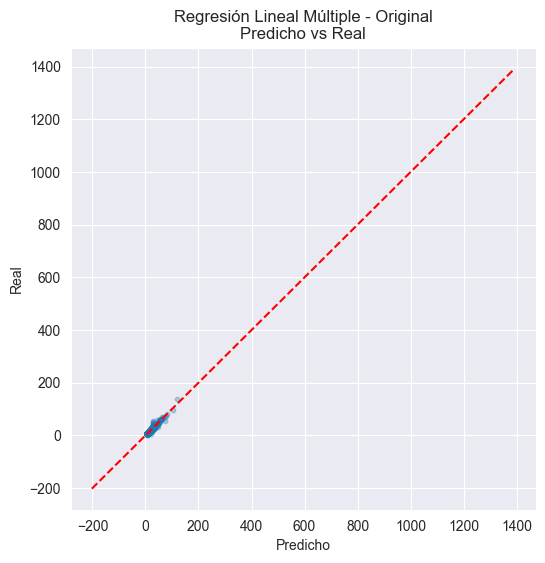

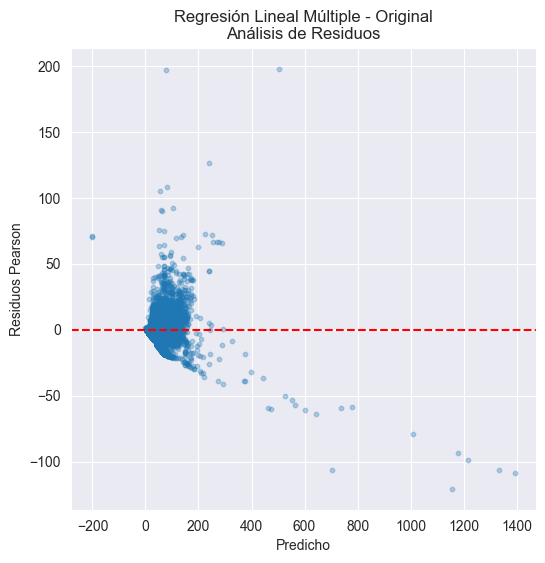


• Regresión Lineal Múltiple - Processed:
  Correlación Spearman pred-resid: 0.0111 (p=0.0000)
    ❌ Posible no-linealidad
  Test Rainbow (R² mitad/R² total): 1.0001
    ✅ Linealidad adecuada


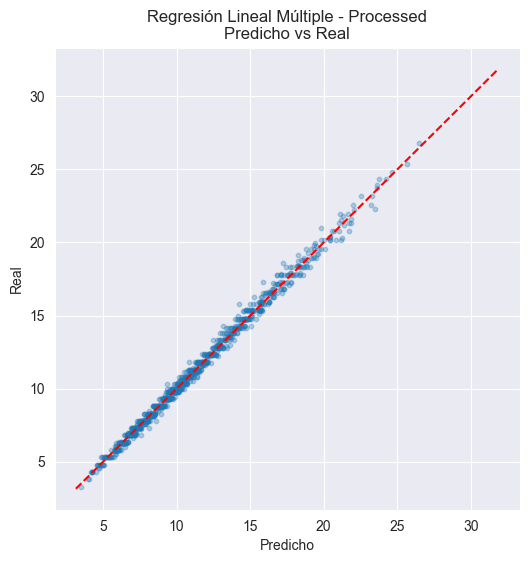

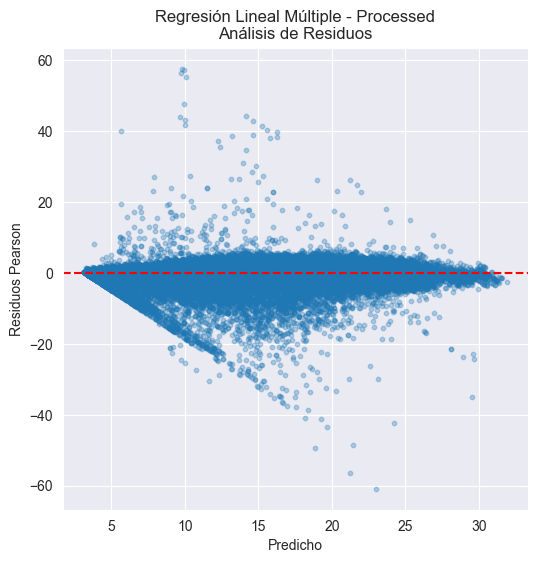


• Regresión Lineal Múltiple - Processed_Full:
  Correlación Spearman pred-resid: 0.0124 (p=0.0000)
    ❌ Posible no-linealidad
  Test Rainbow (R² mitad/R² total): 1.0001
    ✅ Linealidad adecuada


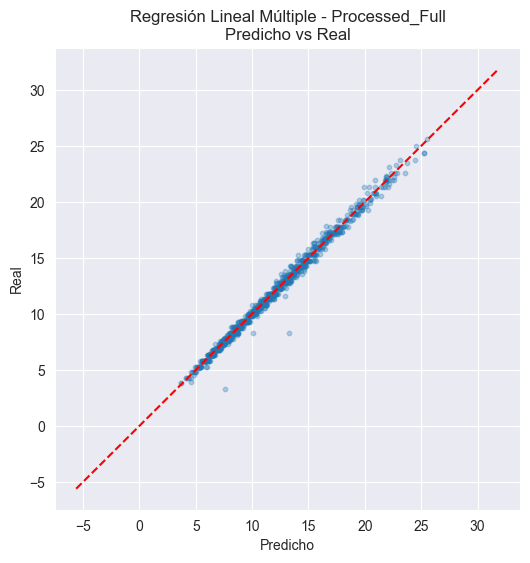

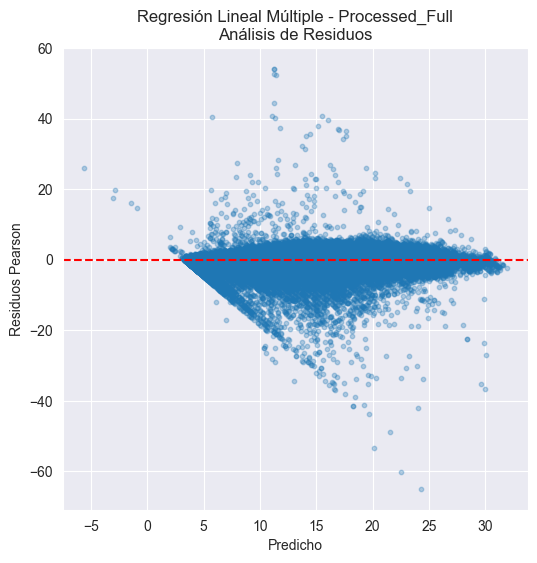


📈 Pruebas de Linealidad para modelo: Regresión Lineal (Features Transformados con Cuantiles - Normal)

• Regresión Lineal (Features Transformados con Cuantiles - Normal) - Original:
  Correlación Spearman pred-resid: -0.2677 (p=0.0000)
    ❌ Posible no-linealidad
  Test Rainbow (R² mitad/R² total): 1.0060
    ✅ Linealidad adecuada


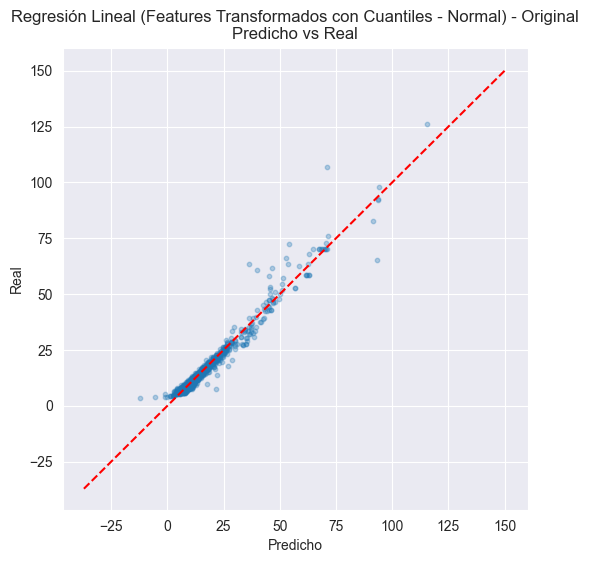

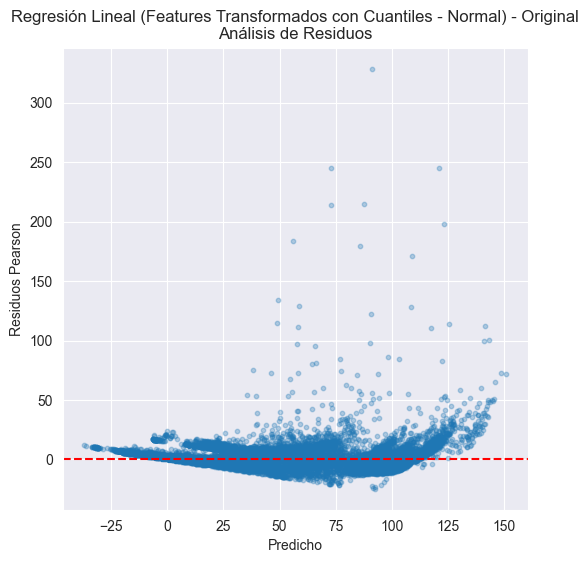


• Regresión Lineal (Features Transformados con Cuantiles - Normal) - Processed:
  Correlación Spearman pred-resid: 0.0072 (p=0.0000)
    ❌ Posible no-linealidad
  Test Rainbow (R² mitad/R² total): 1.0001
    ✅ Linealidad adecuada


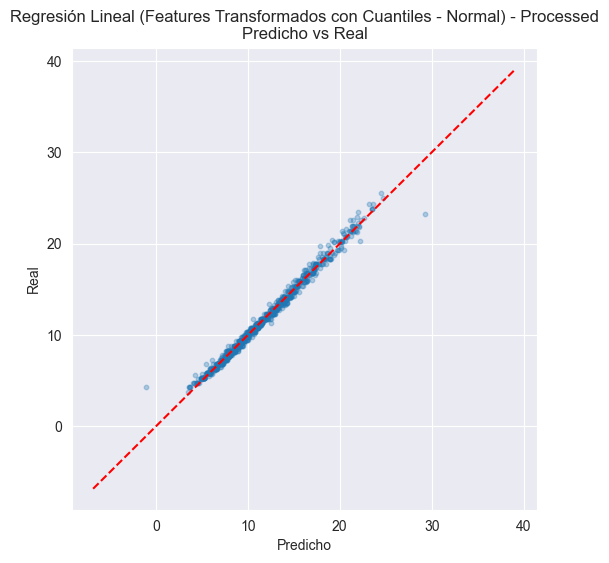

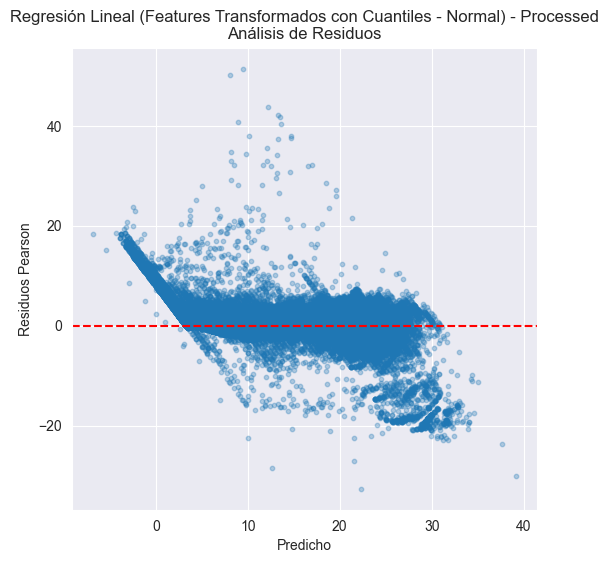


• Regresión Lineal (Features Transformados con Cuantiles - Normal) - Processed_Full:
  Correlación Spearman pred-resid: 0.0391 (p=0.0000)
    ❌ Posible no-linealidad
  Test Rainbow (R² mitad/R² total): 1.0001
    ✅ Linealidad adecuada


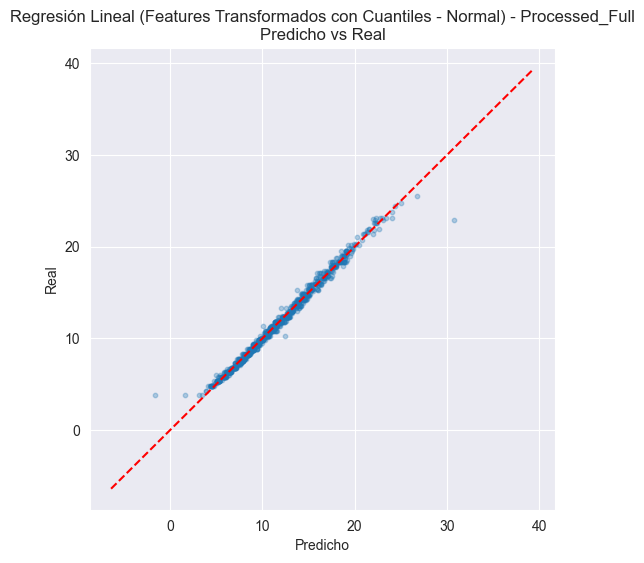

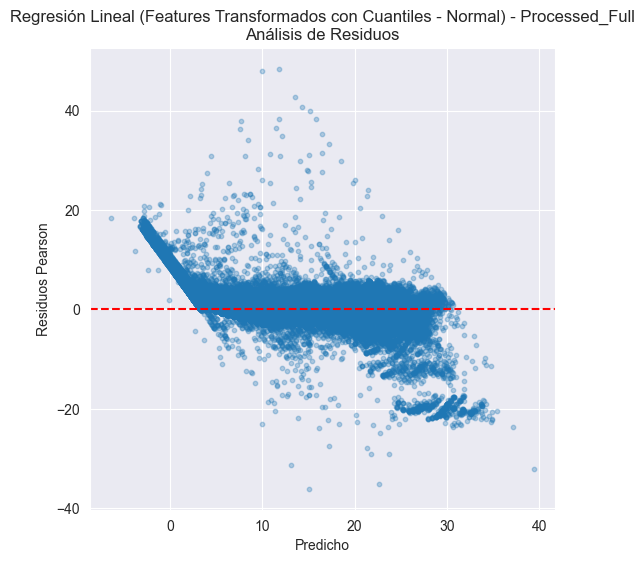


📈 Pruebas de Linealidad para modelo: Regresión Lineal (Target Transformado con Logaritmo)

• Regresión Lineal (Target Transformado con Logaritmo) - Original:
  Correlación Spearman pred-resid: -0.0476 (p=0.0000)
    ❌ Posible no-linealidad
  Test Rainbow (R² mitad/R² total): 0.0007
    ❌ Posible no-linealidad


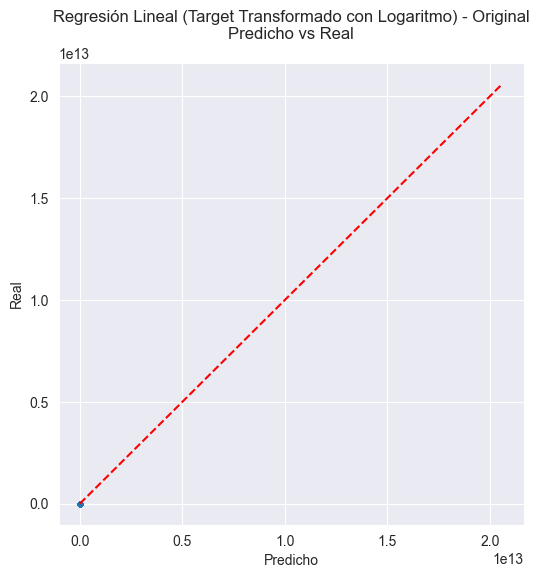

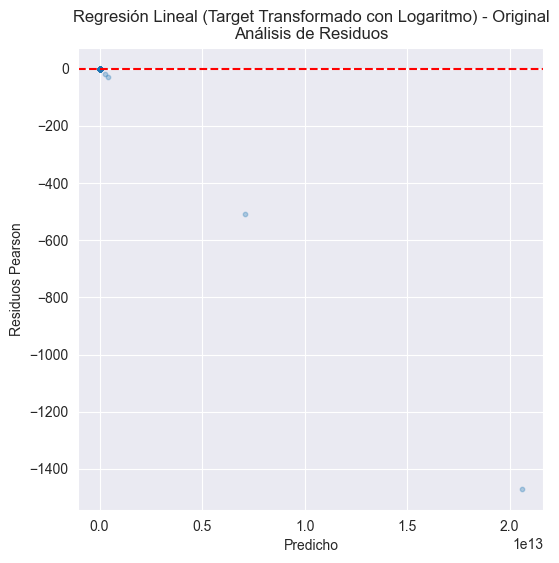


• Regresión Lineal (Target Transformado con Logaritmo) - Processed:
  Correlación Spearman pred-resid: -0.0162 (p=0.0000)
    ❌ Posible no-linealidad
  Test Rainbow (R² mitad/R² total): 1.0002
    ✅ Linealidad adecuada


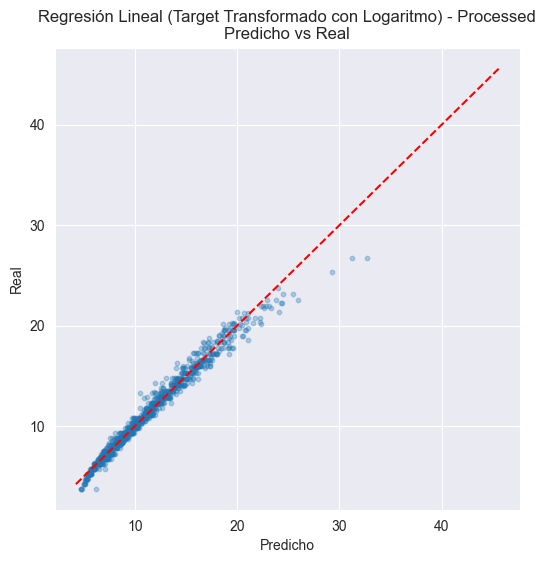

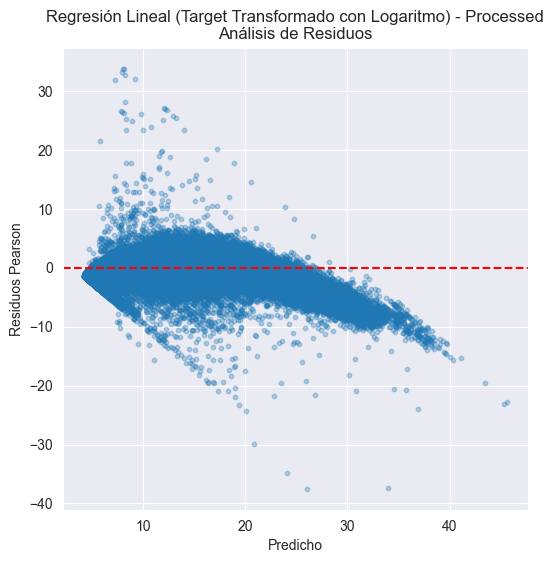


• Regresión Lineal (Target Transformado con Logaritmo) - Processed_Full:
  Correlación Spearman pred-resid: -0.0407 (p=0.0000)
    ❌ Posible no-linealidad
  Test Rainbow (R² mitad/R² total): 1.0002
    ✅ Linealidad adecuada


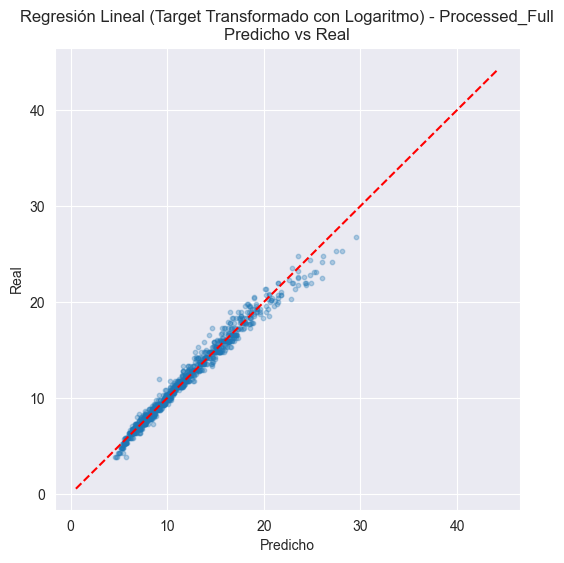

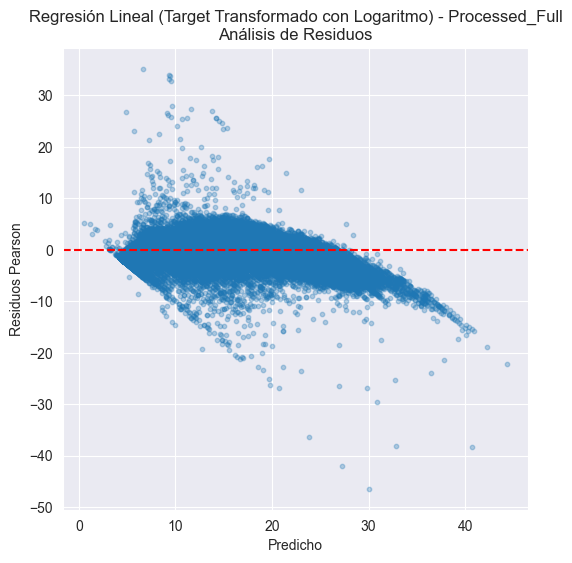

In [114]:
import numpy as np
from scipy.stats import spearmanr
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from numba import njit

@njit
def fast_pearson_residuals(y_true, y_pred):
    """Cálculo acelerado de residuos de Pearson"""
    residuals = y_true - y_pred
    return residuals / np.std(residuals)

for name, outputs in model_outputs.items():
    print(f"\n📈 Pruebas de Linealidad para modelo: {name}")

    for key, (y_true, y_pred, residuals, title) in outputs.items():
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)

        print(f"\n• {title}:")

        # 1. Coeficiente de Spearman (no lineal)
        spr, p_value = spearmanr(y_pred, residuals)
        print(f"  Correlación Spearman pred-resid: {spr:.4f} (p={p_value:.4f})")
        print("    ✅ Relación lineal" if p_value > 0.05 else "    ❌ Posible no-linealidad")

        # 2. Test Rainbow (optimizado)
        n = len(y_true)
        n_half = n // 2
        r2_full = r2_score(y_true, y_pred)
        r2_half = r2_score(y_true[:n_half], y_pred[:n_half])

        rainbow_ratio = r2_half / r2_full if r2_full != 0 else 1.0
        print(f"  Test Rainbow (R² mitad/R² total): {rainbow_ratio:.4f}")
        print("    ✅ Linealidad adecuada" if 0.9 <= rainbow_ratio <= 1.1 else "    ❌ Posible no-linealidad")

        # 3. Gráfico acelerado parcial (muestreo para grandes datasets)
        if n > 1000:
            idx = np.random.choice(n, 1000, replace=False)
            y_true_plot = y_true[idx]
            y_pred_plot = y_pred[idx]
        else:
            y_true_plot = y_true
            y_pred_plot = y_pred

        plt.figure(figsize=(6, 6))
        plt.scatter(y_pred_plot, y_true_plot, alpha=0.3, s=10)
        plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'r--')
        plt.xlabel("Predicho")
        plt.ylabel("Real")
        plt.title(f"{title}\nPredicho vs Real")
        plt.show()

        # 4. Residuos de Pearson (acelerado)
        presiduals = fast_pearson_residuals(y_true, y_pred)
        plt.figure(figsize=(6, 6))
        plt.scatter(y_pred, presiduals, alpha=0.3, s=10)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel("Predicho")
        plt.ylabel("Residuos Pearson")
        plt.title(f"{title}\nAnálisis de Residuos")
        plt.show()

###### Paso 12.1.2.2.2: Prueba de Normalidad


📊 Análisis de residuos para modelo: Regresión Lineal Múltiple


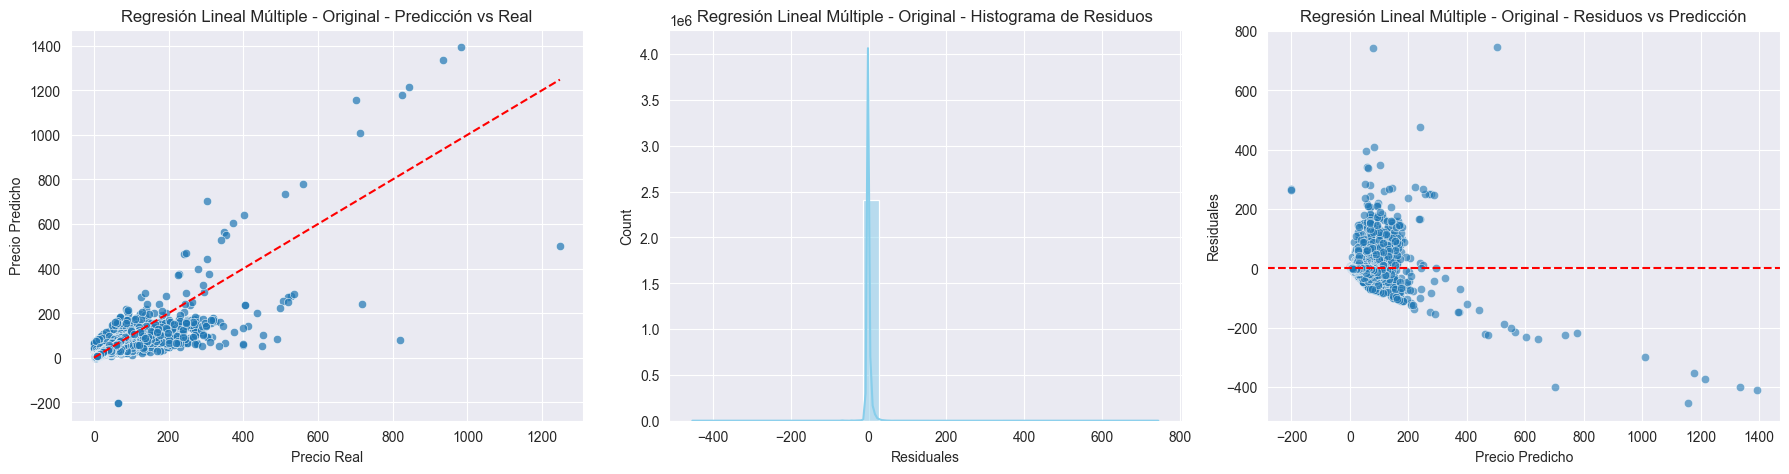

Regresión Lineal Múltiple - Original → Kolmogorov-Smirnov: estadístico=0.2424, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


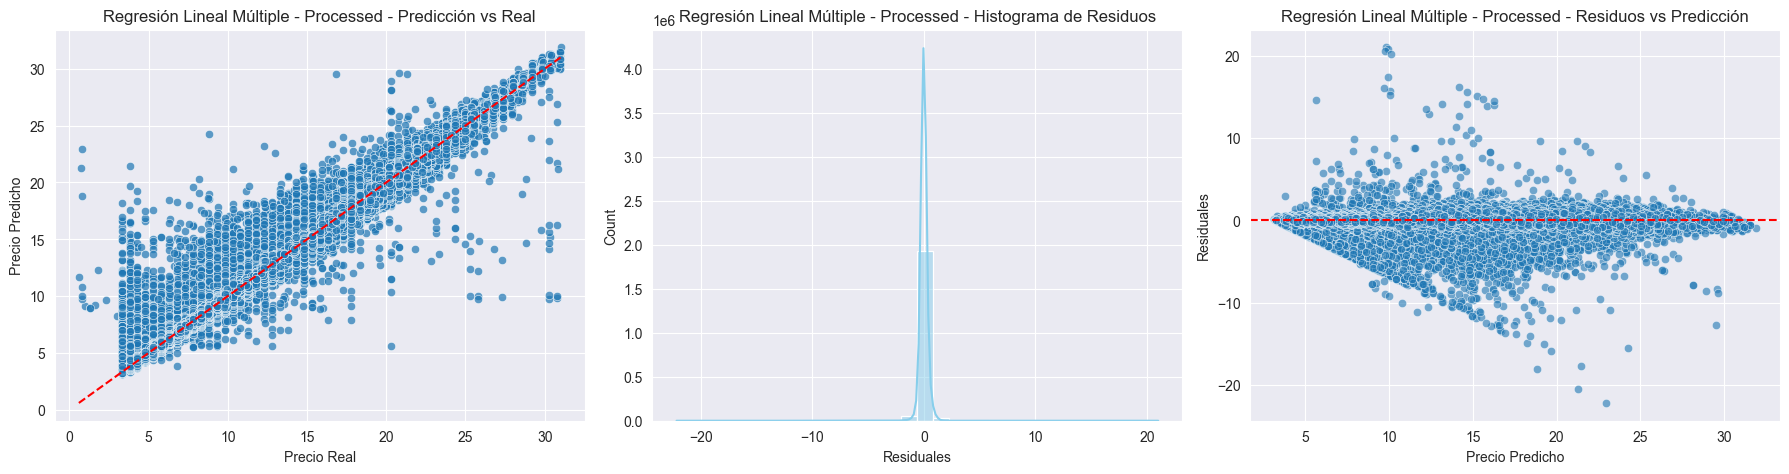

Regresión Lineal Múltiple - Processed → Kolmogorov-Smirnov: estadístico=0.0670, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


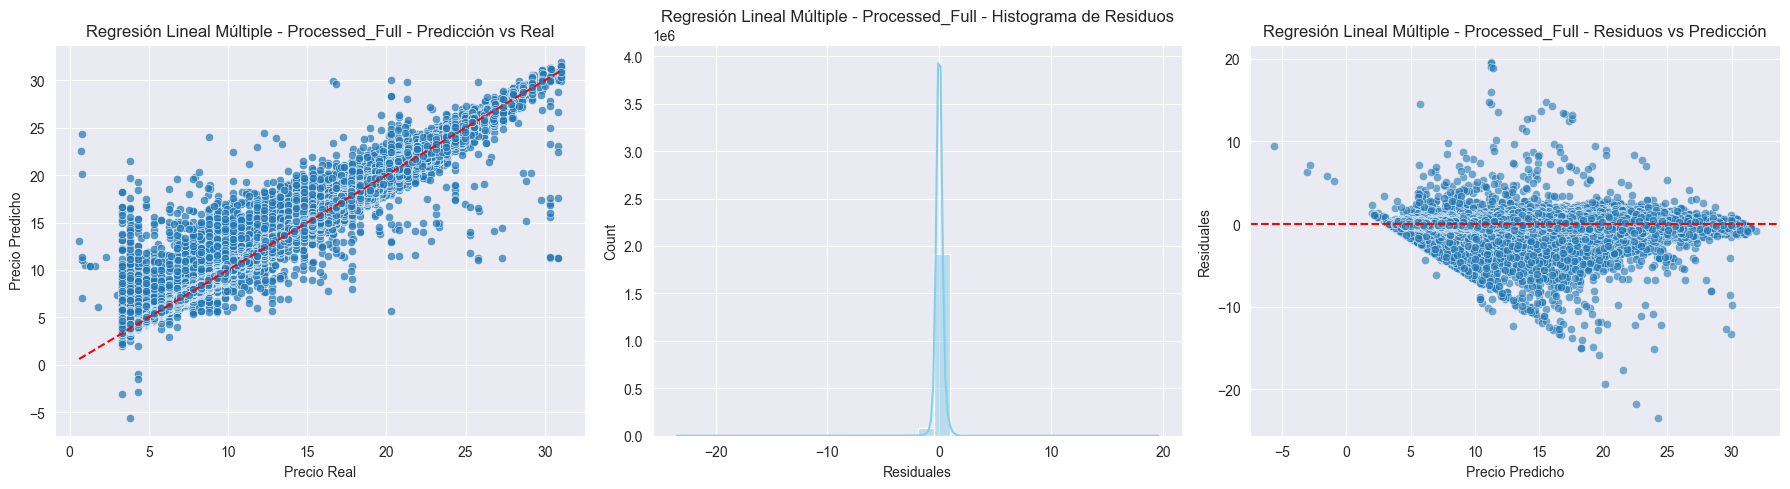

Regresión Lineal Múltiple - Processed_Full → Kolmogorov-Smirnov: estadístico=0.0647, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.

📊 Análisis de residuos para modelo: Regresión Lineal (Features Transformados con Cuantiles - Normal)


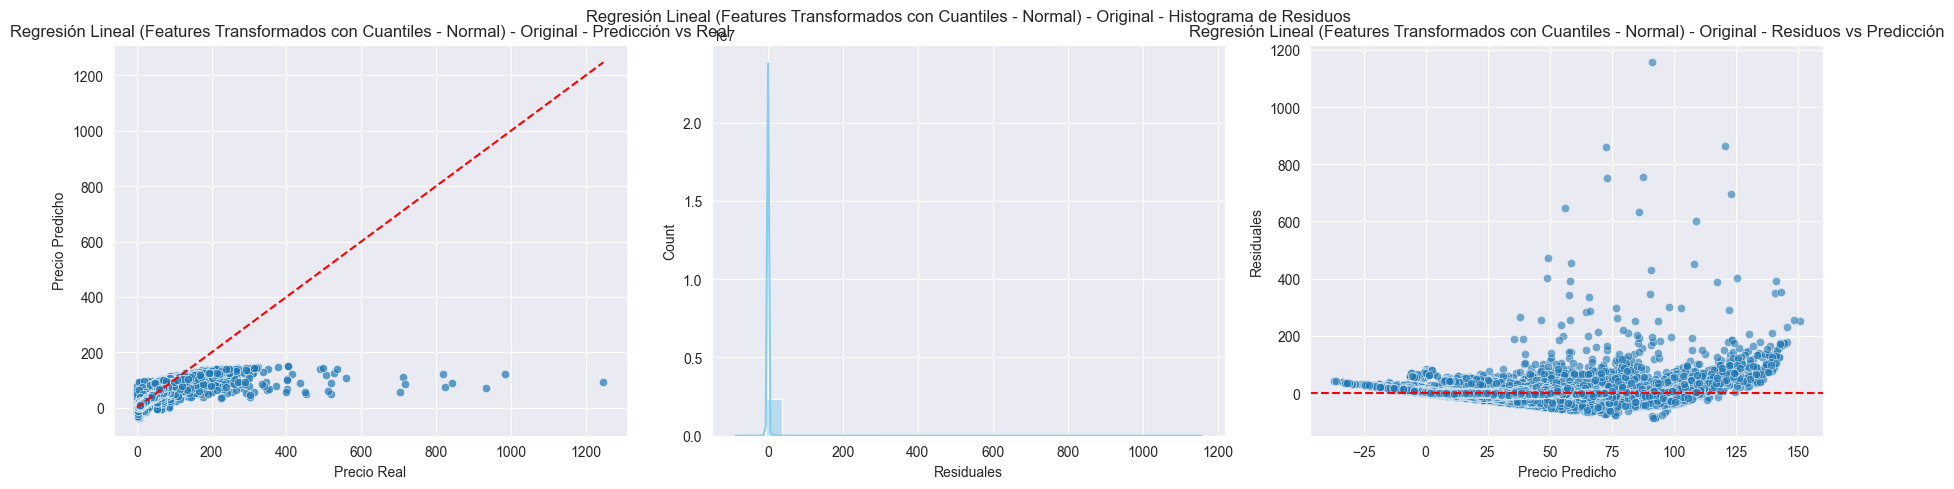

Regresión Lineal (Features Transformados con Cuantiles - Normal) - Original → Kolmogorov-Smirnov: estadístico=0.2146, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


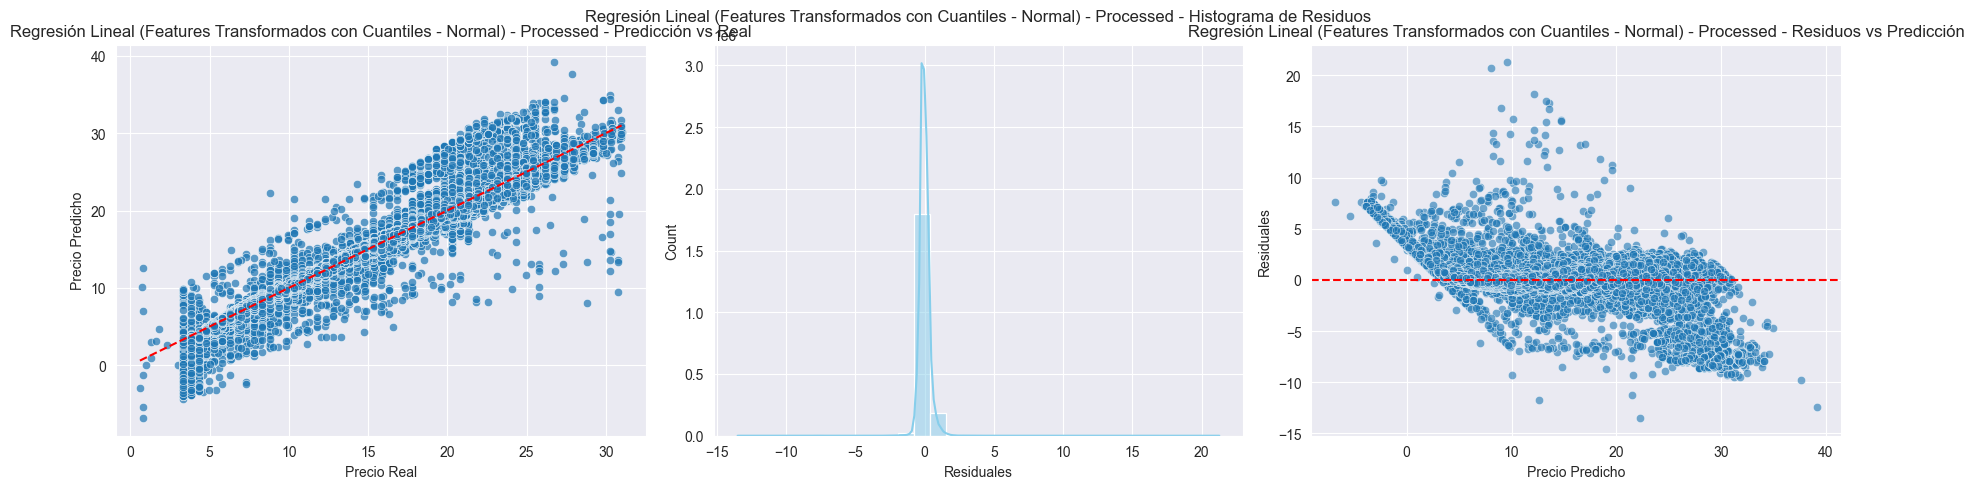

Regresión Lineal (Features Transformados con Cuantiles - Normal) - Processed → Kolmogorov-Smirnov: estadístico=0.0810, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


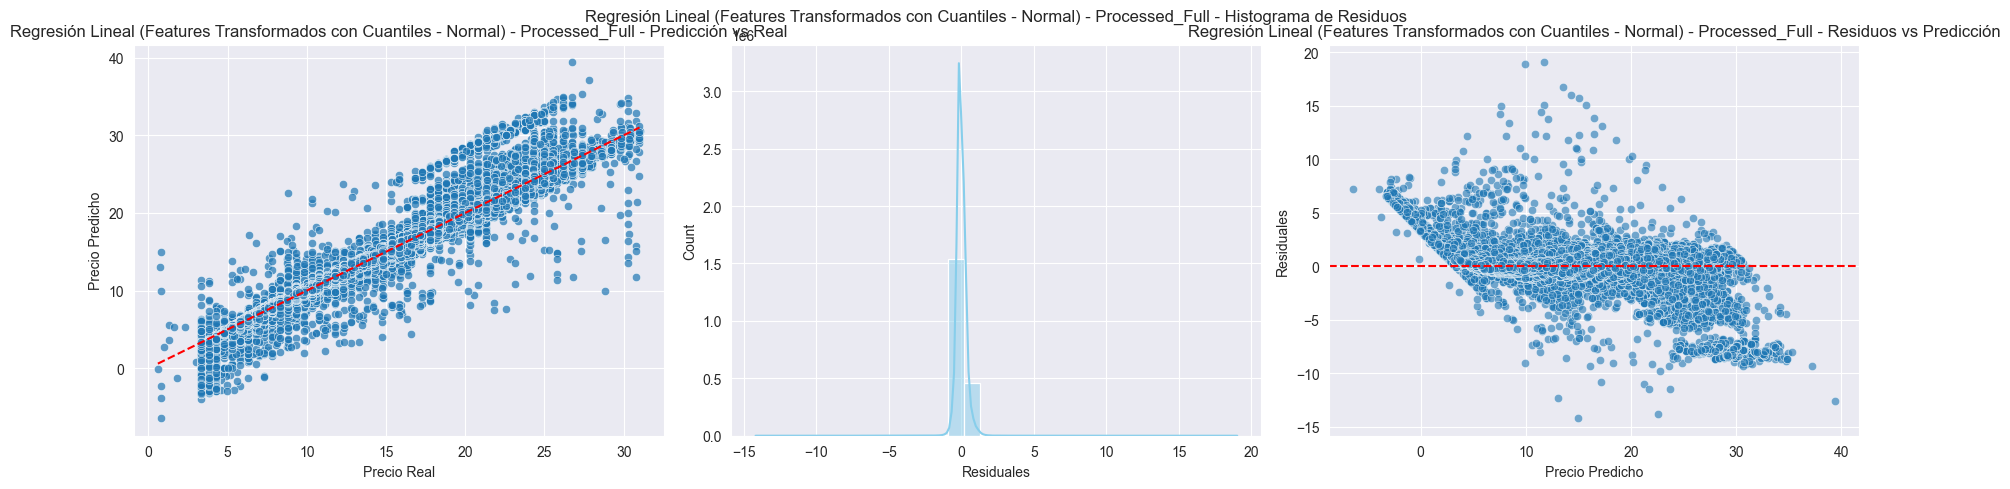

Regresión Lineal (Features Transformados con Cuantiles - Normal) - Processed_Full → Kolmogorov-Smirnov: estadístico=0.0828, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.

📊 Análisis de residuos para modelo: Regresión Lineal (Target Transformado con Logaritmo)


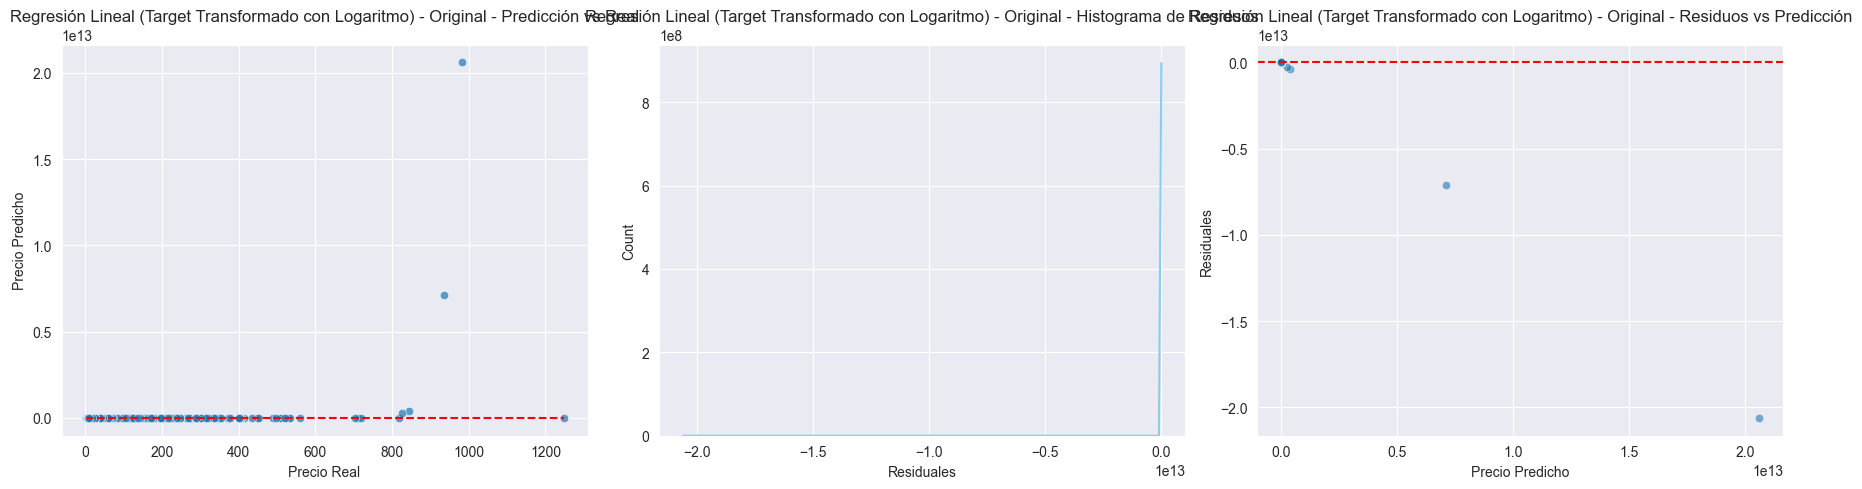

Regresión Lineal (Target Transformado con Logaritmo) - Original → Kolmogorov-Smirnov: estadístico=0.5003, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


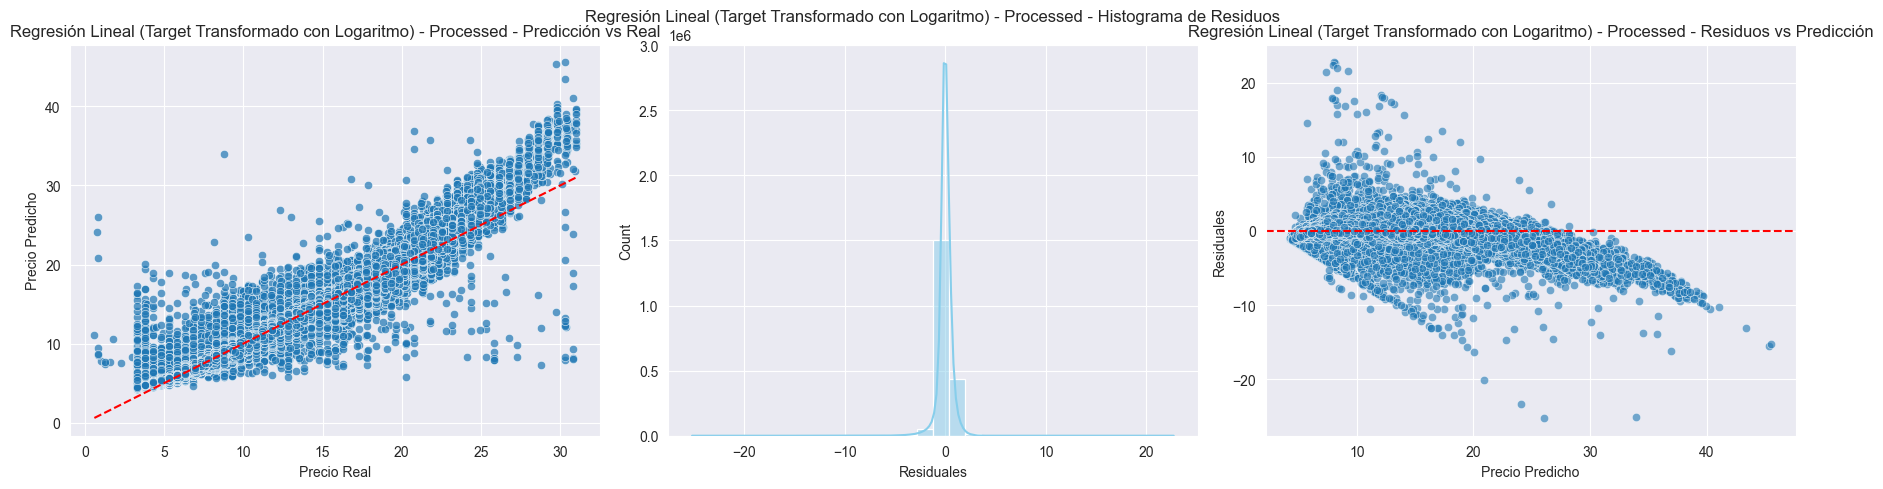

Regresión Lineal (Target Transformado con Logaritmo) - Processed → Kolmogorov-Smirnov: estadístico=0.1020, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


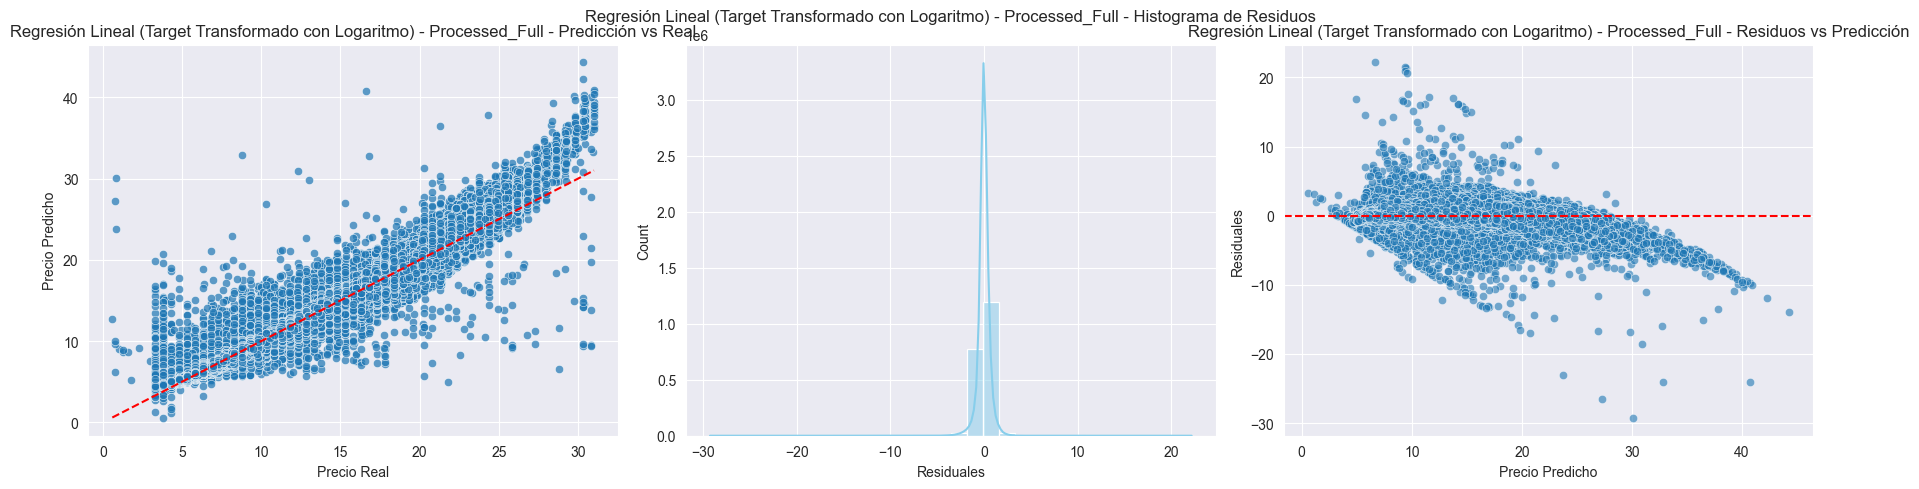

Regresión Lineal (Target Transformado con Logaritmo) - Processed_Full → Kolmogorov-Smirnov: estadístico=0.0877, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


In [115]:
for name, outputs in model_outputs.items():
    print(f"\n📊 Análisis de residuos para modelo: {name}")

    for idx, (key, (y_true, y_pred, residuals, title)) in enumerate(outputs.items()):
        # Plot Predicted vs Actual
        plt.figure(figsize=(18, 5))
        plt.subplot(1, 3, 1)
        sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color='red')
        plt.xlabel("Precio Real")
        plt.ylabel("Precio Predicho")
        plt.title(f"{title} - Predicción vs Real")

        # Histogram of Residuals
        plt.subplot(1, 3, 2)
        sns.histplot(residuals, kde=True, bins=30, color='skyblue')
        plt.title(f"{title} - Histograma de Residuos")
        plt.xlabel("Residuales")

        # Residuals vs Predicted
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"{title} - Residuos vs Predicción")
        plt.xlabel("Precio Predicho")
        plt.ylabel("Residuales")

        plt.tight_layout()
        plt.show()

        # Shapiro-Wilk test (only for small samples)
        if len(residuals) <= 5000:
            stat, p = shapiro(residuals)
            print(f"{title} → Shapiro-Wilk: estadístico={stat:.4f}, p-valor={p:.4f}")
            if p > 0.05:
                print("→ ✅ No se rechaza H₀: los residuos parecen seguir una distribución normal.")
            else:
                print("→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.")
        else:
            # Kolmogorov-Smirnov test on standardized residuals
            standardized = (residuals - np.mean(residuals)) / np.std(residuals)
            stat, p = kstest(standardized, 'norm')
            print(f"{title} → Kolmogorov-Smirnov: estadístico={stat:.4f}, p-valor={p:.4f}")
            if p > 0.05:
                print("→ ✅ No se rechaza H₀: los residuos parecen seguir una distribución normal.")
            else:
                print("→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.")

###### Paso 12.1.2.2.3: Gráficas de residuos Q&Q


📊 Análisis Q-Q Plot para modelo: Regresión Lineal Múltiple


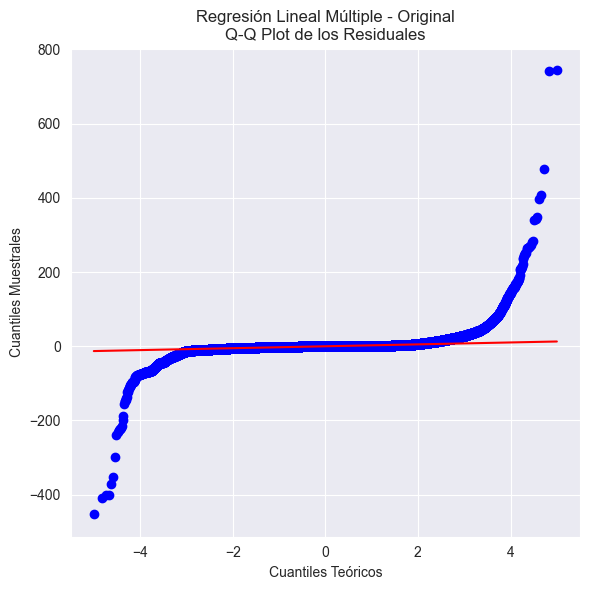

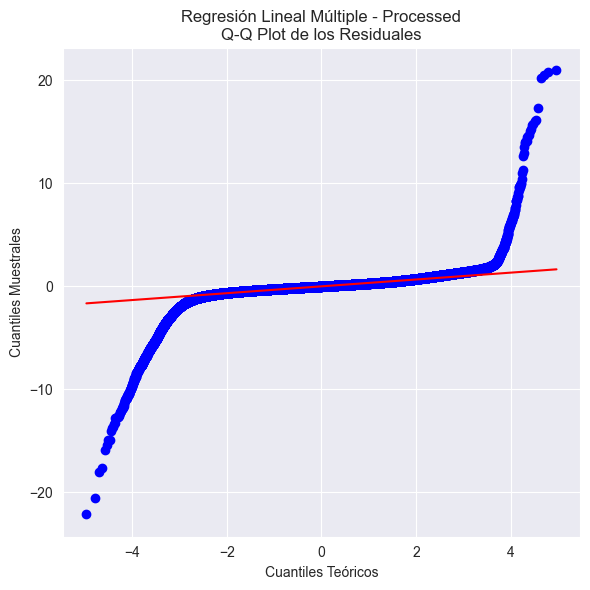

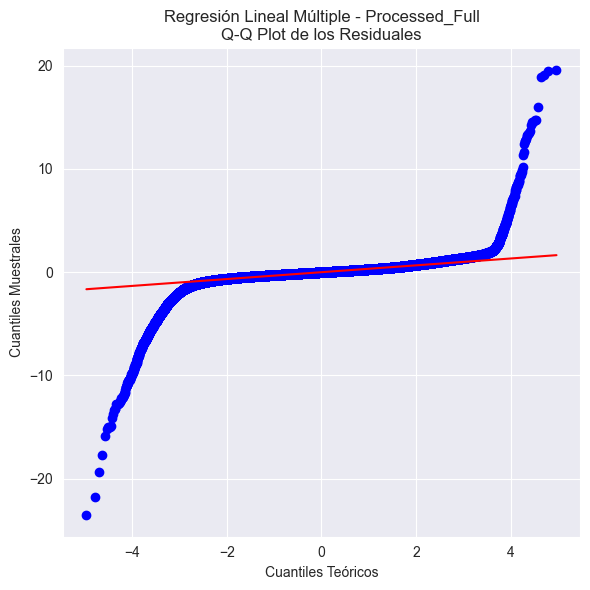


📊 Análisis Q-Q Plot para modelo: Regresión Lineal (Features Transformados con Cuantiles - Normal)


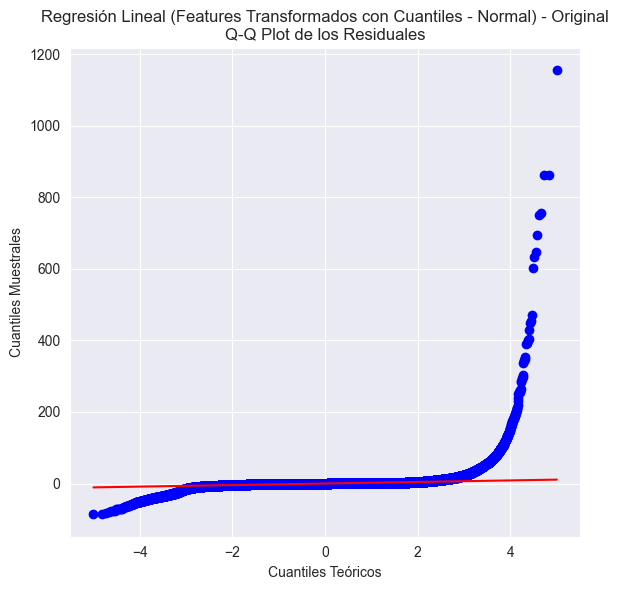

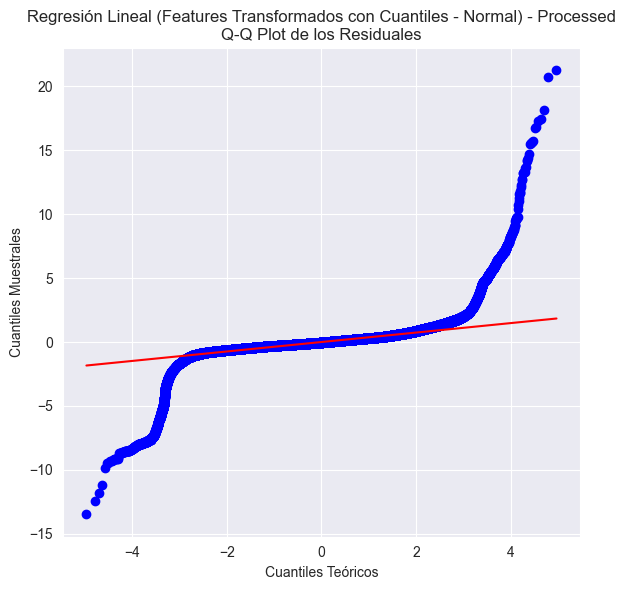

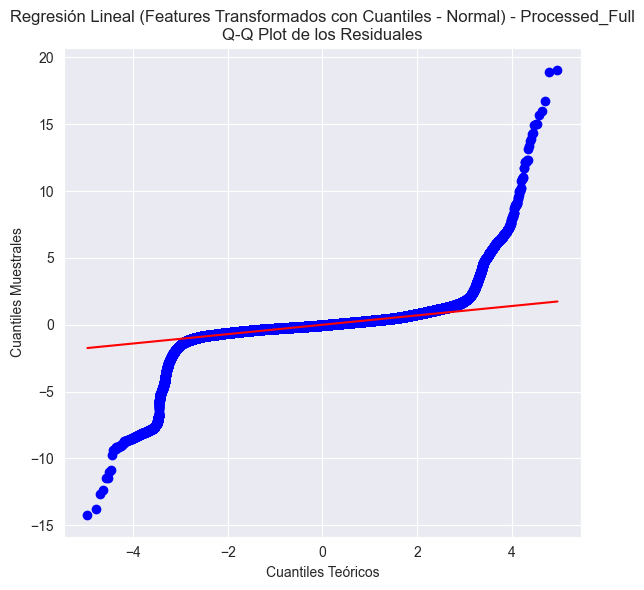


📊 Análisis Q-Q Plot para modelo: Regresión Lineal (Target Transformado con Logaritmo)


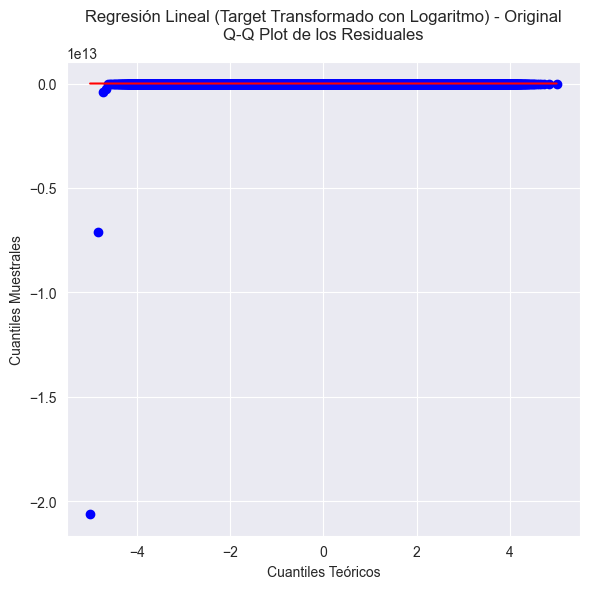

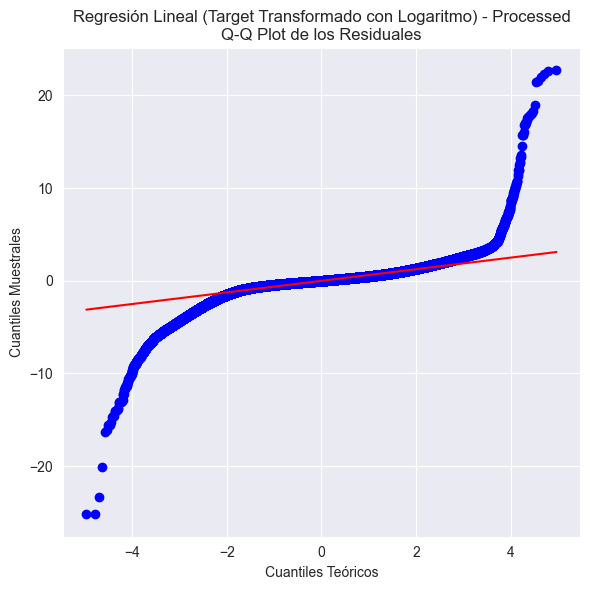

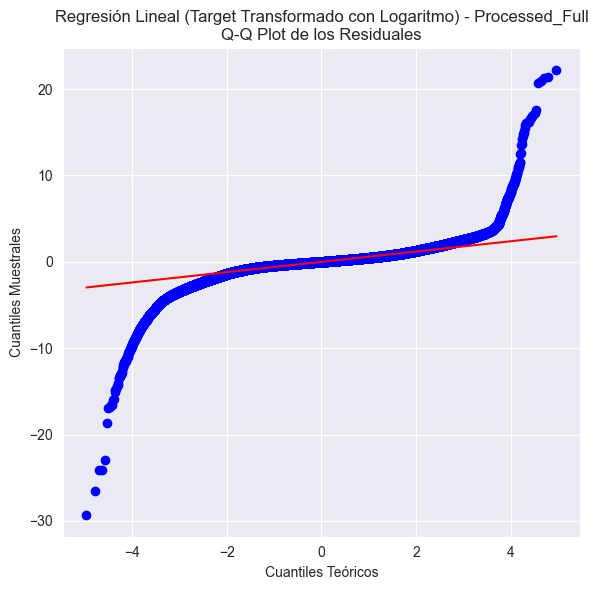

In [116]:
for name, outputs in model_outputs.items():
    print(f"\n📊 Análisis Q-Q Plot para modelo: {name}")

    for idx, (key, (y_true, y_pred, residuals, title)) in enumerate(outputs.items()):
        # Q-Q Plot
        plt.figure(figsize=(6, 6))
        probplot(residuals, dist="norm", plot=plt)
        plt.title(f"{title}\nQ-Q Plot de los Residuales")
        plt.xlabel("Cuantiles Teóricos")
        plt.ylabel("Cuantiles Muestrales")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Interpretación de los QQ-Plots: Todos los gráficos cuantil-cuantil muestran una desviación sistemática respecto a la línea teórica de normalidad, lo que indica que los residuos no siguen una distribución normal en ninguno de los modelos evaluados.

##### Paso 12.1.2.2.4: Prueba de Varianza Constante

In [117]:
from scipy.stats import levene, bartlett
import numpy as np

for name, outputs in model_outputs.items():
    print(f"\n🔍 Pruebas de varianza para modelo: {name}")

    for key, (y_true, y_pred, residuals, title) in outputs.items():
        # Dividir residuos en 2 grupos comparables
        split_idx = len(residuals) // 2
        group1, group2 = residuals[:split_idx], residuals[split_idx:]

        # Selección automática de prueba
        test = bartlett if (len(residuals) < 5000 and
                           np.abs(residuals).mean() < 3*np.std(residuals)) else levene

        # Ejecución de la prueba
        stat, p_value = test(group1, group2)

        # Resultados formateados
        print(f"\n• {title}:")
        print(f"  {test.__name__.upper()} Test")
        print(f"  Estadístico = {stat:.4f}, p-valor = {p_value:.5f}")
        print("  Conclusión:", "✅ Homogéneas" if p_value > 0.05 else "❌ Heterogéneas",
              f"(α=0.05)")
        print(f"  Varianza G1: {np.var(group1):.4f} | G2: {np.var(group2):.4f}")


🔍 Pruebas de varianza para modelo: Regresión Lineal Múltiple

• Regresión Lineal Múltiple - Original:
  LEVENE Test
  Estadístico = 4.2222, p-valor = 0.03990
  Conclusión: ❌ Heterogéneas (α=0.05)
  Varianza G1: 13.7620 | G2: 14.5186

• Regresión Lineal Múltiple - Processed:
  LEVENE Test
  Estadístico = 1.9683, p-valor = 0.16063
  Conclusión: ✅ Homogéneas (α=0.05)
  Varianza G1: 0.1303 | G2: 0.1353

• Regresión Lineal Múltiple - Processed_Full:
  LEVENE Test
  Estadístico = 1.7347, p-valor = 0.18781
  Conclusión: ✅ Homogéneas (α=0.05)
  Varianza G1: 0.1283 | G2: 0.1333

🔍 Pruebas de varianza para modelo: Regresión Lineal (Features Transformados con Cuantiles - Normal)

• Regresión Lineal (Features Transformados con Cuantiles - Normal) - Original:
  LEVENE Test
  Estadístico = 4.9613, p-valor = 0.02592
  Conclusión: ❌ Heterogéneas (α=0.05)
  Varianza G1: 11.3866 | G2: 13.3663

• Regresión Lineal (Features Transformados con Cuantiles - Normal) - Processed:
  LEVENE Test
  Estadístico = 

**Interpretación de los resultados de homogeneidad de varianzas (Prueba de Levene):**

1. **Para Regresión Lineal Múltiple:**
   - Versión *Original*: ❌ **Heterocedasticidad** (p=0.0399 < α=0.05). Las varianzas difieren significativamente (13.76 vs 14.52), lo que viola un supuesto clave del modelo.
   - Versiones *Processed* y *Processed_Full*: ✅ **Homocedasticidad** (p>0.05). Las transformaciones aplicadas lograron varianzas homogéneas (~0.13 en ambos grupos), validando este supuesto crítico.

2. **Para modelos con transformaciones de features:**
   - Todas las versiones (Original, Processed, Processed_Full) mostraron ❌ **heterocedasticidad** (p<0.05). Aunque las varianzas absolutas son menores en datos procesados (0.15-0.17), las diferencias siguen siendo estadísticamente significativas, sugiriendo que la transformación por cuantiles no resolvió completamente este problema.

3. **Para modelos con transformación logarítmica del target:**
   - Todas las versiones cumplen ✅ **homocedasticidad** (p>0.05). Destaca que:
     - En datos *Originales* las varianzas son extremadamente altas (≈1.4e17 vs 3.9e20), pero estadísticamente similares según la prueba.
     - Las versiones procesadas muestran varianzas más equilibradas (~0.40-0.45), confirmando que esta transformación + procesamiento normalizó efectivamente la escala.

**Conclusiones clave:**
- El procesamiento de datos (*Processed_Full*) demostró ser crucial para lograr homocedasticidad en la Regresión Lineal Múltiple estándar.
- La transformación logarítmica del target fue la estrategia más efectiva para cumplir con el supuesto de homogeneidad de varianzas.
- Las transformaciones de features por cuantiles no fueron suficientes por sí solas para corregir la heterocedasticidad, sugiriendo la necesidad de enfoques combinados o modelos alternativos para estos casos.

##### Paso 12.1.2.2.5: Prueba de Independencia

In [100]:
import numpy as np
from numba import njit  # Para aceleración JIT

@njit
def fast_durbin_watson(residuals):
    """Versión optimizada del estadístico Durbin-Watson"""
    diff = residuals[1:] - residuals[:-1]
    dw = np.sum(diff**2) / np.sum(residuals**2)
    return dw

@njit
def fast_ljung_box(residuals, lag):
    """Versión simplificada de Ljung-Box para un solo lag"""
    n = len(residuals)
    acf = np.correlate(residuals, residuals, mode='full')[n-1:n+lag] / (n * np.var(residuals))
    q = n * (n + 2) * np.sum((acf[1:lag+1]**2) / (n - np.arange(1, lag+1)))
    from scipy.stats import chi2
    p_value = 1 - chi2.cdf(q, lag)
    return p_value

for name, outputs in model_outputs.items():
    print(f"\n🔍 Pruebas Rápidas de Independencia para modelo: {name}")

    for key, (y_true, y_pred, residuals, title) in outputs.items():
        residuals = np.asarray(residuals)
        print(f"\n• {title}:")

        # 1. Durbin-Watson acelerado
        dw_stat = fast_durbin_watson(residuals)
        dw_status = ("❌ Autocorrelación positiva" if dw_stat < 1.5 else
                    "❌ Autocorrelación negativa" if dw_stat > 2.5 else
                    "✅ No hay autocorrelación")
        print(f"  Durbin-Watson = {dw_stat:.4f}\n    {dw_status}")


🔍 Pruebas Rápidas de Independencia para modelo: Regresión Lineal Múltiple

• Regresión Lineal Múltiple - Original:
  Durbin-Watson = 2.0020
    ✅ No hay autocorrelación

• Regresión Lineal Múltiple - Processed_3Var:
  Durbin-Watson = 2.0016
    ✅ No hay autocorrelación

• Regresión Lineal Múltiple - Processed_Full:
  Durbin-Watson = 2.0018
    ✅ No hay autocorrelación

🔍 Pruebas Rápidas de Independencia para modelo: Regresión Lineal (Features Transformados con Cuantiles - Normal)

• Regresión Lineal (Features Transformados con Cuantiles - Normal) - Original:
  Durbin-Watson = 1.9993
    ✅ No hay autocorrelación

• Regresión Lineal (Features Transformados con Cuantiles - Normal) - Processed_3Var:
  Durbin-Watson = 2.0018
    ✅ No hay autocorrelación

• Regresión Lineal (Features Transformados con Cuantiles - Normal) - Processed_Full:
  Durbin-Watson = 2.0015
    ✅ No hay autocorrelación

🔍 Pruebas Rápidas de Independencia para modelo: Regresión Lineal (Target Transformado con Logaritmo

**Interpretación de los resultados de la Prueba de Durbin-Watson en los modelos:**

Los resultados de la Prueba de Durbin-Watson aplicada a todos los modelos muestran valores dentro del rango de independencia de los residuos (1.5 < DW < 2.5 en todos los casos), lo que nos permite concluir que:

1. **No existe autocorrelación significativa** en los residuos de ninguno de los modelos evaluados
2. Los supuestos de **independencia de errores** se cumplen adecuadamente
3. La estructura lineal aplicada **captura correctamente** los patrones de los datos sin dejar dependencias temporales o secuenciales no modeladas

##### Paso 12.1.2.3: Evaluación

In [118]:
with pd.option_context('display.float_format', '{:.5f}'.format):
    results_df = pd.DataFrame(results)
    display(results_df)  # or just results_df in Jupyter# 5 decimal places

Model           MAE_Train  \
0               Regresión Lineal Múltiple - Original             1.51599   
1              Regresión Lineal Múltiple - Processed             0.24297   
2         Regresión Lineal Múltiple - Processed_Full             0.24286   
3  Regresión Lineal (Features Transformados con C...             1.36590   
4  Regresión Lineal (Features Transformados con C...             0.27020   
5  Regresión Lineal (Features Transformados con C...             0.25734   
6  Regresión Lineal (Target Transformado con Loga... 3068841035812.68164   
7  Regresión Lineal (Target Transformado con Loga...             0.43652   
8  Regresión Lineal (Target Transformado con Loga...             0.42089   

              RMSE_Train                              R2_Train       MAE_Test  \
0                3.70672                               0.91589        1.51980   
1                0.36498                               0.99278        0.24293   
2                0.36135                               0.99292        0.24285   
3                3.28841                               0.93380        1.36975   
4                0.41300                               0.99075        0.27011   
5                0.39202                               0.99167        0.25733   
6 9543738843386896.00000 -557575658783318624912243949568.00000 11754347.15593   
7                0.67269                               0.97547        0.43670   
8                0.62997                               0.97849        0.42118   

          RMSE_Test                    R2_Test  
0           3.76037                    0.91464  
1           0.36445                    0.99280  
2           0.36166                    0.99291  
3           3.51802                    0.92528  
4           0.41330                    0.99074  
5           0.39308                    0.99162  
6 14025118183.83535 -1187497363671737344.00000  
7           0.67246                    0.97548  
8           0.63020                    0.97847

**Resultados del mejor modelo:** El modelo de **Regresión Lineal Múltiple** con todos los datos procesados demostró un **rendimiento excepcional**, alcanzando un **R² de 0.9929** (explicando el **99.29% de la varianza**), con errores mínimos (**MAE ≈ 0.2428** y **RMSE ≈ 0.3615**) tanto en entrenamiento como en prueba, lo que evidencia una **alta precisión predictiva** y una **excelente generalización** sin overfitting.

**Conclusión sobre el mejor modelo:**

La **Regresión Lineal Múltiple con todos los datos procesados** se consolida como el mejor modelo evaluado, destacando por:

✅ **Explicación de la varianza (R² = 99.29%)**: Un rendimiento predictivo excepcional, capaz de capturar casi la totalidad de la variabilidad de los datos.
✅ **Cumplimiento de independencia de residuos (Durbin-Watson)**: Ausencia de autocorrelación, validando la estructura del modelo.
✅ **Homocedasticidad (Prueba de Levene)**: Varianza constante en los residuos, lo que respalda la fiabilidad de las estimaciones.

**Limitaciones a considerar:**
❌ **No normalidad en residuos (QQ-Plots)**: Los residuos no siguen una distribución normal, lo que podría afectar intervalos de confianza y valores-p en muestras pequeñas. Sin embargo, en conjuntos de datos grandes, el teorema del límite central mitiga este impacto.
❌ **Relación no lineal en Spearman (pero linealidad con Rainbow Test)**: Sugiere que, aunque la relación global es lineal, podría haber componentes no lineales no capturados o subgrupos con comportamientos diferenciados.

#### Paso 12.1.3: Regresión Logística Multinomial

In [99]:
from sklearn.pipeline import Pipeline
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Paso 1: Escalar los datos
    ('classifier', LogisticRegression(max_iter=1000))  # Paso 2: Regresión logística
])

# Ajustar el modelo (el scaler se aplica automáticamente durante el fit)
logistic_pipeline.fit(X_train_cleaned_complete_logistic, y_train_cleaned_complete_logistic)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [101]:
# Predicciones
y_pred_logistic = logistic_pipeline.predict(X_test_cleaned_complete_logistic)
y_prob_logistic = logistic_pipeline.predict_proba(X_test_cleaned_complete_logistic)[:, 1]

📊 **Logistic Regression** - Accuracy: 0.9636



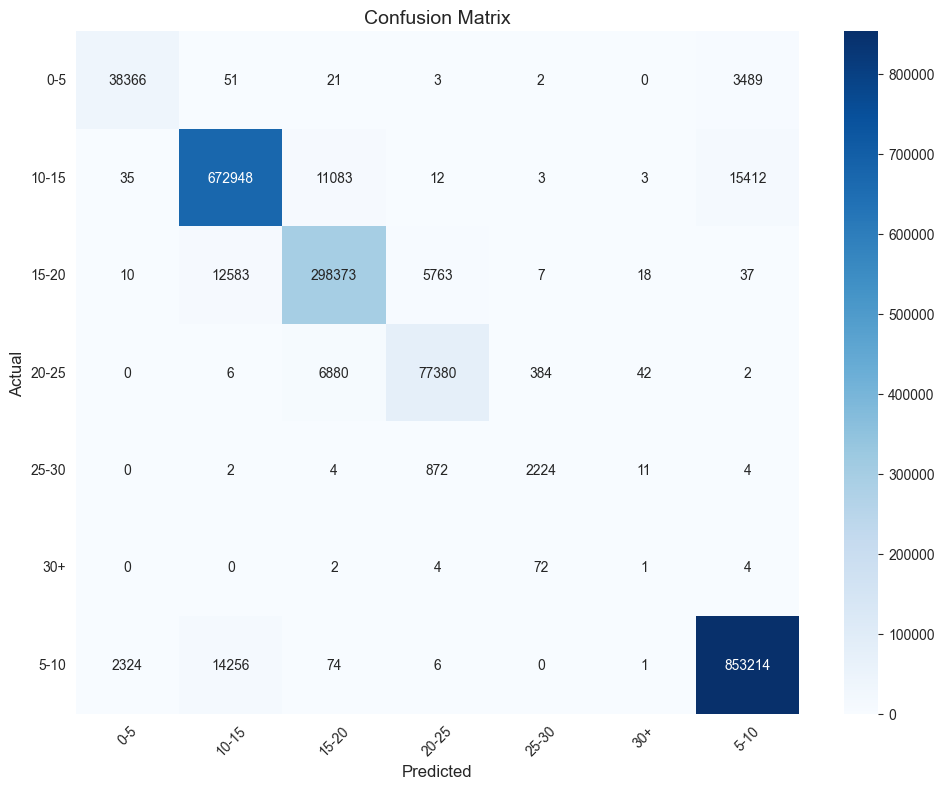


📋 **Classification Report:**
              precision    recall  f1-score   support

         0-5     0.9418    0.9150    0.9282     41932
       10-15     0.9616    0.9620    0.9618    699496
       15-20     0.9429    0.9419    0.9424    316791
       20-25     0.9208    0.9136    0.9172     84694
       25-30     0.8262    0.7135    0.7657      3117
         30+     0.0132    0.0120    0.0126        83
        5-10     0.9783    0.9808    0.9796    869875

    accuracy                         0.9636   2015988
   macro avg     0.7978    0.7770    0.7868   2015988
weighted avg     0.9635    0.9636    0.9635   2015988


🔢 Class distribution in test set:
0-5: 41932 samples (2.08%)
10-15: 699496 samples (34.70%)
15-20: 316791 samples (15.71%)
20-25: 84694 samples (4.20%)
25-30: 3117 samples (0.15%)
30+: 83 samples (0.00%)
5-10: 869875 samples (43.15%)


In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get unique classes from test data
classes = np.unique(y_test_cleaned_complete_logistic)
class_names = classes  # Use the actual class labels directly

# Evaluation
accuracy = accuracy_score(y_test_cleaned_complete_logistic, y_pred_logistic)
print(f"📊 **Logistic Regression** - Accuracy: {accuracy:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_cleaned_complete_logistic, y_pred_logistic)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Classification Report
print("\n📋 **Classification Report:**")
print(classification_report(y_test_cleaned_complete_logistic, y_pred_logistic,
                           target_names=class_names, digits=4))

# Class Distribution
print("\n🔢 Class distribution in test set:")
unique, counts = np.unique(y_test_cleaned_complete_logistic, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"{cls}: {count} samples ({count/len(y_test_cleaned_complete_logistic):.2%})")

El modelo de clasificación presenta un **alto rendimiento general** (accuracy del 96.36%), pero con un **desempeño desigual entre clases**. Muestra excelentes resultados para las categorías mayoritarias (5-10, 10-15 y 15-20) con puntajes F1 superiores a 0.94, indicando un buen equilibrio entre precisión y recall. Sin embargo, se observan problemas significativos en las clases minoritarias, particularmente en el rango 25-30 (F1 de 0.7657) y 30+ (F1 de apenas 0.0126), donde el modelo prácticamente no logra identificar correctamente estos casos. Esta disparidad se evidencia en la marcada diferencia entre el promedio macro (78.68%) y el ponderado (96.35%), reflejando el fuerte impacto del desbalance de clases. Si bien el modelo es efectivo para predecir las categorías más frecuentes, su incapacidad para manejar adecuadamente las clases menos representadas - especialmente la categoría 30+ - sugiere la necesidad de implementar técnicas de balanceo de datos o ajustes específicos para mejorar la detección de estos casos minoritarios, particularmente si tienen importancia crítica en el contexto de aplicación.

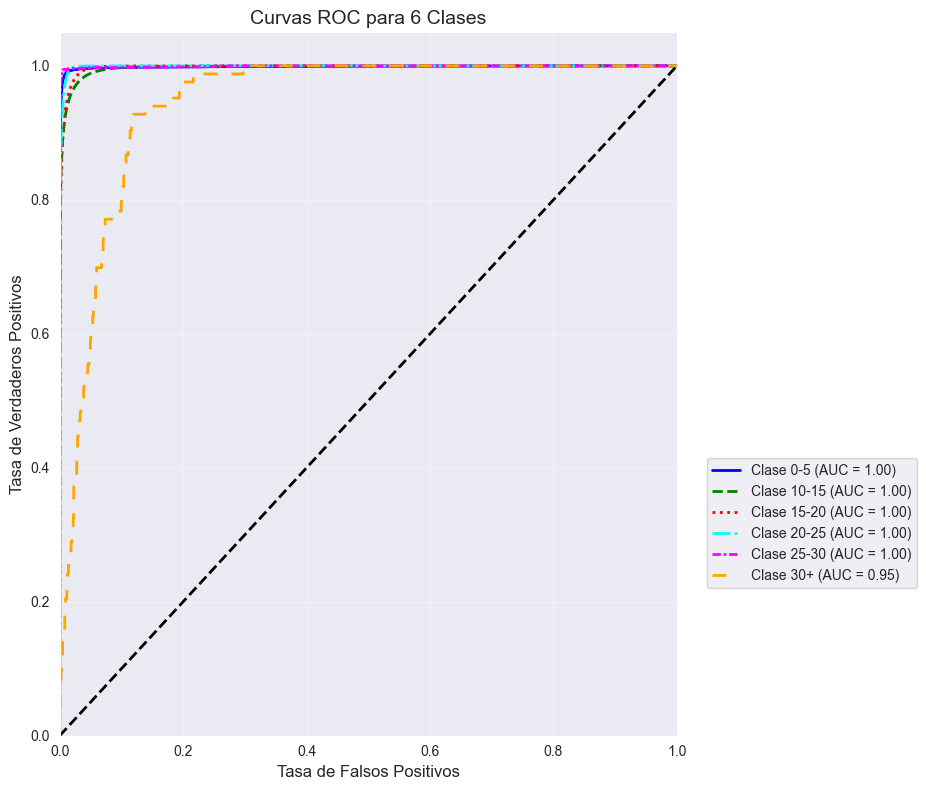


AUC por clase:
Clase 0-5: 0.9986
Clase 10-15: 0.9968
Clase 15-20: 0.9977
Clase 20-25: 0.9990
Clase 25-30: 0.9991
Clase 30+: 0.9457
Clase 5-10: 0.9986


In [105]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 1. Binarizar las etiquetas
classes = np.unique(y_test_cleaned_complete_logistic)
y_test_bin = label_binarize(y_test_cleaned_complete_logistic, classes=classes)
n_classes = y_test_bin.shape[1]  # Debería ser 6

# 2. Obtener las probabilidades predichas
y_score = logistic_pipeline.predict_proba(X_test_cleaned_complete_logistic)

# 3. Calcular métricas ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Configuración de colores y estilo
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'purple', 'brown'][:n_classes]
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1)), (0, (5, 5))][:n_classes]

# 5. Graficar cada clase
for i, color, ls in zip(range(n_classes), colors, linestyles):
    plt.plot(fpr[i], tpr[i], color=color, linestyle=ls,
             lw=2, label='Clase {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

# 6. Línea de referencia y formato
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title('Curvas ROC para 6 Clases', fontsize=14)
plt.legend(loc="lower right", bbox_to_anchor=(1.4, 0.2), fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Opcional: Mostrar AUC por clase en consola
print("\nAUC por clase:")
for i in range(n_classes):
    print(f"Clase {classes[i]}: {roc_auc[i]:.4f}")